# Definitions

The structure and properties of the class hierarchy of the ``finite_algebra`` module are based on the following definitions.

## Groups, Rings, Fields, etc.

The following list of algebraic structures is ordered such that each successive structure builds on the previous one.  The class hierarchy of the ``finite_algebra`` module modeled on this progression.

* **Magma** -- a set, $S$, with a binary operation,  $\circ: S \times S \to S$, such that $\forall (a,b) \in S \times S \Rightarrow a \circ b \in S$

* **Semigroup** -- an associative Magma:  $\forall a,b,c \in S \Rightarrow a \circ (b \circ c) = (a \circ b) \circ c$

* **Monoid** -- a Semigroup with identity element:  $\exists e \in S$, such that, for all $a \in S, a \circ e = e \circ a = a$

* **Group** -- a Monoid with inverse elements:  $\forall a \in S, \exists a^{-1} \in S$, such that, $a \circ a^{-1} = a^{-1} 
\circ a = e$

* **Ring** -- $\langle S, +, \times \rangle$, where $\langle S, + \rangle$ is a commutative Group, $\langle S, \times \rangle$ is a Semigroup, and $\times$ distributes over $+$

* **Field** -- a Ring $\langle S, +, \times \rangle$, where $\langle S\setminus{\{0\}}, \times \rangle$ is a commutative Group

## Vector Spaces and Modules

In the definitions, below, care is taken to not conflate the scalar-scalar, vector-vector, and scalar-vector operations.

A **Vector Space**, $\mathscr{V} = \langle \mathscr{G}, \mathscr{F}, \circ \rangle$, consists of the following:

* an **abelian Group**, $\mathscr{G} = \langle V, \oplus \rangle$ (i.e., the *"vectors"*)
* a **field**, $\mathscr{F} = \langle S, +, \times \rangle$ (i.e., the *"scalars"*)
* and a **binary operator**, $\circ : S \times V \to V$

where the following conditions hold:

1. Scaled Vectors: For all $s \in S$ and $v \in V \Rightarrow s \circ v \in V$
1. Scaling by One: If $\underline{1} \in S$ is the multiplicative identity element of $\mathscr{F}$, then $\underline{1} \circ v = v$
1. Distributivity of Scalars Over Vector Addition: $s \circ (v_1 \oplus v_2) = (s \circ v_1) \oplus (s \circ v_2)$
1. Distributivity of Vectors Over Scalar Addition: $(s_1 + s_2) \circ v = (s_1 \circ v) \oplus (s_2 \circ v)$
1. Associativity: $s_1 \circ (s_2 \circ v) = (s_1 \times s_2) \circ v$

A **Module**, $\mathscr{M} = \langle \mathscr{G}, \mathscr{R}, \circ \rangle$, has the same conditions as a Vector Space, except that the Field is replaced by a **Ring**, $\mathscr{R} = \langle S, +, \times \rangle$.

## Class Hierarchy

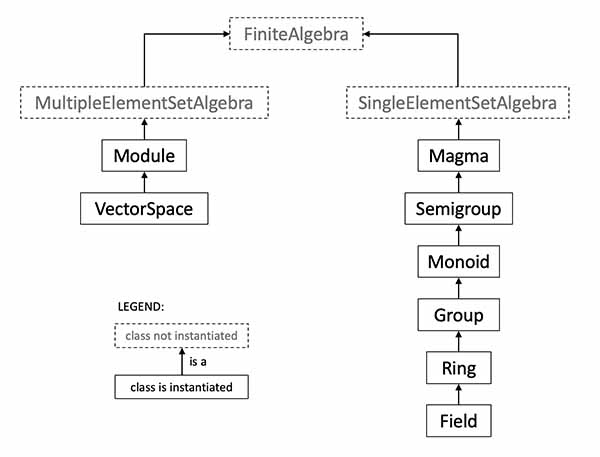

In [1]:
from IPython import display
from base64 import b64decode
# base64_class_hierarchy = "iVBORw0KGgoAAAANSUhEUgAAAlgAAAHQCAYAAAB9bRT0AAAMeWlDQ1BEaXNwbGF5AABIiZVXd1ST99f/PCMJCXsKCBI2giiyBJEZpiAgG5whCRAIIT4kqLhHqYJ1iyhOtCpq0WoFpQ5ErbOIe1vU4qjUolbFye+PBLT2977vee85yfeez/dz7+fe+zwnJxfQ7xIqFDLSACiUK5mkqDB+RmYWn9MOLRjDEFawFIqKFaGJiXEA0HP+015fBQEAl9yFCoXs3/f/qxmJJcUigBgNIFtcLCoEiCaAXiNSMEqAPRqA/USlQgmwZwIwYTIyswD2cgAmuWp/GwCTbLV/EIAJk5IkANitgJaOUMjkAnq3AfBLRLlKQO8DAA+5WCoH9AcACBLlCcWAvgzAgMLCIjGgXwXApUSUqwD0mwD4ZX+RM/cf+bN78wuFub2+ui8AgFa4tFghE07+f47m/7ZCmapHwwmATh4TnQTABCCuFxTFJgHQAYgOeXZ8AgAjgOiSitVzB0henio6Vc0nrUTFgiwAZgDpIRaGxwKwAshIuSw+ToNn50gjYwAYAOQkqTImBYA5QM6TFEckazgbmKIkjRZZn8MIQjX4KSEDaLTuqgpSQzX5X+RJYjT5Kb3SvJR0ADyAciiRpsUD0AOogcUFybEazrDSPEF8D4dRJaUCcACoJIk8KkydnyrJYSKTNPzywuKefqkNedKYeI2/R5mXEq2eD3VcJIxIVvdCtUrkoak9eSTFGXE9vYgl4RHq3qnHEnlqsiZPl0IZlqSOpXkKWaKGT9tJZFFJAOwA2ru4JFkTS6cpmRTNM6JzFMrEFHWddGm+cHiiuh56MeIgQDj4UIGPbBQhH9KWjoYO8DU3kRCCQS4kcNcgPRHpEIKBHEIkoxR/Qg4JinvjwiAEAwlKIMfHXlT97Y4cCMGgBBIUowAPwaAQsZBBAhUYSCDvVUvD72Ag/Ze6EHyIUAQZisBA+j/gPehnJBQCxGkQVY8iX7+HyY5gh7Oj2ZHs/rQlHUQH0HF0EB1CB9GetB/t39PHZz7rIesC6z7rCquNdWOcdDbzVZUj0AaVZoYSZH85C9qJ9qR96DA6kA6i/cGnzWhLuNPetB8dSgfTAbQP7Q+Bpm4VmK9m+FUHXzwNDY/rwSW5fbghXJevI/Vc9Xx6s0gg/8d81LVm985b0Hvztb7gi+mLUYTYr5nUPGovdZI6Sp2mDlIN4FNHqP3UOeoQ1fDF2/U7GOT2qiVBAjkKIIP0X3pCjSYDCYo9dng88figvlNKJikBQFCkmMxIc/OU/FCFQibhx8hFAwfwPT08BwMZmVl89c/XSzMQAAizM5+xObZA4OTu7u6Dn7HYVmDvIYB38zPm3A7onQFOrRSpmBI1RgMACzzowwQW6Ad7uMAdnvBFAEIQgeFIQAoyMRYi5KEQDCZiKmahDBVYjBVYjfXYhG34AXvQgIM4il9wFq24gltoQzueohOv8Z4gCA6hSxgTFoQN4Ui4EZ6EHxFERBBxRBKRSYwncgk5oSKmEnOICmIpsZrYSNQSPxIHiKPEaeICcYO4RzwhXhDvSIrUIU1Ia9KJHET6kaFkLJlCjiFzyQlkKTmXXEhWkTXkTrKePEqeJa+QbeRT8hUFSpsyo2wpd8qPElAJVBaVQzHUdKqcqqRqqDqqkTpJXaLaqA7qLc2mjWk+7U4H0NF0Ki2iJ9DT6QX0anobXU8fpy/R9+hO+hNLl2XFcmMNZcWwMli5rImsMlYlawtrH+sE6wqrnfWazWabsZ3ZQ9jR7Ex2PnsKewF7LXsXu4l9gf2A/YrD4Vhw3DiBnASOkKPklHFWcXZyjnAucto5XVraWjZanlqRWllacq3ZWpVa27UOa13UeqT1nmvAdeQO5SZwxdzJ3EXczdxG7nluO/c9z5DnzAvkpfDyebN4Vbw63gnebd5LbW1tO21/7ZHaUu2Z2lXau7VPad/TfqtjpOOqI9AZraPSWaizVadJ54bOS11dXSfdEN0sXaXuQt1a3WO6d3W79Iz1BurF6In1ZuhV69XrXdR7ps/Vd9QP1R+rX6pfqb9X/7x+hwHXwMlAYCA0mG5QbXDA4JrBK0Njw8GGCYaFhgsMtxueNnxsxDFyMoowEhvNNdpkdMzogTFlbG8sMBYZzzHebHzCuN2EbeJsEmOSb1Jh8oNJi0mnqZGpt2ma6STTatNDpm1mlJmTWYyZzGyR2R6zq2bv+lj3Ce0j6TO/T12fi33emPc1DzGXmJeb7zK/Yv7Ogm8RYVFgscSiweKOJW3pajnScqLlOssTlh19TfoG9BX1Le+7p+9NK9LK1SrJaorVJqtzVq+s+1lHWSusV1kfs+7oZ9YvpF9+v+X9Dvd7YmNsE2QjtVluc8TmD74pP5Qv41fxj/M7ba1so21VthttW2zf2znbpdrNtttld8eeZ+9nn2O/3L7ZvtPBxmGEw1SHHQ43HbmOfo55jisdTzq+cXJ2Snf61qnB6bGzuXOMc6nzDufbLrouwS4TXGpcLvdn9/frX9B/bf9WV9LVxzXPtdr1vBvp5usmdVvrdmEAa4D/APmAmgHX3HXcQ91L3He43xtoNjBu4OyBDQOfDXIYlDVoyaCTgz55+HjIPDZ73BpsNHj44NmDGwe/8HT1FHlWe1720vWK9Jrhtd/rubebt8R7nfd1H2OfET7f+jT7fPQd4sv41vk+GeIwZPyQNUOu+Zn4Jfot8Dvlz/IP85/hf9D/7VDfocqhe4b+FeAeUBCwPeDxMOdhkmGbhz0ItAsUBm4MbAviB40P2hDUFmwbLAyuCb4fYh8iDtkS8ii0f2h+6M7QZ2EeYUzYvrA3gqGCaYKmcCo8Krw8vCXCKCI1YnXE3Ui7yNzIHZGdUT5RU6KaolnRsdFLoq/FWMeIYmpjOocPGT5t+PFYndjk2NWx9+Nc45i4xhHkiOEjlo24He8YL49vSEBCTMKyhDuJzokTEn8eyR6ZOLJ65MOkwUlTk04mGyePS96e/DolLGVRyq1Ul1RVanOaftrotNq0N+nh6UvT2zIGZUzLOJtpmSnN3J/FyUrL2pL1alTEqBWj2kf7jC4bfXWM85hJY06PtRwrG3tonP444bi941nj08dvH/9BmCCsEb7Kjslek90pEohWip6KQ8TLxU8kgZKlkkc5gTlLcx7nBuYuy32SF5xXmdchFUhXS5/nR+evz39TkFCwtaBbli7bVahVOL7wgNxIXiA/XtSvaFLRBYWbokzRNmHohBUTOplYZksxUTymeL/SRKlQnlO5qL5R3SsJKqku6ZqYNnHvJMNJ8knnJrtOnj/5UWlk6fdT6CmiKc1TbafOmnpvWui0jdOJ6dnTm2fYz5g7o31m1Mxts3izCmb9Ottj9tLZf89Jn9M413ruzLkPvon6ZkeZXhlTdu3bgG/Xz6PnSee1zPeav2r+p3Jx+ZkKj4rKig8LRAvOfDf4u6rvuhfmLGxZ5Lto3WL2Yvniq0uCl2xbari0dOmDZSOW1S/nLy9f/veKcStOV3pXrl/JW6la2VYVV7V/lcOqxas+rM5bfaU6rHrXGqs189e8WStee3FdyLq69dbrK9a/2yDdcH1j1Mb6Gqeayk3sTSWbHm5O23zye7/va7dYbqnY8nGrfGvbtqRtx2uH1NZut9q+aAe5Q7Xjyc7RO1t/CP9hf5173cZdZrsqdmO3avcfP47/8eqe2D3Ne/321v3k+NOafcb7yuuJ+sn1nQ15DW37M/dfODD8QHNjQOO+nwf+vPWg7cHqQ6aHFh3mHZ57uPtI6ZFXTYqmjqO5Rx80j2u+dSzj2OXjI4+3nIg9ceqXyF+OnQw9eeRU4KmDp4eePnDG70zDWd+z9ed8zu371efXfS2+LfXnh5zf3+rf2nhh2IXDF4MvHr0UfumXyzGXz16Jv3LhaurV69dGX2u7Lr7++IbsxvObJTff35p5m3W7/I7Bncq7Vndrfuv/264237ZD98LvnbuffP/WA9GDp78X//6hfe5D3YeVj2we1T72fHzwSeST1j9G/dH+VPH0fUfZn4Z/rnnm8uynv0L+OteZ0dn+nHne/WLBS4uXW//2/rv5VeKru68LX79/U95l0bXtrd/bk+/S3z16P/ED50PVx/4fGz/FfrrdXdjdrRAyQgAABYDMyQFebAV0MwHjVoA3Sr0LAgAI9f4KqP+D/HdfvS8CAHyBOgBJAARNwO4mwGkmoNsEJAJICQHp5dX70VhxjpenOpcOA7C6urtfWgOcRuAj0939fm1398fNAHUDaJqg3kEBgG0AbAgHgBvLxszEV6beT7/o8esTIL28vPH1+R9JaZFi8negdwAAAAlwSFlzAAAuIwAALiMBeKU/dgAABkxpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+IDx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IkFkb2JlIFhNUCBDb3JlIDcuMC1jMDAwIDc5LmRhYmFjYmIsIDIwMjEvMDQvMTQtMDA6Mzk6NDQgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczp4bXBNTT0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjEzNDgiIGV4aWY6UGl4ZWxZRGltZW5zaW9uPSIxMDQyIiBleGlmOlVzZXJDb21tZW50PSJTY3JlZW5zaG90IiB4bXA6Q3JlYXRlRGF0ZT0iMjAyMS0wOS0xM1QxMjo1MDo0My0wNTowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjEtMDktMTNUMTI6NTc6MzMtMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjEtMDktMTNUMTI6NTc6MzMtMDU6MDAiIGRjOmZvcm1hdD0iaW1hZ2UvcG5nIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiBwaG90b3Nob3A6SUNDUHJvZmlsZT0iRGlzcGxheSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo0YTM2ODMxMS1hYTkzLTQ0MDItYWQ1ZS04Y2M5YjQ4YzE4ZTYiIHhtcE1NOkRvY3VtZW50SUQ9ImFkb2JlOmRvY2lkOnBob3Rvc2hvcDo5MGM5Y2Y3NC00ZDZlLTVmNDMtYTU5MS1mZjJmYzkwNmUxYzUiIHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD0ieG1wLmRpZDphOTljODAzYS1kMTA0LTQ5ODUtOWU4ZC1kMzFlODZkNGRkNDEiPiA8eG1wTU06SGlzdG9yeT4gPHJkZjpTZXE+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDphOTljODAzYS1kMTA0LTQ5ODUtOWU4ZC1kMzFlODZkNGRkNDEiIHN0RXZ0OndoZW49IjIwMjEtMDktMTNUMTI6NTc6MzMtMDU6MDAiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCAyMi41IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDo0YTM2ODMxMS1hYTkzLTQ0MDItYWQ1ZS04Y2M5YjQ4YzE4ZTYiIHN0RXZ0OndoZW49IjIwMjEtMDktMTNUMTI6NTc6MzMtMDU6MDAiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCAyMi41IChNYWNpbnRvc2gpIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDwvcmRmOlNlcT4gPC94bXBNTTpIaXN0b3J5PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVuZD0iciI/Pk3SL54AAIBsSURBVHja7J0JvE3V+/+b53nuq3mgeZYiDRpQaZ5poESoqAwNEjKUIhKRqAyhIkJEooRkCpkyROaiFELD+p/3+nn2f519z73uvS6de33er9d+3Xues88+e++z97M/61nPetYOzrklieV3LVq0aNGiRYsWLXmyLNnBCSGEEEKIPGWHTUpLCCGEEELkDb9LYAkhhBBCSGAJIYQQQkhgCSGEEEJIYAkhhBBCCAksIYQQQggJLCGEEEIICSwhhBBCCCGBJYQQQgghgSWEEEIIIYElhBBCCCEksIQQQgghJLCEEEIIISSwhBBCCCEksHQehBBCCCEksIQQQgghJLCEEEIIISSwhBBCCCGEBJYQQgghhASWEEIIIYQElhBCCCGEkMASQgghhJDAEkIIIYSQwBJCCCGEEBJYQgghhBASWEIIIYQQElhCCCGEEBJYQgghhBBCAksIIYQQQgJLCCGEEEICSwjxX/LDDz+4CRMmuEmTJrm///7b2+bPn+9tLMuWLfO2NWvWRLZp06Zl+DzLL7/84m2//fZbZJsxY0a07vTp0yM768DPP/8c2diWMXXq1MjOd8PSpUsjG/sIGzdu9Ptu9g0bNnj7woULI9uiRYu87c8//4xskydPjo533rx5kX358uXe9scff0S277//Ptqv2bNnR/aVK1d626pVqyLbzJkzo3X5nNlXr17tbStWrIhsc+bM8bZ//vnHTZkyJbKvW7fO25csWRLZfvzxR2/766+/3MSJEyM7xw8LFiyIbIsXL/Y2tmM2ts/3wNy5c/1+2vcIISSwhBB5yJAhQ1yhQoXcBRdc4EqWLOnWrl3r7fXr1/c2lnfeecfbeECb7cYbb3T//vuvt9eoUSOy9+vXz9u+/PLLyFahQoXo+8qXLx/ZWQf69OkT2R5//PFo3XLlykV2vhs6d+4c2Z5//vlIoLHv2C688EIvSqBFixbRum3atImEo9lKlSoViZ569epF9u7du3sbosRst912W7RfVatWjewDBw70tmHDhkW2ihUrRuvecccdkX3s2LHe1rt378j2xBNPeBui8Nprr43ss2bN8vaOHTtGtsaNG3sboq5YsWLeVrRoUX/80LRp02jd9u3bR+LXbGXKlIkEVe3atd2BBx7orrnmGt0EQkhgCSHymquvvto/5IlsWHQDEE9mMyFlkZa4LdW6mX0+t+tmd7+21roF4Rji6w4aNMg1bNhQN4EQElhCiLzmkksucTVr1tSJEEIICSwhRF5Rq1atqPtMbF+Qj2ZdpEIICSwhhBB5QLt27XxelhBCAksIIUQe0bx5c3fuuefqRAghgSWEyGvq1KnjIxli++P11193V111lU6EEBJYQoi8hiT3atWq6URsh1Dny0o8CCEksIQQeQj1oySw/j8UP509c6bbsH59nm53fWJ7s2fNioqrCiGEBJYQBZhvvvnGV1fPDRTHnDZlips4frybSCX4xDJ+3Dg3eeJEX3Pp77/+cr3ef9998fnnOdouNZqGffaZ+6BXr6gqe15BFfSxY8b4fU7FJ/36ueuuucbNDKrP5wXTv//elStTxvX/+OO0+e1HjBihEaRCSGAJIdINxNW9d93l7rv7bndvYqlw553u9ptu8n+pCP/76tXukmLF3KNVq+ZYBD30wAPuypIl3c8rVngb0/UMHTLErdw0FU9uGT1qlLvh2mvdXbfc4r6fOjXD+wP693c3Jt7Pa4HFlDk3X3+9+ySNBNaLL77oTj/9dF3IQkhgCSFyS1jZO+SLL77w89rlhsmTJrk7E0KlS6dObsb06V5wfTd5spuWEC5WNfy7xDrz5s7N8bZ/mD3bTfnuu2g7o7780l1y4YU+UrYlvNGmjSufEID33H676/ruuxneHzRggLvtxhvdrGA+wbyA83PHzTd7AZcuMPXOKaeckqPrRQghgSWECIXFG2/4efF++umnJHuJEiVynYOFALqlXDn3+bBhmT6kSaSmoKVBRGr+vHnR/0SUUkWL/ly3zq3dNMEzUauPevf20bJPBw50Py1cGEW2jF9XrXLjv/3WL7/9+mvK/WGS5QfKl3cd27VzzZs0cY8+8kg09+LmBBbJ4OO++cZ3g/L9C3780Z9LmywamOj628Q6dD/+/vvvGQQW2/1q5EhOjBs3dqybkFiP85N0HIl9n7tpAmgmd2b98Fh5b8zo0f47OOYtYXRiO2+//XaSjWO6OSEE27Ztq5tGCAksIcTm4EG6ww47uH322ceXZliwYIG3M8Hwgw8+mGuBdesNN7ghn36a8v01CYH04P33u1dffjmy9ejWzVWpVMn17NHDVUl8LxGwO3mgt27t1gdCrNmLL7oaVav67kI+f9dtt7mnE/td9aGHfBdeq1deidal6xDh5LspEyKs0r33/p+QifFpQjxdV7q0FyyjvvrKlbnySp+PtTmBNWzoUHffPfe4+1kS31M1sd/s++PVq0fikdwtukpZiJBVfuABL6JCgfVQ4ly89eabrnGDBr4rle+h+/T7adP+/z4mBOSD993n3u3c2Z+74hdc4Pp++KGvuF7vqafcXbfe6oXmnYm/dKPG9z+3cD1wXey7777+OunUqZNuGiEksMT2yLx583wdn3r16mnJxsKkzjw4bdl55529sLonIRp69+6da4GFULDEbcQQSenWrUd0BiESiqG+H33ku8oQCL0SIovk75YtWnix89ngwdF6Lzdr5qpXqeK3tzDx8H/7rbdcxYRwImn+m4SomPPDD349kurLXnWVa5FYn/Xmzp3rnn/mGS/8GLUX0uDZZ13NGjX8/8uXLXO3J/bjjViSd1xg0b3J62aNG7uFCxf67k+E1ROPPea7SGHM11+7a664wrVp1crvw6zE99Z54gl3d0IULtwkZInSPVatmj9uxOP0hKhCGNJVyT5ZJAsxh0i8IyE8OyeOmf1hH/iuWo8+6kZ88YWPABKpe7hiRfdI5cpRpC+nEGEckNg+ESuuh/D64HrRfZN3S/v27d3KlSvluIUElkh/qicecnvvvbe7JfEg0rL55eyzz056gLKcdNJJbmqKRO+cCCyiOQiEJx9/3AsPokdNGjXy72/cuNGLJIRHKLBI9h4cRL2WLl3qhVr7N96IbEStiGCtW7fOv6ZLjO5IBFnIC/Xru2oJkRFCtOem665z3YIcK0QJn/+wV6/I1jwhdCpWqOBWBV1tcYE1eNAgL+CWLF4crfNhQpCSyP/Xpu7B2rVq+eMP4Ziuv+Ya1+fDDyOBRWSrVUJMhhDRY9TiN5siUcM//9zvZ8fEAzkkjO4Z/fv29fv64/z5ufr9ENZHH320u+iiizJcG1wvum/ybuGcvvfee3LcQgJLpD/3Jh7ktWvX1onIJj169IgentcnBM7nQekEizjlRmAhUIjIdEs8PN7r0sV1SIikfokHvxcF69dnEFgfffCB7+YKC1wiomok1gsjXQgscqSsC+7LESN85OvbceP+/+fWrvXihoVoz5tt23ph8kbr1r4kQstAzBD5Iqo1b1N+E3w+dKi79uqrfUmIzAQW+U4IHr7feKlpUy8kia6xEJl6pk4dn+zfPrEPdAO2adnSC7M3N4lGtsf3x0tWTJ482ZUrXdp3X/p9GjbMi8N49M3g+D/o2dN1eftt17RxY9/dOmf27Fz9fg0bNnSlSpX6v8hZ4nu5Luwa6d69u26aPIRIMRF3ISSwRNrz0EMP+UVkD+adO+ecc9zw4cMzRAJfffXVXAssxEcoUELo9spMYM3/8cfIRq7WYwkxFQqizAQWXWMGIo3IEQKLaBSRsyYJ0fBSkyZ+W4w8BOpxNapf3+dQPVu3rnuuXj3fjVgn8bl77rjDvRYIu7jAInEdAUXEqnVCNBExuy4hynonRA4sW7rU7zv5UXQjNk3sw4uJfaCLk2iVRaaIYLH/8Xw1uhwRVAM3jS5EYHFOw7wsoEuTfSZn7amaNV3DxH5w3ET5QtGYE8jLI7oSwqjS0047zTVL7L/IO8olftMOHTroRAgJLCGBVdD4JZP6UYwifCQhEHIrsBAjgzZFX+IgnDIVWEG3FkKMZO+sIlgjEsKQbkTLewK6IBEYJI1nBSIGgUSkrUO7dj6hntyrTh07uvpPP+2TyRcvWpQksCyCRBchx/Bxnz7+M6+/9lpS8vqaxL77RP5Y118cG0VIEnsIoyhLlyrlj88LrKFDvcCaOmVKshhK7Ov1pUv75Hwbuci6nMu5uRRYRN/ioyhD8SoksIQElpDAErmkTJky7sknn9wigTXwk0+2usD66ssvfbdfvIsNwXPL9ddnqMxOCYM1m5K/33n7bVeubFlfWysO0bfSV1zh+vfrl1JgdXnrLR/5oqQBn6eMgeWFGXQZEp2KR51WrVwZ7QMRLLoVSY43QYTAeeG555KS4YdlIrCIyiESrTuXnCy+94EKFXIdwRISWEICSwgJrK0E0+TMz2WSNN11lxcv7pO+U4Fwuvv226Okd6C451WXXup+2DQKEEhKr3DHHa7R889HtgYJ4WEV4YG6U+UT65DQTsTKioRSk6rSfff56NZrr77qenTt6l596SXflTYpIbqIcvE/wiZVrhklG3gfIcioOgQWxzRtU/L/gsS5YbQeoosRkXwX3Yp0M5pQQnixrwhHomPsA4KI199uinYhmBgdiCBCaLFevdq1/ejJMBl/QEKslrzoIl8jKwQRe+1VV/muQfLd6B5k+5SFmJ3LoqiDBw/2xUaFBJaQwBJCAiuNoFQGOU1jR49O+T5J7q8kxE44co8yA+QSkVNkEKUiZ4qyDcb73br5HKZwLkJqWyFsKicED112xtIlS3xyee0nnvBdhs8k9gkBhjijuOjTCSEzPJNiqEACPMKFrjeq0XNM1mXY54MPfE0ruvDmJAQVQoluPkYE0r1o3XXUkUI0WV4U+9mze3c/XRBQNJSIE5XuP0xsk6R+9ovjCKumT0iIVuxWjNXge6gCX2fTMXZPiDjKQ7Ro3twtSRx/bmiUEL5FihTRhSyBJSSwhJDAymv69evnRo0ala/2OatRj4i6kC2Z8oW6XkSvEIRxSK6nC5MI2eb2IRUbczuJdeJ4wurxW0KTJk00F6EElpDAEkICa2tQvHhxVzWHkzFvLyDkKIVAeYWu77zjvk4IUSJwrzRv7mtX9d1U4yq/MmnSJPfBBx/oh5bAEhJYQkhg5TVbMopwe4AuRrr+KKhK1yQL+VyfDhqkkyMksIQElpDAEqmhBlbPTTWdROYwcpCaVwVpupPFixe7KbHRikICS0hgCQksCSwhtoAWLVq4okWL6kRIYAkJLCEksPIaErJTJWqLgg/V2qnuLySwhASWEBJYeQxzpLUKCoGK7YdevXr5OT2FBJaQwBJCAiuPOfvss90FF1wQvf7www9dp06d/EKODkybNi2yDdtUT4oRdkwgbXabimf8+PGR7auvvvI2Co526dLF2/hrldB539adMGGCt7Eds7F9SiXAZ599FtlnzJjhbYsWLYpsfYK6WP3794/s8zbVk6KGldkGBtPVIDLMvnTpUm8jL8lsNncj9bi6desW2X/99VdvHzduXGQbvakeGMdrNo7XyjaMHDkysjPJM5BEbzZy4awExZAhQzIc78KFC1Me78cffxzZf9w0x+OsWbMi26fB/Ifh8fLdQgJLSGAJIYG1FejcubOrUKFC9Pr+++93V1xxhV/Gb6om/tFHH0W25zdVW0f43HrrrZHdKrPz4DabTSKNcLnmmmu8rXTp0m7VqlXezvu2LkIE2I7Z2L6Jk2effTay99s0rc23334b2R588MHoGGrUqBHZR4wY4W1Dhw6NbLVq1YrWLV++fGT/7rvvvA2hY7ZGm6rQM+XNzTffHNlNyHTs2DGytW7d2tuWL18e2Tje33//P/fHhNtmR6wB4slsd999d1Tjql69epH9k01TEY0dOzayhdd+lSpVIrvVNBs0aFBkq1OnTsrjnZnLCvBCAktIYAkJLCGEkMASElhCSGAJISSwhJDAEhJYQgghgSUksIQElhBCSGAJCSwhJLCEEBJYQkhgCQksIYSQwBISWEICSwghJLCEBJaQwJLAEkJIYAkJLAksIYElhJDAEkICS0hgCSGEBJaQwBISWEIIIYElJLCEkMASQkhgCSGBJSSwhBBCAktIYAkJLCGEkMASElhCSGAJISSwhJDAEhJYQgghgSUksIQElhBCSGAJCSwhJLCEEBJYQkhgCQksIYSQwBISWEICSwghJLCEBJaQwNKJEEJIYAkJLCEksIQQElhCSGAJCSwhhJDAEhJYQgJLCCEksIQElhASWEIICSwhJLCEBJYQQkhgCQksIYElhBASWEICSwgJLCGEBJYQElhCAksIISSwhASWkMASQggJLCGBJYQElhBCAksICSwhgSWEkMCSwBISWEICSwghJLCEBJbYPqlWrZq78cYbdSKEEGnPXXfd5dq3b68TIQqewHrwwQfddddd55e5c+d6W7du3SJbmzZtvG3lypXutttu87abb77ZrVixwtvbtWsXrfvOO+9424IFCyIbN89ff/3l7U2bNo3s/fv397bJkydHtkceeSTar7p160b2kSNHetuXX34Z2erUqROtW6VKlcjO9qBfv36Rje+FDRs2uAoVKkT2efPmefu7774b2dq2betty5Yt8yIF2y233OJ+/fVXb+d82Lrdu3f3tjlz5kS2e++9138PNGzYMLIPGjTI28aPHx/ZHn300egYnnzyycg+atQob/v8888j2zPPPBOtW6lSpcj+/fffe9tHH30U2U4++WT/G27cuNHdc889kf2nn37y63bu3DmyWcuR4zUbv++aNWu8/dVXX43svXv39rZZs2ZFNvbln3/+8fYGDRpE9sGDB3vbt99+G9kee+yx6Bj43+xjx471Nj5jtueffz7lNTpjxgxvY1/M9sorr3gbv9Htt9/ubddff70/Jnjrrbeidd9++21vW7x4cWS788473e+//99t2Lx588jOOYVp06ZFtsqVK0f79eyzz0b2YcOGedvXX38d2WrVqhWtW7169cg+YcIEb+OaMBvXCvCbPfDAA5H9hx9+8Pb333/f3XDDDf4ci+wxdOjQ6DzWr1/f27hWw/PLtQy9evWKbC1btvS2P/74w91xxx3R9bRo0SJv556JX09xn7du3Tpvb9GiRWT/8MMPvY171mxhpPnpp5+O7MOHD/c2fIHZ8BFGjRo1sryeGjVqFK1bvnz5yI6vAnxXdn084ic3Ph4fHPfxVatWzeDjd9ppp2gfvvrqq2jd2rVrR+vyuez4eO6f0MfbM21LfTzbya6P5/cwG7+T8dRTT2Xw8fzOqXx86PPwP3Efj58C/HT4+5qP79KlS2R78803vW358uVJPp7rG7jeN+fj7feVwMoBXIw8QJs0aeIXeyAhaMw2cODAyNngLLC99NJLbvXq1dFD0db94osvvI0b02xs3x7AXCBm58EL8+fPj2xhmPi9996L7CYipk+fHtl43+ACMjvbg3HjxkU2e1Bykbz22msZjpf9Ntunn34aPay5iLG9/PLLkeDgfNi6CD67Uc3WunXr6GLEaZt94sSJkRgzW6dOnaJjwHGZ3UTElClTIhuCyXjjjTci+8KFC71tzJgxkc2cM06gVatWkf2XX36JhJvZhgwZ4m2//fZbZOP3/fPPP70dIWx2xIOJE7OxL//++6+39+zZM7JPmjQpy+PlwWT22bNnexufMRuCItXx2kOOfTGbOXJ+I7tGWcxh8qA1mwkhHibhNWoPxD59+kR2zilwjs1Gg8LA+Zr9u+++87aZM2dGNpyc0bFjx8huTh9HbDZzbH///bd7/fXXI/vSpUujBy1O95BDDonOt8garqtmzZolXU+cu/D8ci3Hrydr/HEPIN6x8QDnmgHumfj1FPo8Hlj2AP7444+zfT1xj5t96tSp3oYvMJuJG2s0ZOd6glQ+D9+VGx9vviU7Ph4fHPfx9rAPfXzXrl2j+3pLfTz3z+Z8vAkhfN6W+njOs9lN6PJ7mI3fyUDkxX08v3NufDx+yq7RVD6e3ymvfDyClPsGMcmxS2Blk8aNG3tnI4TIH1gLVQghtiWXXnqpu//++yWwsguhzmuuuUZXjhCiwEHytEWOhRBbBlohnw2e+m8FFrlL9D0LIdIfugoI7auLMHscd9xxURePEGLLIFfWUiEksLIBSd6W5CmESG/IwzrwwAOjfBeRNUWKFImSiYUQ2x0q0yCEkMDaGjBIxEZKCSG2DEZ4WiK/BFY2YASMjZgRQqQ3jLRiCLm6CIUQ25rLLrvM3XfffRJY2YUaL4wMEEKIggZlDawMgxBiy7jiiis0ijAnUGDx8ssvT+sz9OOPP7rPPvssKgSZ19DdQp0kq9uUl/z8889+35csWaK7cyuxatUqf46tjk5eQT0drot0SuqkVpcVHhWb58gjj4yKFOcHqHNktQTzEuodcS1TY0psHaj3hx/aGl3S1KZKh+uY4rVh3TYJrM1A4TOrapsb6F6kOJoViswMiopSTC43zoPqxTvssENU0C+rByKVchkZuX79+hw9oNn+Oeeck+N9owAf55AieCwUSmWxm6FHjx5+2xTiK2jgtKkIT4XyevXqRQUI8xpGznFTW3HAOBT64xxbJee8gkKKbPeiiy5Km3POLADnnXeecrCyyWGHHZZjn4MfocAlsywwWwQPzRCKB1MpfGuIFfLruOZy+vt+88033r/ie0I/ZMUoGczEdqnKXRDhOYTvf/zxx33B0a1xf1CElHOLz0sFleY5x1tjUMU+++zjty3ymcDaEqhYzY/Osv/++7u1a9emXI/oTbge1eNzAtNHxAUWU05Qgdcq0QLfb99j1WyzA+vymRIlSuRov6iwbd8XX6y2GPvJ63xW/TYC4cx5tqrSBtNknHTSSRmOO5zaIjvg+Nl+VrWKmNLBtm9Td4TYOaYCdV5C5Wa2W6pUqbSKcBx99NESWNmE6XFsapjsgK86/fTTM1zX4RReXA/Ywir9ecUxxxzjt43Iywmp7kUWBBsQ3eU10+DkR6goj5+wiuSh6LnyyiszHHdOfTnbYfsDBgzIdB0q+tv2UzX2EXdbS2ARid1ll110Q+c3gUU4M7ddb4wmCC9qpgJJBdENW+eoo47KUXQJnnvuOf9ZQtwG0aZUip4pdWyequzC9BdsK6e5aHRd8rlTTz3VfycigQjD6NGjo2rbFl3Jr9XyP/jgA7//8ZnuS5cu7e1MQ8L0C4ht5nerWbNmjrbPtERZiSOii7vvvnt0/aSKttJK3xpRQubtSjeBRXfl1VdfLYG1lWAeS35zhBnXHt2xFFYM58+jYUWEOqd+LDuccMIJfl6+nAos/CqfY5QXvgg/hBi3EjyITI6LlJD8iDWCaWyFMF8p9rvvvtuLSAQyjbycTnRvjfOrrroq03VOO+20yA/xfXGeeOIJ/x7+P6+hUbXrrrv+578D88fmdU9BgRZYTLaZ28qsOHsuqOLFi/sfnwmG4zDaac8993THHnusO+WUU9y+++4bzdFFNIIutnh+EsXMwrC8CSxrGdB6OPfcc72NueBo1VgiK3+Jrhh0W1kon4c5Qife+shKYDHMm7Aw8+bFu0ERUXyOkRWZQXdCZgILwUhkCxFjc+aF0UFrreEwWc/C/eZwED0cP3leqWC+LpJ86V7D4YbgwDn3iCOgmxOBbHM+moCmi4T9Z8JS9sfE62677ZbtkLWdQ+YhDGuuIUh5kLEdrkG2b/NTGhwj79NNzAMEMZtdgcXvzJxkdGHzQGT+xXikjAgakYhU58gEFhPZAtvhOOI5WTyI7bfid+O35kFnUOiSkX98h01qnVsQVjZnoshe5CMnk9QefPDBm72u2SaNK9su17T9/swvx+/ft2/fyM/FrynuWeYq5P4bMWKE93UWcc9MYOHTuEeZny5+j8D//ve/LCMc+K7MBBbXPdtl+xxXfH/t2PDXrMd9EDbK+Rz3dmaRQu45rn3uM+63uHCy7XNeub/YfjgwAZGLb2L/iVaxvqVgIIiwmx/LCj7Dfch8qRyXwbyB7BvbueSSS/z26VYOrxsi+LzPCDoinDvvvHOG+zAzgWXHzzGwD2wbnxCOBOYZRGOc/UuVasHve9BBB0XPDa4xrp0Q9pdrit+Ghd/Knhn4DbpRicLxe+GncgPnv2LFihJY2YWpcohGbInAatCggc974v/4A8wEBv3WzEaP8zDHYxd1/MFoYXK7gE1g4SRoNaYKhTPZJRxwwAFJDpKLkvAqofFw/RtuuCHqqsxMYBGNiX9PGGkxgZVVhCOVwOKBzMCCcLvsd3hjWn/+Pffck7QeNzhh7NB2xBFHZCgWiyDLqpvDxAPiOGyZsdgEqxdccEGGbViemnWjZBa1jDudVL+VdbWEC0I8xL4ndKbxJO+4wOIaIdck1XVSrFix6HOIr/j71apVSzpHPLQ4ZoRduB7XvGG/B9d3eJ7odihcuHCG7wijIWLrwjUTF85ZQX4bvxHXRmZYV5DldtH44DW+NPydzz777GhyaHsw7rXXXimvS5uYOZXA4kEZX59Jv0M214XEPRMXWDzgeVjGtx1OTozYsc/F/QDCkEa12fh+GrEhDz/8cIbth1Fo8qWwMZqdRnqYSmL1lvBbqc6ZRVT4nzzQzOA+DO9NFhqIiBEgdyvV9sM0E/LxsNEQNr+BUNucwLL84fjCsdrzjXMWRuktxcQmngaCE0zyzjMqXI/nml0rltJw4YUXusMPPzz6HiauthyucIn3SmQHpp4KfaQEVjZCfjzEt0RgMWE0D3gTACFcGNgRVfzwocDiQc57qPZUD1W7wMIIFk4B9X/mmWdGYoBIhbVICKWGAou+eLugcBaEzS36hZo3wRMXWDgBbISaaXXRgsH5hTcQAouWDIIQocHC5/gea/2kElglS5aMjpsokz2gyZewPDY7ZpYXXnjBjyI544wzknIMOBZz9jiosKWGjYc7+83+c2Ngo6Vp4sFuam5cWk3WnbnjjjtGrXTbPjcV61gEy47LwuWpIjPt27ePhAf7MG3atChXhKRculosQlapUiW//bCInQlYawDQuuU15yYrgcX1yGuis9by5/X5558fRTe5hrBR6Zv9yuwcEX3FRmSDCBi/lT0kbdZ5Hpx2LmgBE+1kXaKBxx9/vP+decDR+DDBxW+XG9jPZ555RnWwctC1kpOpcj755JPot6S7MFU+DdcV71sEgfvTPsMDlWv4pptuil4DPo/ovfkP7q0yZcr410x9ZBGhuMBiXdbhOsLf8vvfeuutGYQKQofP4WfwQ9x7PEAtup1KYNm9R/QYP8Q9eeihh3qbRTjs3rLPso51o5rP4r7lnuE1kRbbd0acYWNAAPvNeeF9bES1w8aJ3efjxo1zDRs29K9p4FmXrPljGmX4e/tNuXft8zRa4wIP7Ld48cUX/XFyv3KuEB/4foSURcjwq2wfH2rHwb3GPc/vB/SIsC5+PCuBhQC14+L3xl/svffeflucR7ZLpM4EHz6D/eP+xhZGimgI23Ei7NiWNfrsOkBgmU+nwU4AA3FFUIBnB7mqRBk5Rxx/+IzNLhw7ET8JrGzCDcgPsyUCyyIj/Kj8cCYS7H1yc8x5IEhMYFnrKJ5Xc9ZZZ3l7XGyEOVjWIomDIwpbciZKwm4dLmJsiD8gDy0usHiwIjxCrIVgXaoIgMxapBayjgssHEu4DQMnGx6j3WR0JRiWrxRGYay7jtFShrVy4lirOozaMVdb2JVRvnx5b7cuLvtORkPGQbgQIQyja2FeCq0mC2sbNjLPrgkTg6kiYThE3rPuYh5CiD9aZ1kJLIu8xVv4tIqzc44sSmd5H0TVwuOyyCutc+uKDM+tkWowh63LAzA34LyJWCoHK3vQqMtptyz3LOfYrmsaL+HQext0Yw956+bmHjaIdIQiwXKgiHYZdCdiC4e9m8AyAU0kg3Xigpr7gMaBkSraHIrAuMDinrcGRry7EDsiJ4wwEZ0Lnxn2EKchZlherKU7pIpI2zEj7kKBhWgMsfNvvskawamiv/y+1mi2lA2Lctt5j+dkMeIS+/vvv+9fE02KH2cYeQzPCZx44oneFj474wLLImOWjwv4SGx2PdmzLX6NWkPU4HfiNw+79myQWejTuXbwc5ur/WY9TgjUAk7+HUVoAooWSigKaMGDhZWt+4qHeSqBRQg8OwIr7Ju27qJ47aO4wOIG56KLQ0sCYWIPwlBg2c2MeLr44ov9BRx2E1nOlY3MoYuNGlq00GiZEDUyhxgXWHZjc4PiFIjEsW3L/bCwLYmavMYhGUSPsOHg4/3ztFziNydCjG2zmAO2VhiOkddEbVKJGhtNY/sb/43CBwlJj9ZyIgHbwvKpzqF1R1rrz8TRyy+/nGHbOFm2GwpAe+CEkYW4wCIaFo808przYi3SrM7Rfvvt59dDJFt3cggtuDAhlusyq0R9WpwU56P1bYI/s/O5OYh8kdAsgZU9iFiGI42zCw9Afk/rWiGCYFHpuMCy12H+Iutis7xU7hN8Ttg4sgTtcDSiCSzD7pfwOkU0WtTDwLdakju+iEgQ/si6oeICy6Iw+B22Z37I7gvz6TZCFz8QP7Z4Q49cRRNYljTOw5718Ols3yK4RJVCgUV0OgQfi916Jji3mQkgg3xT/L2lTbCfnA9eE8mk+9eO0yJp+Lvwno4LPbCInUXdQj8Z9r7EBRZdrfHeCzu/JkwtdYVnAfvFeQrFsq3H/u6xxx4Z9g3/yDUa+txUKT9WYoLj49zS4GTdnHSfW4R3a9RpK7ACi2RMhM6WCCy76C0yRJjVbkIETyh+QoFlXTfx1jxdOZsTWDY0N67U4wLLHE8cWl+2nu2rCSwbHUj4mxpIOKCiRYv646I1a/kSuUlyt3wKHA3btW1zPGFtHQvfh0LCWpdhKxgKFSrkI27ha1o7iBjbPk6Ofbf9sOiMCSLDwvqElkOBtbnicvz25rR4qFmuHOcQgRU/h5yX0IHHxYldW5ZHEP6N55OZwLIu348//jhaL8ydsimhCP3n5BzFawfZ9UFVY8DhWFd5CAKNLkMTtjh468LOTf6DRVH5TdRFuG1gAI5FKywaFBdY1rAMC0Ei6uw+j0dN8T0mNBDcYXQsLrDwX9b1bNcpf7lOLZfRHsD41syICyyEugmR0Mexj2zb8pNsFHEoJOzejtcNNCHC8Vikmsh6uH3uN7bPgzrskqVEQojlqMYF1uamaWHf7LNWPNqeQ6G/5d7lXJjAsEhXvIwFAhVhbKkTLKEfYntxgWWpA4g264rj97Z0A4S1Yd3E9rva/tGo4xlgUXD8FY3VOGzT7CZq2WYIDXMTVFwniDmrt5bT4tpKcs8hdAnFH7K5FVjAxWGRkXjXT1xgmfiIJ5Sa88lKYNlNFCaRphJYtBi4KUJMUHHRhsrfBFa89ZkZJrCyqrkSF1g85LNTs8kEVjgajVZpqoRObprw5iMnLH7MqR7UqYYlWz6JFfWkVRhGJbOCKE0Y7rZI3ea6Y1KNsrTcLxwNjhDHx0LXogk3y5EwgWUPAUvyJNGf65BtxUPhOTlH8VwLHCh27p2wC4FzF0JkL2wlgzn8/Fq2I7/BNRCOKs4NNtiF7rKsBFY4qsu6nKwLDl9JBIKumVq1avkITiqRHRdY5gs3B74sJwLLavhtrgSJCaywjp8dW1xgWW6Y+eS4AMksImLlXkJMjFrdu8xSK1Jhub00REgr4H/OeVZYDnE8H5kuRDsO3uMY8UOIDEsktx4aE1jm/ywxnsg6nyGyTp5V/PmbWX2/uL+KD2IwoWtBDOt5iT/PLRoY1vgyP59TgcVzV1Pl/IcCyxKlLTwcDmWNCywuRAu/G1Yzi5ZPVgLLRolZAUwL38cFFq2neHKn3QgmVCxfIszBsuR4G1EXtgasrAQVxjfnROICwhwbYd1wyDJdPmFIf0sEFs4kVVcirUAbSm2jCDcnsGz/yScI94PrJkxI53ewEZyWWGtOEpEWv24s8mhdBGFuBdcHx5Mq8hi2+vr16+dfW56IRdk4H3R9ILxsqpu4A8vuObJyFBYdA1q/YV6aJbPGBRYPg7BFC1Y0NbcRLKIDWRVlFcnwEIwPZ8/Kn/EQDUeBkediD1KitLkVWAz9twEhXC9EPRF+8fIsJrCsC9j8IT4rhNSBcDStCaxUpSEgXqaBCCi+MoxWh40Au4dzI7BM0Fr3ZlhexnyoRaayK7CsdyTslqQBhB+yyDSw39bFZv6JbjTOabxYMu/b4ALzy/E8SmvIpypBQdSN95599tkkIY5/BEuup2sOP0T6CMcddu/bTB/xKDmN97BRaMcUCkz7PhOPFjWMP89tVH64bfvtcyqwuA7C7mIJrM3AxZ/bE2YPfKtaDoQ0iQyk6soyuyUMs651B+IgWMIETRvhYMN0QwVuQ2V5ABJGtz58+45QYCG44qF5HsAmlOzCxLkZXNy0OC0ZnocquS+8pmsTcCS2r3QB2QgRvs9qJ1kXW9h9hNiyz+FIaGFYKNkcm+URhfXAbORbOGLQWorhMdM1ZTcQXQBh7o/djBadideVsmHPONawO8zC3AwPt3C95TaEZR7Cbgu6O+0c8qDhHFoXmU03YaNobPskjpuoy6xYoDl9RpuGIpBkY7DRi/GF0LiNgAnPEeHz8BzZwyxeqZ9oHAMf4tPnWJck5y6E1qp9FiFrAjSeEJ3Te47rUTlY2SMncxGGI9IQ6TZSOX7/WukBq99kCcPhCDbrrgnzZrgHUl2XjEo0zA9YgxFBbT6LRifXqeWohsPlbbAJYgJfhB+iK4t1w8ZgmM5g/sTEEvenjSK0Y7MBHWGCtx1bfACLjXSzXCUEhR0P55Ltm1jlngHyE8Ok91BoYuceBKLVloLAezw3whlCyJu0EhthdDkUMdaYRzRZd53VNkRwWlcwfoEGtnX9W05mHJt+yHyvleuwQICldMQXBE+Yx2R5pTzLOEekVPCav0boOzjvVh6Da8JEqJ0P/HGIjcok6m+NQ1u2tC6fBNZWBCVMF0y8zAICAnu8qByOiFZO+HAgnIwqN4dGzhGRCEYJWv8zYVpeh3N/4YBo3dEFSGKjXbA4vzBRkfe5OLmh2T4OhG6mcN9wGOxvfPg/Nx+hYG4Ibkge6EQpCMVapMXC/TxwuSFYuDnZN7vJ2HfLaTCIvtCfTZSPhRyLMBeOyBmfC+tbsc/YrIyAwT7GCwjSMkYo4NRx8jglWjw2KADHzTHHoy6IF74jrIZPnhTHxLmziA+RNcLePMAQHTgJy6uId00gFu0ccvOH59DOBUKT7dt0FexDqoKK1oJm3+2YaZmyPmKU3xJHixjmwcp7/LURPaE43dw5onXLdnHQ/DZco4h5BiCEkQIeKKxnuXnxLgZan1yDRK9wvux7PGqQXZTknjPonokXz8wKoldEsWjs8SDjHuX6D6FQaHhv2utwQAr+Cb9g0WZ+bxpg+CeuSfwCjVsrY2NRD3zkLbfckpRjR6Iz1xzrcp1yDdL9hGgKj5P7kfvUfJHlO9r9zj6Go5KBaCj3Efcx+0cEh3vQGrc8gPlcOA8ox8Y1HI+q0WjAHo6s41gROxZlR/A1adIkihzx/WyfXOAQfDHbCvPT8Elly5b1fsIiPjyDaIAjjhCWHHOqEbpEkK699lr/m7IevQ5EkcNiojQc+U62zzVA5Bm/llUAgu+2blb8GMdijTi2geDl+kG882zjWWmNung0DL/FOaJRHO8hoJcIoUSjDXFlz7Gw+5tzyv6HYtjgnPMsNB9O1J91c9p9TnAksyipBFYKSOQNq9oWNDJLchcFE8uPshIK4XVutXLyMzhqHtwSWPkLm1oqbFgAAiweqRb5HxvkkCqPl8hiVvly6UzlypWTkvQlsDYDCcBhOLWgYaMlcjJdhsi/0OVoXcKMOCJ3imvcbHqQbX/Xw9aYMzCnEGGyuVjJ2SJiYaKLqG467KPIO2gAWcFsomD83kSOLA0mryem31aQ6kCPhARWNtmSqXLyA4TK1aWyfUH3iz28wuHUElfbH3S75LZqfl7DQ9byiGygC3lU8UR3UTAgJ4pGng2UsfyreIpHfoJSHJsbkSmBFUByYXxeq4IE/dLZmQhUFDzIFSCfqiBFB8gLZMSl6mBlD1IEcjJVzraA7urczp4h8idEUsOq9/kVcrZscJgEVjYFSEH44YXYHiAJmwRZRWSzBzXMLIFcCLHdkX9HEQohtr3AYqi7BFb2YBSaFaQVQmwZjJgNyyVJYG0GKq3Hi2kKIdIX6i2pi1AIsa0hp5liuRJY2cQm6LTq0OR4UFSPJUzG43+zW/0XqsCazapaA9VezW41hagBYjYrMkfNIkZTYKNOhw1hJhnZ1rXEZOplmY16K1Yji1oyZrdkVurDmC2cVJdaRmanajNwLGYLp4OhRorZrYovydNmo0Ae8KCjtonZrUI5eR9ms0rDdMeS6GrHa12z1Miyda1IHQVHzcYIJMsjok6V2SnkB1Q5NltYA4baNWa3KsbUejFbWGGd2mNmt4rVdK2YzQqPct4p8mp2K/FBFWuzWY0nogdME2PHa7V1aAHZulYEkpwUs3H92KhPioia3epiUQ8s1fFSFNHsVjONGlVmC+vZhMdrdZI4n2az2kcMt2YkotnJnwHq0ZjNapyR68dx2jVqNXyoj2PrWmV+7guzhdPmUDfL7FYHh1piZlNjKGdQI456TVxTFvWjXln8mqJ2kdnCiYcpiGt2q3OVnWvK6gtRR8psNtUO1zaTm8evqWHDhmW4pkiAt2sKX2n3ED7F1rUcM3JjzBZOPxZeU6n8PJMSG/jAuJ/HV5qNCIb5Pa5bs1OPCiiTEvfz+C7z8+HxUszUbFbHkGeA2fiM+T3qZJk9nMQ91T0U+nkrekpFfrNZkWPg2M1ulfE5R2bj3BkUUTa75SHhv+J+nt/Ifl+my7JBDKGf57eO+3mO16KtXCtxP4+fMls4Nyw+Ie7nuVbNFk4mjr80u9WCDP281fJjP0I/bwVf6XLPasJtCawYXHgULLMqxJxsiqWxhKMF+N/sVv0V8WO2sDYG2zM72zenZjYrdofAQOBho2q3XbSIOVvXRB7CxWyMZODBB1yUZrcpGXi4mi2sh0TxOrPbBW6F9FjCwnkU8jO7TQiKcDAbkyKbo8GJm90qA1txVBZzdjgWigFio5aRVW3Hodu6ViUekWg2ymiYY2VKCbPbVDE4QLNZdWduNKZMYC4/7DaNB87Y1g2rJ5M4bXYTnzgMs+EoTHAwF5XZTYxZsUUWE7WIYvt+fl9zNAhSW9ccthVRZeH6sWJ2CDSzW2gaYR8/XqCYqNltkmwEq9kYHp/qeM0pWaFAFpt8lvNOwUCz24MEcWo2m/YGsclx2jVqc7Jxvdu6Nsk194XZGGRiESmKBJo91T0ZrxYvsqZBgwbRNWUPr1TXlBW8ZAmnogqvKXuwIwY2d03ZNCeIDLNZ9X6ubYp7mt0aoTz449cUDQ98BTZ8pQ3YwafYuiYCEAhmC+eLo7Cv2U24hdcUZUwMfGDcz+MrzWazJXC9ct2a3cSnFSoO/Tz3kPl5ilvaPYS4sXURDNyrPMjNZ/AZmy6NRo6ta42f0M9TrNruodDPW4OVxrfZnnzyyeh4OXazm9jmHJktLNrJiECzmxgjsBD38/g5Crxio7iwNUJDP2+iJ/TzHK8FDrhW4n7eCiqzhFOLUf7B7CZUEbpmo0itgb80u02TQ4Fos9m8qTQCQj9vxVMRr+GMBRJYYruEAnfxeQaFECIdQeDSkxLOryiEBJZIO2zm+XBeMCGESFdsjrwKFSroZAgJLJG+EIY3gcX/QgiRrtB9FxYFtrQDISSwRFpB7kd89nbLBxFCiHSD+UFDf1WQp24TElgin0KCZOHChTMILGyWPCmEEOkCg1zi/orFkrWFkMASaQFDmhl9xAi3yy67zC/8j02TyQoh0g2EFKUhGDV37LHH+pF21Ga0EX1CSGCJtIPh5SxCCJHuUGKBIpZCSGCJtIe6MCxCCJHuUD/w3HPPjYrzCiGBJSSwhBBCAktIYAkJLCGEkMASElhCSGAJISSwhJDAEhJYQgghgSUksIQElhBCSGAJCSwhJLCEEBJYQkhgCQksIYSQwBISWEICSwghJLCEBJYQElhCCAksISSwxNbj4Ycf9osQQqQ78+fPd+edd57bsGGDToaQwBLpzb333usXIYRId4hgFSlSxK1Zs0YnQ0hgbe907drVnX/++a5o0aJpuRx22GF+Sdf9u+CCC9x1113n/vnnH11MQmwjnn76aX/vpZs/OPPMM90+++zjo1jp6K+KFy/uVq1apQtIAktsC8qVK+fKli3rxo4dm5bLrFmz/JKu+/fJJ5+4gw8+2C1btkwXkxDbiFNOOcU999xzaecPxo8f77sJv/nmm7T0VwcddJAbN26cLiAJLLEtuP32290zzzyjE5FL/vrrL99aXbRokU6GENuIEiVKuMGDB+tE5JCLLrrICy0hgSW2AXfddZerVauWTkQuIXJ1zjnnuCVLluhkCLGNuOSSS1zv3r11InII3aqKYElgCQksCSwhhASWBJaQwJLAksASQkhgSWAJCSwhgSWBJYQElgSWkMASElgSWEIICSwJLAksIYGVRmyNWlUSWEJIYElgCQkskScCa8WKFX7ZHH/++adbvny5+/vvv/NkX6dMmeKOPvpo99JLL+X4s+XLl3eFChVyv/zyiwSWENuhwMIXZafIJj6CdSWwhASW2KYCa8iQIW733Xf3y7PPPpvpenPnznX/+9///HqPPPJInuzrF1984XbYYQdXqVKlHH+WWlV8duHChRJYQmxnAotGGb5o7733dn379s10vX79+rk99tjDr9uhQwcJLCGBJbadwGrXrp0XKrZk1iK87777onWuuuqqPNnXr7/+2m+vZs2aOf7slVde6T+7ePFiCSwhtjOBdf/990f+6OSTT850Pd6z9erVqyeBJSSwxLYTWF26dPHO54QTTvB/X3311QzrrF692u2yyy7uiCOOcLvttpsrU6ZMym399ttvm62Avn79+kgULViwwH/n448/nrQO1dTj0C0Z5lxlJbDYh19//VUCS4gCKrAefvhhf/8fe+yx/i9T2cQZM2ZMJMD426BBg6T38Sfz5s3bbPfhypUr3Y8//uj+/fffJDuvQ1+FP2PdEFIvspp2a+PGjb534Oeff5bAksASBVVgvfjii27//ff3IirOK6+84tfh73777ecuv/zyDI7s4osvjlqKrNO0adMM22nUqJHbddddI6fXsGFD/3+4v02aNPG5VRMnToxs5H4dddRR7uqrr85SYPXo0cPvv+1HqVKlvPOSwBKiYAmsihUr+nv85Zdf9n+ZIiwO/oL32rZt6/8y16EJpoceeigpck/KQVyoIL7wIbYOc5Qed9xxbscdd/SCaNSoUd5XdevWLfJ/vPf88897n0UqhX2WRmmY54p/IY803Ae28d1330lgSWCJgiawhg0b5me053+67kIOPPBAd8ghh3gHYcLFwCGYg6hcubJvJSKweF27du1ovRYtWnjbAQcc4L+nSJEi0ed4bVSpUsXbPv/88/9/Jf7+u7eRAxYXWBYxQ1zx+sgjj/ROl6gYrw877DC3Zs0aCSwhCpDAIm+T+3vOnDnuzDPP9P+HUWvuX2z33HOPmzFjhv+/fv36/r3OnTv712XLlnXNmzePfM6ee+7p/vjjj6hRxwAci3wR2Td/xTbxST179oxs+Mcnn3zS54SZr+JvtWrV3KWXXur/v+WWWzL4w5tuusnvgwnGww8/3Ee1JLAksEQBElgImqVLl/r/b7zxxuj94cOHJ3UdxgWWOY/+/ftHNhwdQgq7iRu6FnfaaaekcDmOinXq1q0b2XBS2L766qvIhtPDdsYZZ2QQWHRfwr777uvFVMh7773n13n33XclsIQogAJrw4YN0X3eunXr6H3yrbDNnj3bR7FDgfXTTz+5+fPnJ22vevXqSV2NRKfijb8333zT2yZNmuRfv/XWW/41Ey6zH/DZZ59FomvEiBHRZ80frlu3zr/m+9mPkDvvvDPaZwksCSxRgARW165d/WtaULwmnwpKlizpXyNyyFkIBRb5B7xO1a1INIv3KMVAa5D/y5Url7TOzJkzMyS551RgkQdhEa7TTjvNt05btmzpXn/9dffEE094Oy1UCSwhCp7AIkUAccP/RJwMIkn77LOP/x+hEwosg67CAQMGuO7du/voEusgkMBGOIefee2117zto48+8q87derkX/fp0ydaB7+JLUxnCBui8ZxR8r8Y6Ug3o3Vppsonk8CSwBL5WGDROgNyoHj9wQcfRBGr4sWL+//JOwgFFt1zvL7ssssybLdx48ZRK47WWjzXCnAk8SR31ol3UxIFy0xgwdSpU/3/O++8c1JOg3VJkoMhgSVEwRNYFk0iL9Qahpa2YOLok08+SXpNw9CS5OMLEXug4XbMMcdEUSzyR/kf4WYjrU1gIY4M3ks10jqeM0ok69577025D+PHj5fAksASBUlgtW/f3r+2bsISJUpEYsdadTiHUGCZ8CHxM47lNRDuppXG/+xbyKxZszJEsJ566ilvGzt2bNK62E4//fSUAstywyxCxkhFW3JaFFUCS4j8I7BMjJiIwu9cd911/n9LRxg4cGCSwCIJ3XKiJkyY4NauXRsNuLHcTyLvhx56qG9ckn5gUanvv/8+2gcTWGEKQrwRapgAxL9CjRo1/GtEFoKQKL/5WwksCSxRQCNYcM0110StKUbvGZY4GjqP448/PoMgQngxIhE73YrWtUg0KRzW/MADD2TIwSLhExtdfEbHjh2TImmhwLIcL9v+liKBJUT+EVgIJIs4hSOIwzxSE1hEoeDcc8+NGmeGJZmbwLIIPA1PcrhS5UVZDlZOBJbNPGHRsRAS3iWwJLBEARJYlrgZJoiSsG6Oii5Dw7oEixYtGtl69eoVrfvCCy+4Nm3a+JF8Vvoh7sAQL3xnWNbhsccei9bDYZq9WbNmScOpL7zwwmi9YsWKeZslippDZPQO4gynRw4WQ6tJWJXAEqLgCCxLCA/zlSyxnWXkyJGRnUrv2OrUqeNfV61a1b++++67fe4pJRTsc8xsAdS9OuiggyI71eAZZXjttde6adOm+XWsSDMNQMOi9aGPNCGE3fwKZSVs5DVJ+pbrmip6L4ElgSXyqcB6//33veN45513IhvdahTw22uvvZKK8NEVhy2erI5gslEy5oxatWqVtA4hcHMqFm3CuVHSIV7JnSR1RhzaugxpPvvss70zMa6//nq/LxZyB8Rg+DnL26IAoASWEAVHYDHqj/uf/EuDkg3YzjrrrKR1KUGDj7PGIlEmSyi3Rhlddnz2yy+/9OsQRcI34XPoPqSxRl4V65M8TykFGqJsl3INBjlYqXwkwiz0pzRWLfHd6gIi/FgnJ7WwJLAksEQaCyy67BBO8dordL2lqi7Muozai4MoY1QgNWdSVWIPo2CWmGrbs9ozIYzwwXmSH+GvxsR3hvtDeYZUE1STd8U+4CBzUx1ZAkuI9BdY+AXu/3h1dWz4gLhvSmX/4YcfkgQa61jOps11GsfyuywXC8EU93epfGRm/gqfGeZ1sU44Y4UElgSWyMcCS0hgCZHfBNbWxnI8mZGChPfp06dHSe0kv1vD779GAksCS0hgSWAJIfKNwCKqRFpCvITCqaeemqMkdAksIYElgSUksISQwIqBmGLADDmq4fyoElhCAksCS0hgCSGBVUCRwJLAEhJYElhCCAksCSwhgSWBJYElgSWEBJYElpDAEpu44YYbkgp8ipzDEO2FCxfqRAixjaCI8OjRo3UicgizW+SkkLKQwBJbAJOYHnjgge7mm29Oy+WRRx7xS7ruX+nSpX2xv1S1voQQW09gMddouvkDqr3TI3DHHXekpb+y+V6FBJbYBlDZnOlqnnnmmbRbmGSVYc4s/J+u+8jEsUKIbQfVy5mHNN38waOPPup22WUX9+yzz6alv+rRo4cuHgksIf4PcgbCKW+EECJdGTNmjJ8yJ5ySSwgJLJF2MJGqFewbPHiwTogQIq055ZRTvL+67LLLdDKEBJZIX84999xIYFElWQgh0pVevXolVXFXMrmQwBJpSZ8+fTJMO4FNCCHSDSZcLlSoUJK/Ov/883VihASWSC+Yxd5C7eFSpEiRDDPcCyHEf02HDh0y+CuWAQMG6OQICSyRPmzcuNF9++23fgLV2267zS/8j23Dhg06QUKItILSB9OmTXODBg3yo57xVVOmTHHz58/XyRESWCI9eeyxx/wihBDpzm+//eZrdAkhgSXSnoceesgvQgiR7hDJYnDOH3/8oZMhJLCEBJYQQkhgCQksIYElhBASWEICSwgJLCGEBJYQElhCAksIISSwhASWkMASQggJLCGBJYQElhBCAksICSwhgSWEEBJYQgJLSGAJIYQElpDAEkICSwghgSWEBJbYytSoUcMvQgiR7vzyyy+uaNGiOhFCAis/smLFCj+R6DfffLNdLCVLlvTL9nK8LD/88IP7+++/dbGL7YYff/yxQNy7PXv2dAcccIAbPnx4gTiemTNnug0bNugClcAq+Kxdu9adeOKJPgR9wQUXbBfL+eef75ft5XhZDj30UPfaa6/pghfbBePGjfOipKDcv+edd16BOZYjjzzSPf3007pIJbAKPnPmzHEnnXSS+/XXX3UyCjB33nmnu//++3UixHbB22+/7R/mIv147LHH3HXXXacTIYFV8Jk3b55vHRHJEgWXihUruipVquhEiO2Crl27ussvv1wnIg2pV6+eu+2223QiJLAKPvPnz/fdg4pgFWyIXlWtWlUnQmwXdOvWzV166aU6EWlI7dq13e23364TIYElgSUksISQwBISWBJYQgJLSGAJCSwJLAksIYElgSUksISQwJLAEhJYElhCAksICSwhgSWBJSSwJLAksIQElpDAEhJYaS+wNm7c6Hr06OEGDBiQ6TpU7KUK8fLly/PFuejbt69r1KiRL8j53XffSWAJsZ0JrDFjxrhXX33VNWnSxA0bNmyb7vO0adPc448/7iu2S2AJCaztWGAx1cEOO+zgl8WLF6dcp3Dhwv59HEdeQFFUCgguWLAgT8/BkiVL/Dmw47Hl5ZdflsASYjsQWEwjde+992bwAVddddU22+fGjRv77yzo4kMCSwJLAisbUJEXh9C6desM7zEPGO+dcsopebavHTp08Nvs3bt3np6DMmXK+O3WrVvXn4+RI0e6a665xj3yyCMSWEJsBwLr9ddf9z7gsssuc5MmTXLTp093Dz30kLv44ou32T4vW7bMde/e3Rd/lsASEljbucDCEeGUzjrrrAzvvfLKKynF11dffeXef/99P7l0ZkyePNn16tUrKURPdyPzV7FNWnoTJ070+x5CpOyDDz5wQ4cOdT///HOG7fI+kx4DXZssv//+u9t5553dLrvskun+/PPPP35us7/++su//uyzz9xHH33kRWQqFi1a5D7++GPfhZrVcY4dO9Z3oX755ZcZ3lu9erUbPHiwP57Zs2dLYAmxFQXWtdde630L0ezNPpUSPmPIkCGZ3ptMaMw68Omnn/r1wii/+bdUaQh//PGH9zch+OaBAwd6v4nfmzJliv+7fv366Pt+++03/z9+iX0LJ1Mm4o+v69evn+8FiDNhwgQvKENWrVrlfZ49F0gJGT9+fPT+oEGDfEoFvk4CSwJLbAWBBUcffbR3THGxceqpp3r70qVL/eupU6dGXYa2MB/VunXros/gFJhCIVzn+OOP9w6iRIkSGcL3F110USRGrr/++qT3EExvvvlm0j4xJRATwIbfgQPEEfN///79Ux7jL7/84t+/8cYbfWQr/J4WLVokCbHKlStn2E+cd+jwaKnad9pyzjnneKcGH374odttt92S3idaKIElxNYRWPfdd5+/z5544oks10PA7LHHHkn3Zo0aNaL3//zzT28rWbKku/rqq6N19t57b9/wa9WqVdJnw0mPaZRha9q0aWT75JNP/GfjPoUFYQQ77rijn3exePHi0Xv4LBMz8c9Vr1492j4iDdtxxx2XdJz4TuykZABCktcVKlTwfte2xXe/9dZbElgSWGJrCCySwrnRSAw1fvrpJ28rWrRo5HQOO+wwb+vcubOP6jz11FP+NZMQG+XLl49so0aN8snm9hlu8Lvuusu/RsTQmmMdIIyP/cEHH/S2jh07Rg7giy++iLZftmzZyP7ss8/6RFZaYESRzE6SqUW5jBUrVnjBZusQxn/33Xej17T0rPX5v//9z91yyy3u66+/9gmzpUqV8uu0b9/er/Pvv/+6YsWKeVutWrX8/jZs2NC//v777yMxh1NF/NE6NVEXF4wSWELkjcBCrNj9XK5cOX//xpkxY4Z/f88994zuzdKlS3tbu3bt/Do0GA855JBoW/gWBFMocLjfiWqZcLJIVp8+ffxr/BKsXLnS7bTTTt734MfwmzQ4WQehhr/BnxxzzDHRtps1a+ZefPFF/3lySLGdffbZPuJEA9IauQ0aNIgatdaQDeF4sJt4mjVrVpJYZP9DPxv3mRJYElgiDwQWIed4rlUojKBTp07+NTdlyIUXXujtsGbNGv//ySefnLQOoW/r7iOszjp0nRkjRoyIokQhtPywI6oMy7UKo07GSy+9lOQEyccyGAVJS+2II47w0ScD0cS6lqsVD+0D3YrW8gPC7LzGMcejZKxrLWmiciE42hNPPFECS4itILCACBP3mPmAm266Kalr75577vF2izQbCCCLAJEsT4SLSHnYfUZjk8+2bds2srVs2dLbyP8CuvB4jS+y/eF1mzZtos/YOvg98zmHH364909hY5IuStZjPxBhBqKM/SUtwuCz8VxZE09dunTxrxFQvD7hhBP8NuIN7BdeeEECSwJL5LXAgtNPPz2pm7BIkSJJIqFatWr+NbPbIywYmYMg2nXXXb2dVhQ5APzPzZcZ1qrq2rVrZLPWIaH7uLDBcRx11FGRzboZcYKpmDt3ro8qmYNlVBFwHKlEHOunGmlEjgStSEQVrWHWQTgBIffQccWhtcn7dHlyrljomrR9ksASYusILPMbCJ6DDz7Y329Ehyyfim44S22wexMRFr83w+i9YdH30M+SF4WtefPmKQWWRdWscQZ072EjD9QEFn4u3sVHdC30YSF0X/KeNVyzI7Csi5BeglSRP3ofJLAksMRWEFgksocRK/6/8soro/et648wNI6A5dhjj/VdZXfffbd3EoSvWcfC21kJLJyn8eSTTyY5HMMcz4EHHhjZLEch3gKNQyh+//33T8oh438iYCELFy709tCR16lTJ3K4HOOhhx4adWuGgpBoXCpMnBLJ4/O20NVIt6YElhBbT2AZ+EPzF5aHdNppp2V6b1oulUWs8akhpD1gD5PiLefKysHEBRYQMbLt2f6cf/75UU4nfo7odjzyb+IN/xjHRKE1iPmfRnLIO++8k1Jg4UfijcmclpaQwJLAksDKAYy8MQFiyZHkExhWziGrelgWDrdITypsKDVJ4IaF2SnhEIKIio9wtAhWqhGGcXAArEtyvjkhWn5xIYb9jjvu8K9Hjx4dDfUOuwfCXDNzXKm6KYGW5JZEqiSwhMibSu6kNFi+JuBLNndvrl27Nhq0ksqfkMtkWM6V+YK4wCIVYq+99vJRK6Jm5JoyOjvekKS7L54+wEhFtkX+ZhzL42JkoPknckdDEFbY8VehwGKAUAj7mNNBOBJYElgSWDnExMvuu+/u9t1336RRcxadinexcYOTEA+W3E3+QlgHBgFl1eItbI3NsBA1LT0bqgzkRVnSZ1YCiwR1Eu6JRoXnxCJPJK3ixBjVR0QsTDS/4YYbkhJBieDFRwGRc4GtYsWK/rUlyoZdD0DpCYSqlbd4/vnnk84VCa8WTZPAEiLvBBb5n0R6qH9nkLdkOZvWWKxXr55//dxzz2V6b+Iv8kpgYbeEdBpzlMUJR11nJbBYD3HG52n4GQwOwoYvNEijwGZ+FzGF4Ap7CywHi+8Ko++XXHJJliOwJbAksCSw8kBgWWQmsyiUjYRjNCHJolYqIez7Z/SMbYO8I7vJbQQeo23sfZwnhQCBv2ZnuyeddFIUVrfaVWAJrGGiOomh9lm6LK+44orotQklxJ85K3NOlndGl559hyX8W+6DOR87nlDsYCMHjRGHNprIomXm8PgOuletRk+lSpUksITIY4FloogFH0H+IyMFLdXB7m+Su60sDd2F3JtElsKuMyvTgJ8LIf80HsVnH0PBZuLnmWeeib7PGnrhQtqD5aEiBK1hmuoc2GcY7GP+iGOjrqBhow1pQJqotOWNN95IEli24CctEpbTYqwSWBJYElg5hERwchG42cKCdGFLi1A7+VfclOQN0OUWb/kwYsZqaCGwuPktlA3keyGg+HzNmjWTnITlLx155JH+Jg4/ByTbI47CyBFQGZ78BlpnOBlyHCgSalCmge1S14ZyFESz9tlnHy944ueNrk4bMYQzxmkikOKt3vr160fngugbAtVG+zBqEdFozhVxhxAzASaBJUTeCSygS42ufkbdmdCinEJ8QAy+gHzK8N68+eabo1ILiDF8TDwZnCgU9nBUIqUg8Ds2MwVlXXhNaQegHAw9AvgtomsUG8X/YOO7bY5XxBuN1lTgX01Y0ZAj55XBOXEQdYUKFfIjDClVw/exL3ynRbUs1YE8Wfwv54p9i0fVJLAksEQeC6ycQCtvS9fJbCRgXFTlBJxjqu3SpWijh7JL2EW6JcdJTkdeIIElJLDyzj/l5b2ZGSSup8r5sog2dfOyS2b+MrvERxGmKkkjgSWBJdJAYOU3aCniXKjblV+RwBISWPkL8jatO440CXI9LbWCauphfautjeWOUnZmS5HAksCSwBIRjEgkxyEnESwJLCEksLYE0i7C/FJbiCLFCxFvbUiAJzXCButIYElgCQmsPD1P2SnvIIElhARWXkLqAl10JJpvy6hVCN9L7tbmaghKYElgCQms7Q4JLCGBJdIBCSwJLAksIYElhASWkMCSwBK5F1jnnXde0gSeouDxwAMPuCpVquhEiO0C6kQxo4JIP+rWrZuhIryQwCqQUByzcOHCbv369ToZBRgKn2Y1DZEQBYlOnTr5wsEi/WDmjPisHkICq0DCNBFU5GWmeBySloK5UP25VatWuuDFdgFTYDFhe0G4dyngTDSOcg0F4XgOP/xwP+2QkMDaLmBi4s8//9xXIddSMBfmMdvSYoNC5Ceo3ZTf79thw4b5yumUZ2Au1oLgi5jpQz0mElhCCCHEfwr5kzbpsxASWEIIIcQWwhyJYZHRJUuW6KQICSwhhBBiS7B5B215+OGHdVKEBJYQQgiRWz788MMM0+SwfP311zo5QgJLCCGEyA2DBg1yzZs39yPuChUq5Jo0aeKXUaNG6eQICSwhhBBiS7n44ot1EoQElhBCCJFXMNEz05lptg0hgSWEEEJIYAkJLCGEEEICS0hgCSGEEBJYQkhgCSGEEBJYQgJLCCGEkMASElhCCCGEBJYQElhCCCGEBJaQwBJCCCEksIQElhBCCCGBJYQElhBCCGHMmTPHC6y1a9fqZAgJLCGEECIvWLp0qTvrrLN0IoQElhBCiPxHs2bN3KWXXuqKFy+eVss555zjdt55Z1esWLG02zeWsmXLutWrV+sCksASQgghMlK4cGH3yCOPuL59+6bVMmDAAPftt9+6fv36pd2+sey5555u/PjxuoAksIQQQoiMEI0ZNmyYTkQOufjii92YMWN0IiSwhBBCiIxccsklrnfv3joROeSCCy5w48aN04mQwBJCCCEksCSwJLAksIQQQkhgSWAJCSwhhBASWBJYQgJLCCGEBJYElgSWBJYQQgghgSWBJSSwhBBCSGClPUOHDnWdO3d2f//9twSWBJYQQgix7QRWjx49XP369V2XLl2yXI8CoazXvHlzt27duv/0+L744gtXtGhR16ZNmyzXO/nkk90OO+zgfv75ZwksCSwhhBBi2wisf/75x1cvR4SwDB8+POV6GzdudAceeGC03sSJE//T42vXrp3fj7vvvjvL9UqUKOHXW7FihQSWBJYQQgixbQQWwumoo46KhFOZMmVSrkeUi/d32mkn/3fChAn/+TFmJyplAksRLAksIYQQYpsJrL/++svtvffe7rTTTnNnnnmmFyPLly/PsF6RIkXcPvvs42688Ua/zqRJk5LeX7x4sWvbtq2rXLmya9y4sRs9enTS+wsWLHBvvPGGz4WaPn26q1Gjhu9uHDt2bMr9GjFihH+/SpUqrkOHDm7VqlVJ7/N64MCBbs6cOUn2zz77zD311FPuueeec8uWLXM33HCDBJYElhBCCLHtBdbOO+/sypYt67p16+bFCAIpZPLkyd7eqFEjn38VF1gInT322COKgtlSu3btaJ2ePXt6GwImvh6fD6lUqVKGdY488sik72SyaOyPPfZYZKtZs2aGzx1zzDG+C1QCSwJLCCGE2OYCC2HB/zvuuKM76KCDkta59dZbvVhZvXq1e/7555MEFlEiEzOffPKJ38b48eO9IMJGRMlEmK33xBNPuJUrV7r333/fvz7++OOj7yIKhu3SSy918+fPd+vXr3ctW7aMxBJdmjBkyBBvY3+AiBevjz32WDdz5kwfMWMb2Pbff38JLAksIYQQYtsLrOOOO86/vv/++70oobwB/Pbbb/41XYhAF2AosBjFx+smTZokbdcElSWhDxo0yL/m8yEIIuxWRuHwww/3r9esWZO0XqlSpbzduhQRbqHAsqhXPBpWuHBhdRFKYAkhhBD/jcAiOgQIpzDZvXXr1v410Sa47777/OspU6YkCZt40vvSpUu9nVIKgGDjNaP/Qq644gpvZz8QWfyPKIqDgOO9d999N0lg0W0JJUuWTJk/dvXVV0tgSWAJIYQQ/43AIpJkFCpUKBIr1JHaZZddogiTRbimTp3qX99zzz0pk96t6xDBEgqsZs2aJa13+eWXe/u///7ru//4/6yzzsqwn3yO9957770kgfXiiy/61wi5VOUYrrrqKgksCSwhhBDivxdYL730khcl5513nv/LiD/DBJYJKkbr8Zpq6SHU08J+7733+tcDBgxIKbAsT2rt2rX+9W677eaXOCThsx75XaHAatCggX998803+9dxcXT66adLYElgCSGEEP+9wCJyhc2S0ufNm5dBYFmhUQQPrw8++OCo23DhwoXupJNO8vYvv/zS2/r375+lwCLpHR588EH/mq5HEtyBbkFsRNMskhbPwULgWXL8n3/+6TZs2OBuu+02b9tvv/0ksCSwhBBCiG0rsExIhZCDhe3iiy9OsltOU1i/inIMtg2Elv1fr169aB0bMUiNqhBLcl+yZIl/TRcfNbdsG9Te4u9hhx3my0UYffv29fbq1av713QvFi9ePEOZhgMOOMD/pctSAksCSwghhNgmAgvq1q3rmjZtmmQjGlWrVq0MyetsE3s8mZwIFdGniy66yP+ljELIrFmz/OdGjhyZZG/fvr23h3MbIvoozXDttdf60YPU5bIIl0GBUT43bNiwyEYe1yuvvOKuvPJKX2B00aJFbsyYMb4+FlEtCSwJLCGEEGKbCSwhgSWBJYQQQkhgSWAJCSwhhBASWBJYQgJLCCGEBJYElpDAEkIIISSwJLAksCSwhBBCSGBJYAkJLCGEEPmJYsWK+RIFImeUKFHCjRo1SidCAksIIYTICPP5MdXNAw88kFZLlSpVXMOGDd1DDz2UdvvGQlHSGTNm6AKSwBJCCCEyQhSmTp06XtCk08JUO0weXa1atbTbN5a2bdvq4pHAEkIIIfIXU6dOdYcccoj7/Xc9CoUElhBCCJEnnHvuub4brmzZsjoZQgJLCCGE2FIGDBiQNBHzxIkTdVKEBJYQQgixJZx66qlJAouJnIWQwBJCCCFySadOnZLElS2ffvqpTo6QwBJCCCFyw+TJk93IkSNdjx493Mknn+yGDBnihg8f7mbOnKmTIySwhBBCiC1h7dq1vgiqEBJYQgghRB4xe/ZsP5Lwjz/+0MkQElhCCCGEBJaQwBJCCCEksIQElhBCCCGBJYQElhBCCCGBJSSwhBBCCAksIYElhBBCSGAJIYElhBBCSGAJCSwhhBBCAktIYAkhhBASWEJIYAkhhBCepUuXugsuuEAnQkhgCSGEyL9iZv78+Wm1DBs2zB155JFu2rRpabdvLGvWrNGFI4ElhBBCpOb+++93hQsX9t1x6bScddZZ7sQTT3TnnHNO2u0byzHHHOOFqZDAEkIIITJwxhlnuA4dOrhff/01rZbVq1e7f//91/32229pt28sxx9/vBszZowuIAksIYQQIiMlSpRw/fr104nIIRdeeKH75ptvdCIksER+YOPGje711193s2bNSrIPGDDANWzY0NWoUcM99thjrkePHtF7f//9t3vllVfcnXfe6SpXruyGDx/u7bT83nnnHVe3bt3oc1999ZV/r1evXq5jx45J38G65DrAkCFD/Pc9+uijrlWrVr4lKYQomFxyySWud+/eOhE5hAT8cePG6URIYIn8AKHwHXbYwXXq1CnJvu+++7q99trLXX/99e7SSy91r776qrczjPmwww5zBx10kBdYxYoV85///vvv/fv8f9JJJ7lrr73WXXbZZW7QoEHefsghh/j3Pv300+g7eN2iRQv/P9vk+8qUKeMOP/xwt/POO7vBgwfrBxJCAktIYElgiXz4q//+u9ttt918hCnk4IMP9hGmkL/++suPsEFAEa0y5syZ45YvX+4WLlzodtllF7ds2bIM33PllVd6QcXnjUKFCrm33nor+r9Zs2bRe6VLl/brk3cARLo0gkYICSwJLAksCSyRrwXWscce6x566CH37bff+j5/BNX48eO96JkxY0bKbdHNuMcee7i2bdv6z0ycODESYkWLFnV16tTxn6d7MS6wjjvuOPf0009H29qwYYNfd+DAge7PP//0//fs2VM/mBASWBJYQgJL5F+BdfbZZ3uxxLDlIkWKuLVr17qPP/7YCx1AONEFePLJJ7vTTz/dR6+IcO2zzz6+i++UU07xThShZIKN7sF3333Xb4PcL4YdW14WAqtevXpJ+3DAAQf4vKx//vnHtWzZ0kfKhBASWBJYQgJL5BuBFXd2RJdIVl+1apVfoH///l4c/fLLL/71qFGjfPI7thEjRnjb7rvv7oXYypUrkxLVEVDt27f3/5Nf9cADD7hSpUplKbDYbrt27fQjCSGBJSSwJLBE/gIRhOCxkYAG0aO33347gxhD9JQrVy7JvuOOO7qhQ4f60YW77rqrj2bFoX5L06ZN/f909bEdol19+vTxtqOOOso1b948Wr9WrVp+nSVLluhHEkICK1usX79eAktIYIn0gMRxhAxdgY888oh78MEH3dy5c30y+tFHH+2efPJJ9/DDD7vOnTv79XGKrE8XYoMGDdxNN93kX0+aNMl3G/L/FVdc4QUSnxs5cqT/HPannnoq+l4KDWIzgbXffvv576xZs6Yftch7FCIE9ocoGxE0IYQEVgi5nkTE8Vf4DUYs33DDDQVyFLIElgSWyEcgishzuuWWW3yJBJaZM2f6nCzKMJQtW9bbwugSDu22227zRe8QQ4w2JE8K6FZEdNnn+vbt6+10/4UlGkiIJ4l++vTp/jXdh3fddZe77rrrXNWqVd13330Xrbto0SJ39dVXq4KxEBJYSbz00kteVLFQWubyyy/3eaFm69q1qwSWkMASQgghgZVdyAFFRJHiQN5nCANimO+QQTUSWEICSwghhARWNiDf84QTTvACKztdgRMmTHDly5f3fykHc9ppp/kUB4OCyETemUy5ZMmSUWHl+Oc/++yzJDvR/woVKkS5X4y2Zj2i9UT6zz//fD+imlQLq+kngSWBJYQQQqSlwLLoFQImO3Tr1s2vzyhn6z4kvQGYTcJslJyx/+luNBjwg+25555L2i4labDbSGsKLvOagsvWbUl+Kf+feuqpbt26dRJYElhCCCFEegosBsAgWsLSLpMnT/b18ihkTLFjSsDYKGTmVg3zsogmsVA0GduBBx7o5s2b59elsDEDdcIpxMhJ5XU8skUeKnamHANK2Oy5557e9vjjj0frkY+aF2VnJLAksIQQQoitJrCYEB7B0qhRo8jGVFsmomx54403/HtWw69KlSpJ22nSpIm3x6cFQ6xhZ05V+Oijj7ItsHiNEAphRgzsdENKYElgCSGEEGkpsBBECJb77rsvslFyhknn58+f7/OswohRv379/GsrbGzweezkS4X8/PPP3n7mmWcmCTSEXXYEFhGrkJ9++snbS5QoIYElgSWEEEKkp8CaOnVqVPPKSsSkEmBWS88EFvlWIZUqVfL2uGixXKpixYr515Sb4XXr1q2T1iMhPpXAssiXgejDfs0110hgSWAJIYQQ6SmwABGDaKE4chybwuvNN9/MUmCRr4U9HFEYfr569er+NaMMeU0BZYO5V5lSjIT2UGAxswUjHBnpaHTp0sV/vkaNGhJYElhCCCFE+gqsZcuW+RkeEC5EkohaMaMENbGKFy/u7SS9g01U//LLLydtw7ruWJitYunSpVF3IAsFkeHHH3/0r/faay8/OwU5Vcw8ge3QQw+NSjAgsBg5iJ3pwSjvwDRklvge74qUwJLAEkIIIdJKYAFdhWwrntzOct555/n3wab4euGFFzJs44MPPvBzqIafJSrFyMEQS4i3pXDhwr7GVbyLENFHBMtElS3hbBgSWBJYQgghRNoKLGP06NE+34quPqbdok5WCDlVfB8V3lPBdFzUykKAde/e3UeyUsF2iYJRFwsWLFjgJ6+37kDLwbr11lvd6tWrfRckifGMSswLJLAksESa88cff7gVK1b4hZE3QD6B2XASzFEIOAmzW5G8jRs3RraVK1dG2yVMbnarbMxfs4WVjPmc2dkesH2z8b0G+2N29hPYb7NxPECyK6N/sPHXkl9///33aF0qLac6XoOWaPx4N2zYENmsoGBmx0sNneweL/sSP17Oe3aPF6duNo7XfrPMjjc8p0IUJIGVLpjAuuyyy7bK9iWwJLBEmkOL6pxzzvHL66+/7m1M8Gy2q666yosKeOqppyI7LTv45ptvIhuTRBsVK1aM7DalBFNGmC1MRuVzZmd7QGKp2fheEwY4K7NbC7RNmzaRjfo3QKuTUT/YGA6N6ACms7B1ad0CBQbNduWVV0b7VbNmzchO1wF8/fXXke2OO+6I1mWIt9mHDRvmbRQ0NFvlypWjdcuVKxfZLQ+DnBGzMazchBQVpOPHSy6J2ZjgFsgLoRsEGw8sE1D169eP1rVCiXSV0KXBhNpCSGBtHWz0YZEiRSSwhATW9gZRHZJDCYmz2EOZqIrZECoWDSHyYnaLnBCtMRsOxUDQmN2iP/w1mwkec0Rmt+gP4sJsFhljP6jGbHaL6LDfZrP8ByI6ixcv9jY+Y2F7Ikm2LtGdVMcbRprMbtG9zI6XCFH8eIkYpTre8JybeOV8ms0iYzk5Xt4Lj9cidmwrfrx8JzkgiCwhJLC2DkSwq1Wr5ivJS2AJCaztDArxhVEYsf1ghRiFkMDKn0hgSWCJNIbuOIYXhzVahBBCAksCS0hgiS2AuizMGC+Btf1BHhYT3QqRDgLLchyFBJYEligQkCM0bdq0KMdKbD8w8e3RRx+tEyH+cxicMXjwYJ2IXJy3eAkKIYElChDrEiLNkrrFfwtJtZY0nx2Bdeyxx+qkif+c0qVLu5NOOsmPEE6nhf268847/UjqdNs3FoqXUntLSGCJNITRbMyLlWqC1OzydseO7r3ENtIZInTs49dfffWf78u0KVNcx/bto/pXeckbbdq4j7KZy0K5CapRC/Ffw8hdJlCmyzqdFsqh7L333r6ESrrtG4uVtBESWCINGTt2rDv88MO3KAerZYsWrm1sVvn/it49e7rhm2pQxQVWl06d3Kgvv8zxNtler/ffz/U+cW7btGrl1mwq8jlpwgT35htvZBlpmjJ5snv7rbdy/F2NX3jBC14hxJZDXthOO+3k5xoUQgJL5AhaQEcccUSOBNaXI0a4HonW06yZM/3r9m3burc2zVJPzaUB/fu77u+952ZMnx59BjHxSb9+7v3u3d2in37ytjV//OH6fPih+6BXL/fzihVJ30GX46wZM9zSJUvcx336ZIg8LUu0eD9MfK5fotVr9anYnxpVq7qG9eu7EcOHR3Zjzg8/+BpYRI5Yd/GiRe6jhAMdlxCZIaO//tp1ffdd98OsWT7C92zduu6pmjXdkE8/9bWqqCXFsXCMNvkrzGabixe7kV984ffLooL8X/Hee73wYR84ttmzZ/v32Be+r0e3bn6fge9o1rixq1Gliv+eJYltwsIFC7zQG7apaKtBfa2eifM6cfx49+rLL/v/swP7EVbeF0L8f6grZxM4n3HGGTohQgJL5Az6759//vlsdxF2aN/eVU88+Js3aeLqPPGEf0h3fecd13lThfB2CbHV7MUXfYSmcsWKbsp333n7S02b+oc/0a5hQ4b4zzVu0MB3aWGLR51+SYiGmtWru1o1ariXE59FoPT96CP/3vTvv3cPV6rkWjRr5ho895yrmViHYpujR41y1R9+2D1Tp45rl9huOI0NPFevnhs2dKjbsH69q/rgg37/OY4Hypd3nyfs0DshYJ5JCCpEI/8jWmrXquXqPfmka/XKK17YEQnjeFjHH+OUKf6zHMd9d9/tWiaO89GE0GvdsqU/rx0T4hPhx/cjFCckWsNPPv64/wwRtbqJbb/VoYMXVHTvrVi+3D1du7Zfp2mjRm7unDluZkJsPp44H5zX559+2r3+2mv+86xbfZOobNKwobvnjjvc4IEDs/VbMmdamTJldBMIkQKKg4aTM/f7f+2dCXRV1fWHFRCxrRUVi8VWW5VWbevQailWRSgiIEIRVKYlSgCZW4RWjIhhngWqhSIQCVOYRaZAKCAERVDGMI8VFZUyIw1CF+f/frvv3P9NCBggxJD3fWvd5bsn57377jW8fG+fffeOfNkBQLDggqDoS8OIjOyKJlUqb0KRKeUTSRB8RMbTOSJuY5KS7HH9p592c2fPDn6m6NFTNWu6FRGByY59e/e65k2auFnTp9u+Ik0SFJEQkarB0ZY+om3r1hZxEoMGDHATxo3L9jUldAsXLHDHI++5ccOGFmkSys169eWX7fEr8fGuW0RUwuj1Bvbvnyka5+kUmT8yMdEe94qIZffocxV1ahSRQt9/UDLnK8RLsjq0b2/ypaR0T2pKikmlj6J1ibxfj6JoQwcPDv4/1KlVy6rI67pIKIUqzLdp0cIieznhzTffdLfddhu/2ABZ0L/bIkWKZBKsUqVK5fgGEgAEC2xp0Le8+SYWzp/v2v35z6eMK5rilwi3R/74a3lL0Zw2zZtbFEgoQhUXkZqEV14xuRJ+6UzRoKxLVZIHScmXXkqWLLHX1QecJGR9enowV8uVkhuhKFPymDHZvn/Jz7sRqdLSpKJGB6PyI7HpFBWsj//1L1sOlKj4vAstBYYFS8uLiizpHBWpenvy5ECwUqLRI0XUFIGSaJ2ISKfORb0CxdKIPEmKlBcmKRoeEZ2+vXpZFEo5VGJRRATDgiUh0/nrWuu4L0dkU8KmKJnyzjwSz1FR4fsm1EtSfQ4BIDODI19mLrvsMnfVVVe5woULu+LFi7uiRYsSxQIEC3LOmjVrrBFyTnKwln3wgWv87LOZlhP1PC2VSXKUsyCJmhH9EJLsePHy9OnZ0yJOHgmGluQkF2HU109LcxI2obyvHhHB0PFeaNPG8qE8GtfSmZCsnS6C5QXr6Fdf2Wt70Zs1Y4aJXxiJUv2nnnLHMjIsT0zLm+LI4cPumXr1gmicxMhH6Xp3724RJaElTgmWlhQlWBK2PdE8M0WwfDROr6uomeViRSRSS4NCeVZa/vRoiXFmNh/uWo71y4VCkbjTCWZWJNbhvosA8D/27t1rNQK1/H/XXXfZv13ldGZNOwBAsOC0qArwjTfemCPBkphIjrp06uSmT5tm0RZ96OgOQkmWBEu5UT5hu3aNGiZeqpMlAVq9cqVFgvpFpOSTTz4x+VqXnm6vp3yqMPrDr9yoTdFEeeUVtW7ePIh8NahTx5LpkxIT3bMNGridO3bYz5QfpaW56ZE5h6ONqz0SM4mTJEnP+TgaUVIESD/z0SrlaaXMnGnnouVEyV3d2rUtUqVEdr0PJZsrolerevWgRIWiYknR6NGXX3xh+Vj+GM0aNzb52bpliwmWlj9NQiPX46X27d0H779vUakWTZva+Pp161yDiOAlDhtm0T3JlfK9dMy0xYsDidQSq96bcre0VFmpfPnzuuMRADJ/DqlaOgCCBWfNyoj03H333Tm+i/DTTz+1JG7lVynpXMtcWv7zSeJrVq2ySNHwoUMtkiKp0mtrGaxLNKldoqYkdz32ZQWyypD2FRn6IhphUWJ7WBwkWd0iz1VEbEOoYbEiR1pCGxDZtEwXZuqkSSYuSnJXztaB6LfRlStWBMt8KbNn27kp+V2lEoQEUe9R56XcjC2bN1uelsZ0jh9FW1XobsdlS5cGkS4l/ysJ3UR22TITsLRFi2zZcHxUkA5FzlPLeopkSfQkgL6qvpZXFdHatm1b8PpamtQ2MXQt5s6ZY3lpk6J3VS7PYW2cjyJy9noolw0AMqO7fe+5554cp1EAIFgQoJymz6JlACC2+Mc//uFKly7NhQBAsADBAgAECwDBAgQL8jla8uvXr995tcqBi5MVK1bY3VIAgGABggW5TG60ygEAQLAAECzIIlglSpRAsGLxX/jhw3Y3JwAgWIBgQS6jBPdB+aRRM+QtU6dOdeXKleNCACBYgGDBhSI5Odlap2jzBTFXrVoVjC2MtpXRXYcjRowIxhUFEe+9914wtixaJkBlEvzYqFGjgjYT8+fPD8bXRHsVqt6MH0sOlSCYOXNmMO4bJO/YsSMYmzZtWjB3ypQpwfiuXbtsbMOGDcHYnDlzbEzRujFjxtjYlGh/Q6GyBX7u4sWLbUzlJBITE21s+PDhwfmmpaUFc5dHyzSoOKEfGz16dBAVnDdvXjCeHq1AL7H1YxMnTgzew/Tp04Px7du325jKNPix6dHWQWLSpEnBuL8TdN26dcHYvGjpDOXXJSUlBeO+WGLbtm3d1VdfzS8/AIIFCBZcCFRFvF69eq5ChQq2bdy40cbHjRsXjPXq1cvG9EGjBsF+3FcCVz0lPzY02pdQkuPHatasGXxIde3aNRifEO2bp4rJfkzvxdOuXbtgPDU11cYWLVoUjLVq1SqY26RJk2DcS8+MGTOCsfj4+EASn3zySRtTLz7NESNHjgzm9o+2xlHdqypVqthYpUqVgvMdMGBAMHd4tNG1RMiP1a5dOxDKhISEYNwLneqP+bGGDRsG5/CnP/0pGPdSu2DBgmDsz6FWRc8991wwrtfzUSk/9mq01Y4KwNaoUSMY37lzp43r/2nHULV4AECwAMECyBUkKb/4xS+4EACAYAGCBZAb7N69211yySW2+aVKAACP+hGWKVOGCwEIFsDZ8PzzzweCVbVqVS4IQD5Fy9zKodRyfF5uWmbX54NSIPL62NqUDgEIFsBFhZLCCxUqFAgWUSyA/Itu6ChSpIgrX758nm4VK1a0/FHlLub1sR9++GF32WWXuX9FG8YDggWQ79FddQ888EAmudL2k5/8xB07dowLBJDP6N69u6tWrVrMnfd9991ntQoBwQK4KNByg9oD9enTx0Tr7rvvtse6u5FkVoD8x2uvveYeffTRmDrnkydPunvvvddaWgGCBXDR0aVLF9esWTMuBACCla9QpB3BQrAALlpUd6pu3bpnnKN6XioiCgAIFoIFCBZALgnW9ddfbwVPAQDBQrAAwQLIJcF69913reWOx7eaOR379u3jwgIgWAgWIFiAYH3THN9OR7Wzbr/9dqv+vnr16kzz1INRH4i33HKL++lPf2ptawAAwUKwAMECBCsbVH9n0KBBbu7cuVbO4dNPP7Um0+vXr880TxKmOxG/+OIL16ZNG3fppZdas2gAQLAQLECwAMHKwk033eSGDBniNm3aZIIleTodGRkZbvDgwdbj8IorrjDZAoBvV7C0xP+3v/3N9ezZ03Xu3NnKtKSlpZ0yb8SIEdbVIT9IDYKFYAHEhGC9+OKL9njp0qXuzjvvdNdcc41bsGBBpnmjR492xYsXd/Xq1XMNGjRwJUqUQLAA8oFgNWnS5JTCwtpUoT2cU1m5cmUbf+uttxAsQLAALrRg6S7C+Ph4t2PHjmBMH8KPP/54pnmlSpWyavBCrT005/PPP+ciA+QTwRo7dqx96Vm8eLG7//77baxVq1bBPBUa1tK/5AbBAgQL4AILVsmSJW15ISUlxV177bWubNmyJlNLlizJNE/feosWLerKlCljP7/uuuuIYAHkA8Hyjd3DN6bs3LnTxnRDikdfiCQ0R48etX31J50wYYI91k0sav6cmJh42juJdWNLx44d3YABA9w777zjJk+e7ObPn49gAYIFCFZ26Bvtv//9b3us5PahQ4eetvDoqlWrTLTUTFrJ8PQ2BMg/grV27dpgbOPGjTb2y1/+Mhhr3bq1jc2bN8/2Fd3SvvoghpcWJWX6N+6RkKk5c3bLkGrFhWABggUIFgAUOMFq0aKFyc6wYcPctm3b3Pjx463UisbGjRsXzFMqgMYWLlxo+2oy7UWpR48eliYQFxdn++EWW2q5pTEl0B86dMilpqa6QoUKWb7mudbFQ7AQLAAECwDytWC1bds22+iSlvDCvPzyyzau4sIiISHB9pUi4NGdwhq76667gjE1jddYmJtvvtlKtZwrCBaCBYBgAUC+FqyWLVuaAClC9cYbb7jSpUsHEa0zCZbyqbSvXCzPf//7XxMnCZRHrbQ0TykEQlEy7fubXhAsQLAAwQKAAidYPgdr8+bNtq9lvO9973tB4eDTCdYrr7xi++GSLF9//bUt/6ljg2fWrFlBVEx3HfvHM2fORLAAwQIECwAKpmApXyqcWyV8fpWvcZdTwdKNKxKsW2+9NRj79a9/bXcYqwxE48aN7bXDSfAIFiBYgGABQEwI1pdffmljV155pTt+/Ph5CZbuRFRETHcYK69Lx9FdisrXQrAAwYKY5C9/+Yt75plnuBAABViwatasaaKkpbww5cuXz5TE7pcSZ8+ebfvNmzc/ZanPJ7lLsjwjR47MNoleOVjh/C0ECxCsGENJm7t3747JrU6dOu4Pf/hDTJ77ud4+DnCxCdaYMWOsfZWSz8OsXLnS1a9f3yUnJ9v+22+/bfO2bt1q+0pa1/6WLVsyic+zzz7r/vrXv9r+V199ZREsyZRe75NPPnHp6enW71CSValSJQQLEKxY5MCBA1YPRsXwYnFToqqKBsbiuf/85z93jRo14h8BFHjBupBIgCRSWVMNVJxY4yrhgGABghWDfPTRR+7HP/6xRTTU1iXWNn37/M9//hOT564/WuFaPgAI1rl9SVVjd8mUouGKbKnhu18mzNoUHsECBCtGUEj7vvvu40LEIErGffDBB7kQgGCdJ1p61FLi97//fZOq7373u65ixYouLS3tnF8TwUKw4CJHvfN+85vfWB4WxBbKS3nooYe4EIBg5eZfzsO582cTwUKwAMECBAsAwcplECwECxAsQLAAECwECxAsyAvBUvK4CvLBhePEiRPndY0RLLhYUMmDxx57LObO+7e//a3diAQIFiBYAUrwDLegyA0mTJiQ46KgL7zwguvbt++3fn0PHjzonn76abd48eJcf+2///3v7v7770ewoMDTo0cPa0ej6ut5uanUwtGjR92ePXvy/Niff/65u/HGG93y5cv5BUCwAMH6f/TBoFuVc5O33nrLPfHEEzmaq35gXbt2Petj7Nixw1WtWvW83me1atXchg0b7LE+mKtUqZKpRUd2VK5c+awLf+qPTrFixRAsKPAsXbrUPlPyulZcmTJlTOz032+jVt3tt9/u9u/fzy8AggWxLFiKprRv3z5oC6EPB7WZ8B+Oimapr5e+mXk2bdrk2rZt6/r06WORHqFweJs2bdzrr79u9anCqOt9+NvcqFGjbO6cOXNOeT96H75qs26V3r59u71HHUu5DZ4ZM2a41q1bWysM1bNp2LCh3WatnmS6Nv44LVq0sHYY4ddXboQiU2q3o3MRw4YNs+fXqFEjaLexbNkyd+jQoeBaqE5Op06dgrGEhAR7jo7tz0W90SRQeh+StDADBgxwAwcOdPHx8e6OO+5AsCAmUNqBPgPyalOzZn0x+uEPf+jWr1+fp8f2x/c9EgHBghgVLPXzUqNT5QuoXYRyg/SHW3Jw5MgRd/PNN7vHH3/c3Xnnna5kyZJ2rHXr1rlrrrnGPffcc/btUILy/vvvWx0ZtaHQmGp0henSpYs1ZhVaArz++uutx1itWrVOef+/+tWvgsrKkj0JTLly5Szio/+K/v37u6uvvtra5WiumrNqye3SSy+19zp9+nSTqxtuuMHVrl3bFS5c2CJjomfPnvaaKtSpuUWLFrX2GmoereffdNNNdv66Fnqemsfu3bvXKsdLvvT+fvazn5lY6vh6jprHSqo0Vrp0aSta+Mc//tFde+217uOPPw6u9RVXXOF+//vf2/F/97vfIVgAFwh9EdK/sxEjRnAxAMGCvBWsiRMn2geQKoMLiZOkQne/KIIV/gamnALN1Rw1XdVjH7kS7dq1s7FwhCmMpEbfJsUPfvADO4Yn63NUPFWiJrS04NtVKJrlj6GlO8lLmCVLlpgsesLh+Y4dO5pICeV3SYr0TVOosOCrr75qj4sXL+7mzp1rj3V+EiL1NAsnpOvbqd7He++9Z/vf+c537LoIRQL12l9//bXta16HDh1MsvTYy5aSfiV/CBZA7qMvRPpCpn9z+rzhTmtAsCBPBUvLa9n9kVfzUy2riSFDhtgx9Mf88ssvD/KRFJ3Rh5fmSSa0fPjwww/bmL45ZqV3796uVKlS9lhiItnSscOd7j1ly5Z1cXFx9ljztKQmtFQogdq5c6fbtWuXLbEpKqb8LiEx0s99sUAtGyqXTO9dcxV1Ei+99JJFoTyKuOlaeMFS01ihZUBF5bQUKd544w2TP1VQl6z5JU8Jlr9b6Mknn7T3rGiaooKKACYmJrrhw4dbWyNPUlKSRcoQLIDcR1Fy3+5Gm/8MAUCwIE8ES8t2iraEOXnypC3LaQnOR6qU9K1oluRFy24eCY9+Hm46vHr1ahvTa2cVLB/B8iivS3PD3e6zCtaPfvSjILqkZUC9B0WqPOPHj7fXUJ7F2rVrXZEiRYKfSWC0rCeUF+YjXjqumiV7FE3TB7LQ9fARLAmaBE45W1OnTrXjbN682YRSka1FixbZPI37PK7q1atnEinPoEGDbJ5HuVxaJkWwAHIX/xmUddOXMgAEC/JEsPyy1SOPPGJCpDtutEQoMVFie0pKiv1cEqMIjx5rmU4J4IpcKbKjMSV6jx071hLGvZQpIT2MXk/jeq/NmjWzvAjdKagxiVoYRbp83Rz9vGXLlpk+ONPT0+25OoaEzwuWIld6rNIKki2JkwRLMqJlAi84Wv70y4VC4qVcKqFlhdtuu82ESrd4+6VARbX0WOUmlJwfbgTr86kkZkqc176WCnVNWrVq5T788EO7y1DjuuNQwqjHio4hWAC5iyLGSitQrqO+IFWoUMEiyvpsAkCwIE8ES0gIJAeSq86dO9uYBEB/wIVylyQqShBX1EV5S4rWaFntnnvuCeplSTY0T6/TrVu3U44jGdNdh0JCpnn6AJTEZUXH1x19QmKnxsZCuU+KbOmOJImVzl1LduGomvKrNC4hysjIsLINOj8dW0noQq8nAfIood0nwupOQH04K6dMPP/880F+le780zlKEMN3XUpAdQwfadO5+usjUfQROkW8FJ3Te5IcKi8NwQK4MCgCrWV6AAQLvhXBgosTBAvgzKjUi77kKBINgGABggUIFkAuoMixBEvlZgAQLECwAMECQLAAwQIECxAsAAQLECxAsADBAkCwABAsOB26/f982q3AxUtqaqrdhQkACBYgWJDLqHyAeuWpiKaaIbPFzqY+jqrXBQAIFiBYkMuoJ5+KZlasWJEtxrZq1aq5oUOH8o8AAMECBAsAAADBAgQLAAAAwQJAsAAAABAsQLAAAAAuCOr9CYBgAQBAgWP//v3W4L1Ro0Z5ulWvXt1dcsklrkGDBnl+bG1qPE+NQgQLAADggqC7XSU6jRs3ztOtZcuWrkePHq5p06Z5fuy4uDg7540bN/ILgGABAADkPt27d3e1atWKufNWIeAPPviAXwAECwAAIPd57bXX3KOPPhpT56wahffee69bsWIFvwAIFgAAAIKFYAGCBQAACBaCBQgWAAAgWAgWIFgAAAAIFoIFCBYAACBYCBYgWAAAgGCdMxkZGWc1f+vWra5t27Zu4cKFZ5y3bds21759e7d06VIECxAsAAAoGIKlIp116tRxVatWdQ888IB76KGHXLly5VyVKlXcwYMHbY5+Xrx48bMSmUmTJlkRUEnWmUhOTrZ5HTp0QLAAwQIAgIIhWG+++aYJjrZixYq5QoUK2eOrrrrK7dmzx+Y88sgjNnY2BT1nz55tz+nWrdsZ573zzjs2r1evXggWIFgAAFAwBGv06NEmOD179rT9kydPuhMnTpz3+8mpYP3zn/+0eb1790awAMECAICCIVhjxowxwRk4cOBp50ybNs1Ead++fcHYsWPHXNeuXa1VTcWKFa0XYk4Ea8mSJa5hw4a2HDlkyBB7bSJYgGABAECBFKzExMTTzlFeluasXLnS9rV0eOutt9rYDTfc4K688kp7XL169TMK1qxZs4LlSP8cLUvqv/3790ewAMECAICCJVhKZNdy4dixY21LTU0N5tStW9fmbNmyxfafeOIJ21f+lCcuLs7GFJHKTrAU8SpRooSNzZkzx8bmzp3rihYt+o0RNAQLwQIAALgoBSvrVrJkyVMEa/fu3bavx7fccos9VvkGic6HH35o440aNcpWsCRB2n/ssccyHX/8+PE23rdvXwQLECwAAChYgtW0aVO3fPlyl5aW5ubPn+/S09NPEawDBw64Q4cO2ePChQtnK2b169e356SkpGQSrMmTJ2dKpvfoWORgAYIFAAAFUrCyJqmH8YK1f/9+d/jwYXt8xx13uBEjRrjBgwfbpudriXH79u32nKwRrAkTJmSb9C6hQ7AAwQIAgAIpWGcqk5DdEqGS3M9EVsFSdEz7qqmV9X1rvF+/fggWIFgAAFAwBMvXwTpTBMkL1ubNmzPtN2vWzO4oPH78uLW8SUhICO409IKlUg4inOSelJTkjhw5YncO+qXFQYMGIViAYAEAQMEQLC3tSXDi4+NPO6dChQo2Z/Xq1bavXCzVv8ouB0u5V2LKlCm2rz6DHt09mHW+WvLovy+++CKCBQgWAAAUDMHauXOnFfxct27daecsWLDA5ij/KowkSmKkEg19+vRxa9euDX722Wef2XPWrFmT6Tk6jhLdW7ZsaflXQvPORZIQLAQLAAAgXwrWxQyChWABAAAgWAgWIFgAAIBgIViAYAEAAIKFYAGCBQAAgGAhWIBgAQAAgoVgAYIFAACxgSqx16hRI+bOu2zZslYlHhAsAACAXEdV0a+77jrr+RcrW3JysitWrFhQABUQLAAAgFxFTZYrV67sHnzwwZjannrqKZeRkcEvAIIFAAAAAAgWAAAAAIIFAAAAgGABAAAAAIIFAAAAgGABAAAAIFgAAAAACBYAAAAAIFgAAAAACBYAAAAAggUAAAAACBYAAAAAggUAAACAYAEAAAAAggUAAACAYAEAAAAgWAAAAACAYAEAAAAgWAAAAAAIFgAAAACCBQAAAAAIFgAAAACCBQAAAIBgAQAAAACCBQAAAIBgAQAAACBYAAAAAIBgAQAAAOSZYAEAAABALiLB2u3+F8ViY2NjY2NjY2M7/233/wEVTIRz4VoL7QAAAABJRU5ErkJggg=="
base64_class_hierarchy = "/9j/4Q6MRXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAhAAAAcgEyAAIAAAAUAAAAk4dpAAQAAAABAAAAqAAAAPAALcbAAAAnEAAtxsAAACcQQWRvYmUgUGhvdG9zaG9wIDIyLjUgKE1hY2ludG9zaCkAMjAyMTowOToxOCAxMjoyNDo1OQAAAASShgAHAAAAEgAAAN6gAQADAAAAAf//AACgAgAEAAAAAQAAAligAwAEAAAAAQAAAckAAAAAQVNDSUkAAABTY3JlZW5zaG90AAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAT4BGwAFAAAAAQAAAUYBKAADAAAAAQACAAACAQAEAAAAAQAAAU4CAgAEAAAAAQAADTYAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAH/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCABuAJADASIAAhEBAxEB/90ABAAJ/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklMXWVtMOcGnwJATetT/pG/eFUqxcW7LzHW012O9Ro3OaCY9KrSXBG/Z+B/3Gq/zG/3JKZXZVNdZdvYXcMaXAS4/RZ/aUH5YZYa3vra5oBIc4iA6dknbt921Rt6X0+xoH2ancxwfW41tO17TurtZp7bK3fQentwmXO32src6QZIM6BzG/nfu2PSUt9urifVp0cGn36hxc2prSI+l6j2sS+31w0+rT7iAJfrLtu0Rt/lsQz0jEJM01mRBkOOkEfv/wApRb0XEbu9jXbiSS4uJEncWNIc39H/ACElNn7STW6xprexmri18x38ERuRjuaHNtYWuALSHAgg6ghV29Pra21jGVtF4DbRtLgWtHptZtc7bt9P2bFNnTOm1sbWzEpYxgDWNbW0ANaNrWtaG+1rWpKTetT/AKRv3hJttbjDXtJ8AQUL9n4H/car/Mb/AHKvlYmLVbiPqprrd67Yc1rQfo2dwElOgkkkkpSSSSSn/9D1GyxzXNa1u4vnvEQJQmZjXhxYa3Bg3PIsBhsubud/J3V2N/629Fsa8vY9gB2zIJjkfBypfsjGDtwoaDO4xa/XXdB9v0N/6TZ/pElNoZDjEBh3aNh41MboGn7rUzMk2T6YY/bo7a8GCJHu0/kqmeiYp3TS0hzQ3b6joAAjT2fyW/TUndHxnFpfjsfskNDrHEAE79sbP3ikpPULqrL7XNbtteHj38AMZX7vb/wakcxor9Wa/T19/qDb7QS/3fyNj1Qp6bhW3ZNf2EM9F7Wb3PO10sru30bdzmsbv9L3en/23/OGPR8cve91LXPs+k42Okg79zPoe2t7bX7q2exJTbOQ4NLyGBjZ3O3iBGjtxj83apepdx6Ykc+7/wAxWf8AsLF9V1pqDiQAA6wnbA2e1xr9T/Pej4/T68W31aKWsfs9P+cdET6nGz6W785JTcrfvra+I3AGPiFJQqYWVMYTJa0An4BTSUhtyPTc4ENDWhpL3uDRLiWNbr8E3rvADi1gBIAO8QSfo9vztyjkY7rvUaQHV2Na0jcWn2lztHNa795VH9DxXva/0QA1rmlgsdDt35z3en6u/wD4Rr96Sm63ILnmtoY57fpMDwSP6zY80PIZfd6Lg1oFVgsMu5ADm/u/ykA9HxiGB1DS2syxpsdAkBjoaGbfzUDL6fhY2x37PFovsZQ5tb9GB59P1nb/AE9tde73+j+k/kb0lOi3K3jczY5oO0kWAjdO3Zx9LVJmSbGepWGPZG7c2wEQQHzuA/cc16qno+OXiw0gvAhrvUd7Y2/zfs/R/Q/MUP2FiGwO9EbWgNbUbCWiDv8AbNe//p7P/A0lN9ttrgC1jSCJBD5BB7/RU6niytlgEB7Q6DyJEqnR0ynHsrtqpa19e6D6juXhrXud7Pd9BXKWGullZ1LGhpI8hCSn/9H1VJJJJSlz2Rm5eMMYMwcrNbbTXY+6q23RxP6drmN9m70BZbT7/wBJd6eP+h9X1Vt2ZVVdnpu3lwAcQ1j36EkDWtjm/mqsGdPaA1tVzWjQAV3gAeQ2pKckdSua64t6Xmhzw0sIdke+z+bfvPt2V+i1llVjvzP0d/2bI/QrU6da65uPkGq/FNzLN2PkOcXt2uaGb2PfY1rvz0Kiuht+U60ZLq32NNLXNtLWtFdTXNq2sDmsda2x7vU/wu9Wa34Vb/UZXbvgiTVcdDz9Jh/dSU3UkOm6u5m+uYktO4FpBBgy14a5ESUpJJJJSkkkklNDqb7mNc+lj7rKse62vHY91fqWM9P0q99Xu9/0PovWNf1ttZY3J6ZnNFlzW4+59sEzX6PqFzmtrve42enQz1f5r+Wty23CvcHPZY81lzQ5tdvjteA9jPc3dWquZXS5tX2c5VRbdW5/pttG5gd+krs9St/6FzP5zZ+kSUgpzLb3Oosws3Ff6NtvqvssNbSzYGM9Xfs9S31HbGf8C9bjTLQT4KiW9PcC01XFp0INd8EH+yrdV9dshm4FsSHNcw68e2xrElJEkkklP//S9VSSSSU0c2p9hyK9tgbfS2tttUS1wNvub7m++vex6yh0jqAa4ftDNdudvaSILXTW4lvpXVsc1zmWforWW1e//jvtHRpJKebd0bP312szcptrZFljm7iWS17aqt1/6Jtexm36fr/96H25Gw+n9SoyaLrs7LyG0ue59TmtDX7g5rWP/SH2U7t1X5/+mfb+r/Z95JJTXw2vDHl7SzfY9wDomCdOJVhJJJSkkkklKSSSSU4Wb07JyRV6dl+JbQbx6lTQ4ltrw/2l1mxm5rP5xrPtP+iuo/TepSzsHLx20H9qZVDrr66t1wLt7rHN/Q1mp26n1Xs/4LH/AMH7Ft9UzXYdT75cKqabb7Axm97vT2eyphLdz3b/AKCzD9Y+lXsl3USxjLJDhVLXCo+p6vqViyv7M6tn2j1d39F/WP5pJS13Suqua9lHUMtjHkQHt3ENH/CtvZbv2Pdu2uYyz08b+b/WftW3jB5sse5rmghjQXwCS0Hc6GfFZVfXse+52NjZbrLw17o9KANjd/6Tfsczd+59NbjTIB8QkpdJJJJT/9P1VJJJJSkklR6jiVZjm1vfc30hucKX7AQTLd7vb+dT+akpvJLHo6Hj03VXNfmF9R3CbgWky4+6vd6f5+32t/mv0P8AM+xanqu/0Tv+j/5NJSRJD9V3+id/0f8Ayaeu0PJG0tIAOscGY+iXfupKZpJJJKUkkkkprZbKd7LLMj7O4BzRqwbgS1zv55r/ANxqz8wir0bMXOq3m2qu02Con0i6Htq9NjNtnu/R7/0f/Bq9kWUV5lLrnNY012AF5AE7qdPcserK661kHJ6e927bNjgZkHe6afR2Ub/5irZZf6f87akp0DRg7dozQ0BhrBb6AIa76TGxT7W6LSAgQOyxMXOybKcz9onEqaWkY7KntcSC1xdudvdv+lXX9Cv9J636P0/TW236I+CSl0kkklP/1PVUkkklKQLsYWl0kFrw0Oa4E/QJe36LmfnOR1QyrYybWutcwV0tfXW1zWFzibd3us/4uv8AOSUodIxWsLBXXtMGNruW7g0/zv8ALeqeRThU5Zpyaqa6Ayhld3vk2WusxKqPSYfYzbVW1lnqf4RRbnZpa7dj3Nc0e0DKxyHGQNrXbv3Nz/eoOystuQ97Me10/o/UGVRBY1z/AEn7HO/lus/0n6T8/wDwaU3MbB6ZmUsysYVWVOk1va1wGhg7f0g/OYr1FApG0RtaxtbGtBADWTt5c795Yh6j1McYdpO2f6Xjxu/c53bf3n7VrYrwci2tlxuY1jHAkh0EmwO1b/UakptpJJJKUkkkkpFkWuqr3taHuLmtDSdol7m1/Sh37yzs22nLtZi2/ZHX4l1N5rfbLmOa4Pqfs9L2Pd/g3LRya32VbWEBwcxw3cexzbI0/qrI6l0zHN7cu7p9eVdkW112ubYWwHRQ2+1r3MZY3Hb9Bjf0v+h/PSU6Tcu3dXuZWWWPNZdXYXQ4B+7T02fRfXsd7laWZ07pJwMXGwqSBj4r3PaXuL3nd6ji3dsq/PtWmkpSSSSSn//V9VSSSSUpMWtPIB+KdJJTHYz90fclsZ+6PuUkklMdjP3R9ycADgR8E6SSlJJJJKUkkkkpBmAmgCSN1lYJaS0wbGNd7mFrli5tufXdZW3p12Qw2luM8WWFo2MrsZkXfpd3uyH2Mr9jP5pbuR6HpH149PSd3EyNn9rf9FVf8l+X/SSU1cC2+5lORbRbhvOQ6sVWWWOOwNf/ADjbSGu3O/kel/obLv0d79hU6v2b6rNm31J/RzPMH6O787ZuVxJSkkkklP8A/9n/7RbuUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAAccAgAAAgAAADhCSU0EJQAAAAAAEOjxXPMvwRihontnrcVk1bo4QklNBDoAAAAAAU8AAAAQAAAAAQAAAAAAC3ByaW50T3V0cHV0AAAABwAAAABDbHJTZW51bQAAAABDbHJTAAAAAFJHQkMAAAAATm0gIFRFWFQAAAAMAEUAUABTAE8ATgAgACAAcwBSAEcAQgAAAAAAAEludGVlbnVtAAAAAEludGUAAAAASW1nIAAAAABNcEJsYm9vbAEAAAAPcHJpbnRTaXh0ZWVuQml0Ym9vbAAAAAALcHJpbnRlck5hbWVURVhUAAAAFABDAGEAbgBvAG4AIABNAEcANwA3ADAAMAAgAHMAZQByAGkAZQBzAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQHLAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABABLAAAAAEAAQEsAAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNBA0AAAAAAAQAAAAeOEJJTQQZAAAAAAAEAAAAHjhCSU0D8wAAAAAACQAAAAAAAAAAAQA4QklNJxAAAAAAAAoAAQAAAAAAAAABOEJJTQP1AAAAAABIAC9mZgABAGxmZgAGAAAAAAABAC9mZgABAKGZmgAGAAAAAAABADIAAAABAFoAAAAGAAAAAAABADUAAAABAC0AAAAGAAAAAAABOEJJTQP4AAAAAABwAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAADhCSU0EAAAAAAAAAgAAOEJJTQQCAAAAAAACAAA4QklNBDAAAAAAAAEBADhCSU0ELQAAAAAABgABAAAAAjhCSU0ECAAAAAAAEAAAAAEAAAJAAAACQAAAAAA4QklNBB4AAAAAAAQAAAAAOEJJTQQaAAAAAANTAAAABgAAAAAAAAAAAAAByQAAAlgAAAAPAGMAbABhAHMAcwBfAGgAaQBlAHIAYQByAGMAaAB5AAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAJYAAAByQAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABAAAAABAAAAAAAAbnVsbAAAAAIAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21sb25nAAAByQAAAABSZ2h0bG9uZwAAAlgAAAAGc2xpY2VzVmxMcwAAAAFPYmpjAAAAAQAAAAAABXNsaWNlAAAAEgAAAAdzbGljZUlEbG9uZwAAAAAAAAAHZ3JvdXBJRGxvbmcAAAAAAAAABm9yaWdpbmVudW0AAAAMRVNsaWNlT3JpZ2luAAAADWF1dG9HZW5lcmF0ZWQAAAAAVHlwZWVudW0AAAAKRVNsaWNlVHlwZQAAAABJbWcgAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAAAckAAAAAUmdodGxvbmcAAAJYAAAAA3VybFRFWFQAAAABAAAAAAAAbnVsbFRFWFQAAAABAAAAAAAATXNnZVRFWFQAAAABAAAAAAAGYWx0VGFnVEVYVAAAAAEAAAAAAA5jZWxsVGV4dElzSFRNTGJvb2wBAAAACGNlbGxUZXh0VEVYVAAAAAEAAAAAAAlob3J6QWxpZ25lbnVtAAAAD0VTbGljZUhvcnpBbGlnbgAAAAdkZWZhdWx0AAAACXZlcnRBbGlnbmVudW0AAAAPRVNsaWNlVmVydEFsaWduAAAAB2RlZmF1bHQAAAALYmdDb2xvclR5cGVlbnVtAAAAEUVTbGljZUJHQ29sb3JUeXBlAAAAAE5vbmUAAAAJdG9wT3V0c2V0bG9uZwAAAAAAAAAKbGVmdE91dHNldGxvbmcAAAAAAAAADGJvdHRvbU91dHNldGxvbmcAAAAAAAAAC3JpZ2h0T3V0c2V0bG9uZwAAAAAAOEJJTQQoAAAAAAAMAAAAAj/wAAAAAAAAOEJJTQQUAAAAAAAEAAAAAzhCSU0EDAAAAAANUgAAAAEAAACQAAAAbgAAAbAAALmgAAANNgAYAAH/2P/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAbgCQAwEiAAIRAQMRAf/dAAQACf/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJTF1lbTDnBp8CQE3rU/6Rv3hVKsXFuy8x1tNdjvUaNzmgmPSq0lwRv2fgf9xqv8xv9ySmV2VTXWXb2F3DGlwEuP0Wf2lB+WGWGt762uaASHOIgOnZJ27fdtUbel9PsaB9mp3McH1uNbTte07q7Wae2yt30Hp7cJlzt9rK3OkGSDOgcxv537tj0lLfbq4n1adHBp9+ocXNqa0iPpeo9rEvt9cNPq0+4gCX6y7btEbf5bEM9IxCTNNZkQZDjpBH7/8AKUW9FxG7vY124kkuLiRJ3FjSHN/R/wAhJTZ+0k1usaa3sZq4tfMd/BEbkY7mhzbWFrgC0hwIIOoIVdvT62ttYxlbReA20bS4FrR6bWbXO27fT9mxTZ0zptbG1sxKWMYA1jW1tADWja1rWhvta1qSk3rU/wCkb94SbbW4w17SfAEFC/Z+B/3Gq/zG/wByr5WJi1W4j6qa63eu2HNa0H6NncBJToJJJJKUkkkkp//Q9Rssc1zWtbuL57xECUJmY14cWGtwYNzyLAYbLm7nfyd1djf+tvRbGvL2PYAdsyCY5HwcqX7Ixg7cKGgzuMWv113Qfb9Df+k2f6RJTaGQ4xAYd2jYeNTG6Bp+61MzJNk+mGP26O2vBgiR7tP5KpnomKd00tIc0N2+o6AAI09n8lv01J3R8ZxaX47H7JDQ6xxABO/bGz94pKT1C6qy+1zW7bXh49/ADGV+72/8GpHMaK/Vmv09ff6g2+0Ev938jY9UKem4Vt2TX9hDPRe1m9zztdLK7t9G3c5rG7/S93p/9t/zhj0fHL3vdS1z7PpONjpIO/cz6Htre21+6tnsSU2zkODS8hgY2dzt4gRo7cY/N2qXqXcemJHPu/8AMVn/ALCxfVdaag4kAAOsJ2wNntca/U/z3o+P0+vFt9WilrH7PT/nHRE+pxs+lu/OSU3K3762viNwBj4hSUKmFlTGEyWtAJ+AU0lIbcj03OBDQ1oaS97g0S4ljW6/BN67wA4tYASADvEEn6Pb87co5GO671GkB1djWtI3Fp9pc7RzWu/eVR/Q8V72v9EANa5pYLHQ7d+c93p+rv8A+Ea/ekputyC55raGOe36TA8Ej+s2PNDyGX3ei4NaBVYLDLuQA5v7v8pAPR8YhgdQ0trMsabHQJAY6Ghm381Ay+n4WNsd+zxaL7GUObW/RgefT9Z2/wBPbXXu9/o/pP5G9JTotyt43M2OaDtJFgI3Tt2cfS1SZkmxnqVhj2Ru3NsBEEB87gP3HNeqp6Pjl4sNILwIa71He2Nv837P0f0PzFD9hYhsDvRG1oDW1Gwlog7/AGzXv/6ez/wNJTfbba4AtY0giQQ+QQe/0VOp4srZYBAe0Og8iRKp0dMpx7K7aqWtfXug+o7l4a17nez3fQVylhrpZWdSxoaSPIQkp//R9VSSSSUpc9kZuXjDGDMHKzW2012Puqtt0cT+na5jfZu9AWW0+/8ASXenj/ofV9VbdmVVXZ6bt5cAHENY9+hJA1rY5v5qrBnT2gNbVc1o0AFd4AHkNqSnJHUrmuuLel5oc8NLCHZHvs/m37z7dlfotZZVY78z9Hf9myP0K1OnWuubj5BqvxTcyzdj5DnF7drmhm9j32Na789CorobflOtGS6t9jTS1zbS1rRXU1zatrA5rHWtse71P8LvVmt+FW/1GV274Ik1XHQ8/SYf3UlN1JDpuruZvrmJLTuBaQQYMteGuRElKSSSSUpJJJJTQ6m+5jXPpY+6yrHutrx2PdX6ljPT9KvfV7vf9D6L1jX9bbWWNyemZzRZc1uPufbBM1+j6hc5ra73uNnp0M9X+a/lrcttwr3Bz2WPNZc0ObXb47XgPYz3N3VqrmV0ubV9nOVUW3Vuf6bbRuYHfpK7PUrf+hcz+c2fpElIKcy29zqLMLNxX+jbb6r7LDW0s2BjPV37PUt9R2xn/AvW40y0E+ColvT3AtNVxadCDXfBB/sq3VfXbIZuBbEhzXMOvHtsaxJSRJJJJT//0vVUkkklNHNqfYcivbYG30trbbVEtcDb7m+5vvr3sesodI6gGuH7QzXbnb2kiC101uJb6V1bHNc5ln6K1ltXv/477R0aSSnm3dGz99drM3Kba2RZY5u4lkte2qrdf+ibXsZt+n6//eh9uRsPp/UqMmi67Oy8htLnufU5rQ1+4Oa1j/0h9lO7dV+f/pn2/q/2feSSU18Nrwx5e0s32PcA6JgnTiVYSSSUpJJJJSkkkklOFm9OyckVenZfiW0G8epU0OJba8P9pdZsZuaz+caz7T/orqP03qUs7By8dtB/amVQ66+urdcC7e6xzf0NZqdup9V7P+Cx/wDB+xbfVM12HU++XCqmm2+wMZve709nsqYS3c92/wCgsw/WPpV7Jd1EsYyyQ4VS1wqPqer6lYsr+zOrZ9o9Xd/Rf1j+aSUtd0rqrmvZR1DLYx5EB7dxDR/wrb2W79j3btrmMs9PG/m/1n7Vt4webLHua5oIY0F8AktB3OhnxWVX17HvudjY2W6y8Ne6PSgDY3f+k37HM3fufTW40yAfEJKXSSSSU//T9VSSSSUpJJUeo4lWY5tb33N9IbnCl+wEEy3e72/nU/mpKbySx6Oh49N1VzX5hfUdwm4FpMuPur3en+ft9rf5r9D/ADPsWp6rv9E7/o/+TSUkSQ/Vd/onf9H/AMmnrtDyRtLSADrHBmPol37qSmaSSSSlJJJJKa2WyneyyzI+zuAc0asG4Etc7+ea/wDcas/MIq9GzFzqt5tqrtNgqJ9Iuh7avTYzbZ7v0e/9H/wavZFlFeZS65zWNNdgBeQBO6nT3LHqyuutZByenvdu2zY4GZB3umn0dlG/+Yq2WX+n/O2pKdA0YO3aM0NAYawW+gCGu+kxsU+1ui0gIEDssTFzsmynM/aJxKmlpGOyp7XEgtcXbnb3b/pV1/Qr/Set+j9P01tt+iPgkpdJJJJT/9T1VJJJJSkC7GFpdJBa8NDmuBP0CXt+i5n5zkdUMq2Mm1rrXMFdLX11tc1hc4m3d7rP+Lr/ADklKHSMVrCwV17TBja7lu4NP87/AC3qnkU4VOWacmqmugMoZXd75NlrrMSqj0mH2M21VtZZ6n+EUW52aWu3Y9zXNHtAyschxkDa1279zc/3qDsrLbkPezHtdP6P1BlUQWNc/wBJ+xzv5brP9J+k/P8A8GlNzGwemZlLMrGFVlTpNb2tcBoYO39IPzmK9RQKRtEbWsbWxrQQA1k7eXO/eWIeo9THGHaTtn+l48bv3Od2395+1a2K8HItrZcbmNYxwJIdBJsDtW/1GpKbaSSSSlJJJJKRZFrqq97Wh7i5rQ0naJe5tf0od+8s7Ntpy7WYtv2R1+JdTea32y5jmuD6n7PS9j3f4Ny0cmt9lW1hAcHMcN3Hsc2yNP6qyOpdMxze3Lu6fXlXZFtddrm2FsB0UNvta9zGWNx2/QY39L/ofz0lOk3Lt3V7mVlljzWXV2F0OAfu09Nn0X17He5WlmdO6ScDFxsKkgY+K9z2l7i953eo4t3bKvz7VppKUkkkkp//1fVUkkklKTFrTyAfinSSUx2M/dH3JbGfuj7lJJJTHYz90fcnAA4EfBOkkpSSSSSlJJJJKQZgJoAkjdZWCWktMGxjXe5ha5Yubbn13WVt6ddkMNpbjPFlhaNjK7GZF36Xd7sh9jK/Yz+aW7keh6R9ePT0ndxMjZ/a3/RVX/Jfl/0klNXAtvuZTkW0W4bzkOrFVlljjsDX/wA420hrtzv5Hpf6Gy79He/YVOr9m+qzZt9Sf0czzB+ju/O2blcSUpJJJJT/AP/ZOEJJTQQhAAAAAABXAAAAAQEAAAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAFABBAGQAbwBiAGUAIABQAGgAbwB0AG8AcwBoAG8AcAAgADIAMAAyADEAAAABADhCSU0EBgAAAAAAB///AAAAAQEA/+EPnWh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNy4xLWMwMDAgNzkuZGFiYWNiYiwgMjAyMS8wNC8xNC0wMDozOTo0NCAgICAgICAgIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0RXZ0PSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VFdmVudCMiIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRlRGF0ZT0iMjAyMS0wOS0xOFQxMjoyMToxMy0wNTowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjEtMDktMThUMTI6MjQ6NTktMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjEtMDktMThUMTI6MjQ6NTktMDU6MDAiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIgcGhvdG9zaG9wOklDQ1Byb2ZpbGU9IkRpc3BsYXkiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6NzQ0NmUzYzktMDAwNy00ZDRjLWI1MWQtOGIxZmFlNDQyMjFmIiB4bXBNTTpEb2N1bWVudElEPSJhZG9iZTpkb2NpZDpwaG90b3Nob3A6MWI2NjI4NzItZGNkYy00NzQyLTgyNTQtYjEyNzMwODhmOGI0IiB4bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3Ij4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3IiBzdEV2dDp3aGVuPSIyMDIxLTA5LTE4VDEyOjI0OjU5LTA1OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjIuNSAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0iY29udmVydGVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJmcm9tIGltYWdlL3BuZyB0byBpbWFnZS9qcGVnIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJvbSBpbWFnZS9wbmcgdG8gaW1hZ2UvanBlZyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6NzQ0NmUzYzktMDAwNy00ZDRjLWI1MWQtOGIxZmFlNDQyMjFmIiBzdEV2dDp3aGVuPSIyMDIxLTA5LTE4VDEyOjI0OjU5LTA1OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjIuNSAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHhtcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3IiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjBmOWIyOWEzLTk5ZjItNDhjMC1iNmIwLTc0NThlNTcwMGI4NyIgc3RSZWY6b3JpZ2luYWxEb2N1bWVudElEPSJ4bXAuZGlkOjBmOWIyOWEzLTk5ZjItNDhjMC1iNmIwLTc0NThlNTcwMGI4NyIvPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+INWElDQ19QUk9GSUxFAAEBAAANSGFwcGwCEAAAbW50clJHQiBYWVogB+UACQAOABIANAAWYWNzcEFQUEwAAAAAQVBQTAAAAAAAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1hcHBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASZGVzYwAAAVwAAABiZHNjbQAAAcAAAAHqY3BydAAAA6wAAAAjd3RwdAAAA9AAAAAUclhZWgAAA+QAAAAUZ1hZWgAAA/gAAAAUYlhZWgAABAwAAAAUclRSQwAABCAAAAgMYWFyZwAADCwAAAAgdmNndAAADEwAAAAwbmRpbgAADHwAAAA+Y2hhZAAADLwAAAAsbW1vZAAADOgAAAAodmNncAAADRAAAAA4YlRSQwAABCAAAAgMZ1RSQwAABCAAAAgMYWFiZwAADCwAAAAgYWFnZwAADCwAAAAgZGVzYwAAAAAAAAAIRGlzcGxheQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG1sdWMAAAAAAAAAJgAAAAxockhSAAAACAAAAdhrb0tSAAAACAAAAdhuYk5PAAAACAAAAdhpZAAAAAAACAAAAdhodUhVAAAACAAAAdhjc0NaAAAACAAAAdhkYURLAAAACAAAAdhubE5MAAAACAAAAdhmaUZJAAAACAAAAdhpdElUAAAACAAAAdhlc0VTAAAACAAAAdhyb1JPAAAACAAAAdhmckNBAAAACAAAAdhhcgAAAAAACgAAAeB1a1VBAAAACAAAAdhoZUlMAAAACAAAAdh6aFRXAAAACAAAAdh2aVZOAAAACAAAAdhza1NLAAAACAAAAdh6aENOAAAACAAAAdhydVJVAAAACAAAAdhlbkdCAAAACAAAAdhmckZSAAAACAAAAdhtcwAAAAAACAAAAdhoaUlOAAAACAAAAdh0aFRIAAAACAAAAdhjYUVTAAAACAAAAdhlbkFVAAAACAAAAdhlc1hMAAAACAAAAdhkZURFAAAACAAAAdhlblVTAAAACAAAAdhwdEJSAAAACAAAAdhwbFBMAAAACAAAAdhlbEdSAAAACAAAAdhzdlNFAAAACAAAAdh0clRSAAAACAAAAdhwdFBUAAAACAAAAdhqYUpQAAAACAAAAdgAaQBNAGEAYyAPAGkATQBhAGMAAHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjEAAFhZWiAAAAAAAADzFgABAAAAARbKWFlaIAAAAAAAAIO1AAA9vv///7tYWVogAAAAAAAAS5AAALMnAAAK0FhZWiAAAAAAAAAnkQAADxsAAMihY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArgAAAFIAAABDwAAAsMAAACZAAAAOAAAAUAAAAFRAAAIzMwACMzMAAjMzAAAAAAAAAABzZjMyAAAAAAABDHIAAAX4///zHQAAB7oAAP1y///7nf///aQAAAPZAADAcW1tb2QAAAAAAAAGEAAArgfHbbwp0bovgAAAAAAAAAAAAAAAAAAAAAB2Y2dwAAAAAAADAAAAAmZmAAMAAAACZmYAAwAAAAJmZgAAAAIzMzQAAAAAAjMzNAAAAAACMzM0AP/uAA5BZG9iZQBkgAAAAAH/2wCEABIODg4QDhUQEBUeExETHiMaFRUaIyIXFxcXFyIRDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwBFBMTFhkWGxcXGxQODg4UFA4ODg4UEQwMDAwMEREMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAckCWAMBIgACEQEDEQH/3QAEACb/xAE/AAABBQEBAQEBAQAAAAAAAAADAAECBAUGBwgJCgsBAAEFAQEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAQQBAwIEAgUHBggFAwwzAQACEQMEIRIxBUFRYRMicYEyBhSRobFCIyQVUsFiMzRygtFDByWSU/Dh8WNzNRaisoMmRJNUZEXCo3Q2F9JV4mXys4TD03Xj80YnlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vY3R1dnd4eXp7fH1+f3EQACAgECBAQDBAUGBwcGBTUBAAIRAyExEgRBUWFxIhMFMoGRFKGxQiPBUtHwMyRi4XKCkkNTFWNzNPElBhaisoMHJjXC0kSTVKMXZEVVNnRl4vKzhMPTdePzRpSkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2JzdHV2d3h5ent8f/2gAMAwEAAhEDEQA/AO4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//0O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJM5zWtLnGGtEkngAJKa+a257a66w4tfYBa5jjW5lcPe61llbmP+m2tSOK0urdvs/RAAD1HQ6P+5Hu/T/8AXUPIdVaMaxl4aw2tcwtMtu9tv6vvY7/Cf+i1bSUgGK0Gw77P0oII9R0Nn/uP7v0H/WlE4bDU2r1LYYZDhY/eZ/0l2/1LE2fk249dZqa177LG1gOJa33/ANVQddn149tloore2PTJe70+f0nr2OYzYkpsfZ2+v6298xGze70//Yfd6SGMJgqdV6lsOMlxsfvH9S7f6jFK3MxaZF1rKy2NwLgI3fQTXXuBoNTqyy14BL3RuaQ536ps/nbUlLnFaXVu32fogABvdDo/07d36f8A66kMVoNp9Sz9LIP6R0Nn/uP7v1f/AK0hY/U8W/Isoa4BzHbWe4fpdN73U/8AForMzEstNLLmOtHLA4F2n0klMThsNTa/UthhJDhY/eZ/0lu/fYifZ2+v6298kRs3u9P/ANh93pKp1HqLsN1bWM9SQX3ax6dLS1ll3/giJl5Nld2I2sjZfZtfpMt2Ps9iSmYwmCp1XqXQ4zuNr94/qXb/AFGKZxWl1bt9k1AADe6HR/p2bv0//XVG3Owqnmu29jHjUtLgCE9ubiUhptuYwP1ZuIG4fvNSUoYrQbT6ln6WZ/SO9s/9x/d+r/8AWkxw2GplfqWwwkhwsfvM/wClt377ULJzPRysZu9rcextjrHHiGNa+p3qI7MvGfSb2WtdSOXgjaP6ySl/s7fXN298kRs3u9P/ALY3ekhjCYKTV6l0OM7ja/eP6l2/1Nic5+EGvcb2baztedwhrv8ARotN9N7PUpe2xh03NMhJTA4zS+t++yagABvdtdH+nZu/T/8AXELGNYycqtllj3Nc1z2PO5tZe31Gsxt3+D/4NW1XqdZ9oyN9Yrrbs2W8Gwbf0nqO/wCB+gkpsJKNVtdrBZU8WMdw5pDmmPb7XtUklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//R7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKUbSRW8jQhpI+5SULv5l/9U/kSU4nTumvyun42TZn5gsuqZY+Lobue1tj9jfTVn9if9383/t7/ANRo3RP+RsH/AML1f9QxX0lOV+xP+7+b/wBvf+o0v2J/3fzf+3v/AFGtVJJTlfsT/u/m/wDb3/qNL9if9383/t7/ANRrVSSU5X7E/wC7+b/29/6jS/Yn/d/N/wC3v/Ua1UklOV+xP+7+b/29/wCo1C3oZdU9rc7MLi0gB13tJI/P/RrYSSU8v0r6v/sf7O662zJfZaB6TCW49Ty2z9a9H/C+l/pf0X84uoQcgXk0+k4MHqD1J/Orh++tn8vfsRklOb1gbqsdslu7IrG4GHCS76H8tD6jj+h0vJm2y3cGmbXb9sOZ9BaxAPImNRKRAIgiR4FJTl01VWdYyS9oc5tVQEiYDvU3/wCeqWOQMbpwHDcp7WjyByfauhgTMankptjdNBoZGndJTjNcxuV1GhpazJs1obo17v0X0qFWxG0W14jPtVTHVuYWUivbc2xv06H/AKT1P+P/AEa6La0uDiBuGgMaptjA7eGjd+9Gv+ckpxmtycy/LvpbW+mycYGwuHsr3Nu9L02v/nLnoVNrnN6fVYf0uNkOos/rVst2f59S6AAAQBA8Am2NmYEzMx3/AHklPM763etj2Pqprdkl732B3rNh+/bu2fZ/fs/nPW/R0q1cQzqeQbLq6PUYz03WsD2vqA99dNj31M9ln87UrX7JsFT8ZuS4YthcXV7Gl+15321/af7X7i0PSr2NYWgtaAGgiYj+skpwiMOgdNFlguxmeqRYR7P+Cfs936Gl6hkOqfT1W7Hj7M5rAHN0Y61o/Tvr/wCguiLWnkA6Rx2S2MDdgaNv7saf5qSnLzHVYlWMyquqsPcGi2xv6OmG/wA47/hH/wA3Wm6O5rr80te2wF7DvY3Yxx2fTZX/AK+qtVzWuG1wBB7HUJBrRwAPh5JKXWF1Xo37VdkVDOsrI2foWH9Gz2/9qsfd+l9b+c/wa3VVodUczKDaix4Ne+w8Wyz9Hs/4r+bSU5fT/q7Zj4dVNubktewEFtNpbVy7+ZY6tWf2J/3fzf8At7/1GtVJJTlfsT/u/m/9vf8AqNL9if8Ad/N/7e/9RrVSSU5X7E/7v5v/AG9/6jS/Yn/d/N/7e/8AUa1UklOV+xP+7+b/ANvf+o0v2J/3fzf+3v8A1GtVJJTlfsT/ALv5v/b3/qNL9if9383/ALe/9RrVSSU5X7E/7v5v/b3/AKjT9Edaaciuy193oZNtTH2Hc/Ywt9PfYtRZfRfo53/hy/8A6pqSnUSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKULv5l/wDVP5FNQu/mX/1T+RJTT6J/yNg/+F6v+oYr6odE/wCRsH/wvV/1DFfSUpJJJJSkkkklKSSSSUpJJJJSK7Hpv2eq2fTeLGGSC17foP8AYkMZge9+582CCN79on/RV7/Tp/60ipJKa5w6jUKt9u0HdPq2b5/4/wBT1tin9nZ6zbtz9zRAG92z933Ub/ReipJKQDErDHs3WRYZJNlhcP8AirPU30/9aSOLWfT91n6L6P6R+v8Ax/6T9Y/68jpJKQjGYHvfufNgII3v2if9FXv2U/8AWlE4dRqFW+3aDun1bN8/8f6nrKwkkpF9nZ6wu3P3NEAb3bP3fdRv9FRGJWGPZusiwySbLC4R/orPU9Sn/rSOkkpAcWs+n7rP0X0f0j9f+P8A0n6x/wBeTjGYHvfufNgIcN79on/Q179lH/WkZJJTXOHUahVvt2g7p9Wzf/2/6nqqf2dnrC7c/cBEb3bP+2N/ooqSSkAw6xW+vdZDzJJss3CP9Hb6nqVf9bTnFrPp+6z9F9H9I/WP9P7/ANY/68jJJKQjGYH2P3Pm0EOG98Cf9Czfso/6yp01NpZsaXEDu9zrHf8AblznvU0klKSSSSUpJJJJSkkkklKSSSSUpJJJJSll9F+jnf8Ahy//AKpq1Fl9F+jnf+HL/wDqmpKdRJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpQu/mX/ANU/kU1C7+Zf/VP5ElNPon/I2D/4Xq/6hivqh0T/AJGwf/C9X/UMV9JSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSll9F+jnf8Ahy//AKpq1Fl9F+jnf+HL/wDqmpKdRJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9TuEkkklIcjKoxmh1zi0OMCA55n+rU16X2qn1/s8n1YmNroj6X87s9H/podvo/bsfc5wu2W+m0fRLf0Hr+p/wCBK0kprDqGKan3BzvTrIa47HzJ/wCD9P1FI5uOHVNLjN4Br9r9Z/e9n6L/AK6jpJKQDNxy61ocZoBNntfoB+77P0v/AFpRPUMUUtuLnem87WnY+ZH/AAfp+orKRIAJJgDUkpKRfaqftH2eT6sTG10R9L+d2ej/AOCIY6himl1wc702Ha47HzJ/4P0/UVkEOAIMg6gjiEklIDmY4dU0uM3gGv2v1B/e9n6L/rqQzccutaHGaATZ7X6R+77P0v8A1pHTNe10lpDoMGDOo/NSU1z1DFFTLi53p2Etadj5kf8AB+n6iJ9qp+0fZ5PqxMbXRH0v53Z6P/giKkkpqjqGIaXXBzvTYdrjsfMn/g/T9RTOZjh1TC47rgDX7X6g/vez9F/11Ga9rxLSHAGJBnUJ0lNcZuOTaA4zRJs9r9I/d9n6X/rKHdn4v2X1dztloc1h2PJJ+j/N+n6quJJKczo9zK8HDw7A5mQzHr3sLXDbDGbmufs9NWR1DENLrw53ptO0nY+ZP/B+n6itJJKQHMxw+thcd1wBr9r9Qf3vZ+i/66mGbjE2gOM0T6ntfpH7vs/S/wDWVYSSU1j1DFFTLS52ywkNOx8yP5Hp+oxT+1U+uceT6oEkbXRH0v53Z6SMkkpqjqGIaXXhzvTadpOx8yf+D9P1VM5mOH1sLjuuANY2u1B/eds/Rf8AXUdM57WiXENBMAkxqUlIBm4xNoDj+gn1PY/SP3fZ+l/6ymOfiiplpc7ZaSGHY+ZHt+h6e9n/AFxWUklIftVHrnHk+q0biNroiN387s9JDHUMQ0m8Od6bTtJ2Pmf+L9P1VZc9rY3EDcYEmJP7rU6SkBzMcPrrLjuuAcwbXag/vO2fo/8ArqYZ2MfVhx/QfznsfpHt9v6P9L/1lWEklNY5+KK67S52y0ww7HySPb9D099f/XERuTQ7IdjB36ZjQ5zII9p/P3fQeioP6z9rHH2b0zJ/O9Xc3b/Y9JJSZJJJJSkkkklKSSSSUpJJJJSkJ2TS29uOSfVeJaNroj3f4XZ6P5n+kRVWoDBlZRbaXuLmbqzxUdjNrW/8cz9KkpQz8UsssDjtpMPOx+k+32t9P9J/1pOc7GAqJcYv/m/Y/X833fo/0X0v8KrCSSkAy6DZZUHHfUC542ugAfy9myz/AK2oHqGIKBfud6ZdtB2Pnd/xXp+qrSSSkP2qj120SfUeNzRtdEfS/ndnpfmqAz8U12WBx21GHnY/Sfb7W+nvs/62rKZr2vEtIcAYJBnUJKQHOxgKiXH9P/N+x+v5vu/R/ovpf4VOMvHNllYcd9QLnja7QD+Xs2Wf9bR0klNU9QxBSLy53pl20HY+d3/Fen6qJ9qo9dtEn1XDcBtdEfS/ndnpIrXteJaQ4cSDOoTpKawz8U12WBztlRh52P0J9v0PT32f9bTnOxh6UuP6f+b9j9fzfd+j/Rf9eVhJJSAZmObLKw476QXPG12gH7r9myz/AK2szpeTVj4+VfcHsruy7nVksfLmvO+uz0/T9XY9bSSSkP2qj1xjyfVcNwG10RG7+d2ekoDPxTXZaHO2VEB52PkE+36Hp77P+tqykkprnNxh6UuP6f8Am/Y/Wf3v0f6L/rycZmOX2Vhx3UgueNrtAP3XbP0n/WkdJJTVPUMQUi8ud6bjtB2Pmf8Ai/T9VE+1UeuMeT6rhIG10RG7+d2ekjJnOa2NxA3GBJiT+61JTXGfimp9oc7ZUQHnY+ZPt+h6e9//AFtOc3GBqBcf0/8AN+x+s/vez9F/15WEklIBmY5fYwOO6kE2Da7QD912z9L/ANaUD1DEFLby53puO0HY+ZH/AAfp+qrJe0ENJALvognU/wBVOkpD9qp9cY8n1SJA2uiPpfzuz0lAZ+Kan2hztlZAcdj5k/yPT9R6spJKa5zcYGoFxm+PT9r9Z/e9n6L/AK8jte17Q5hDmnggyE6qdMOOcGo4wc2mDsDvpfSfu3f20lNtJJJJSkkkklP/1e4SSSSUgsNn2qkNrDqy1++081n9F6bG/wDH/wDopHVe0frlB9XbDbP0P+l/mf0n/oP/AOjlYSU5HWarbbsVlTi2z9K+uCR762suq3f5qnkZhysHHbSS2zOIYI5Y36ea/wD6zWyxWr8eyzMxrmkbKfU3zz72+mzYq+J011GbZc5wNI3fZ2f6P1T6uV/4IkpBgZTqMLCY0bxda6olxMtbN7t3/gas5WS5z8vFLRtZjl4d3JeLWbdv9hBHTslmFjsY5n2jGsNrZn03SbP0e76f83apNws19uTdea92RT6TWsmGH9J7Nzm+/wDnP51JTXFucw9OZj7drqva1zi1r3Ctu/7RsY7+a/wKNZlDHuzrhU31qa63Odud+k0d7Nv5npolmHltrw30bHXYjdpa8kMduZ6D/wBI1qB1HHsro6hkWFu22pgAB7sDvV+l/WSU2G5+W26kZNDa6ck7ay1257Hx6lbMj27P0n/BqtjZQxMS94bue/KsYxpO0F73f4Sz/B1/6RGrxs6+zHdkur9HHIe01zutft2VOex/8zs3JndLudjPr3M9UZDr65G5hl270r2/y6/5xJShn2WNyMa70/UFLrGPpfvYWxsd/Lrtreg9KrwXDHIpsGQGBxtcLNm7b+kd6jnegrdWNkFlrX00Ub6yxpqku3O/ff6dX6JLDr6lSymmxtPpVtDHOa5++Gjbua11exJTUxcsYmC4taHWWZNrK2k7G7nPs99tn5lTEZvVLGtyGWNrddRUbmmt++p7R/4JXsemPS7jihks9au91zA4F1bg5z3ejd/XqsU/smVZj5FZpooNtZYz05kucP8AC2enX+iSUwPUs5ppLsZu3KEUND/eHx6n6z7fTZXs/Sfo0RvUrK68k5dYbbibS4Vnc14sH6D0t+xEsxLXHCILf1YzZ5+x1P6P+2oX9Ofe/NDnBrMltYYRqWuq3e57f+MSUxo6laciunIFX6cHYan+psc0ep6N/wDY/wAJWhftXM9B+V9nb9npc5th3ne5rXem6yhmz/B/8IrGLj5TLWm2jGY1oO6ysHe4x/g/0dfpIf7Pv/Zd+JLfVtNhaZO39I51jN3tSUsL849Vcxm01em1waXOj0y7+f27P6UqrWYzMt7Ooh7Mh9pdRklzgxzZ/V6qbWO9On/R+itB2NlMza8inY5prbVaHEgtDXep6tW1vvQcnF6nlVnFuNIpc4brm7vU2A7/AGUO9jLv+upKXv6naLrWUNq24+jza/03WOj1HVYzf/RliFdm5d12Fbi7fTva5zGOcW73bNz68nY138z/AIP/AIREswL68m2ymqi9lxDou0dW+Nj9r/Tt31e1FyMXKIxbaBV62NM16sqO9vpP9PbvezYkpF1JlmXZVgNJY4tddaWn6OwbMdu/+XlP/wDA0G/IOT0vGsd9P1qm2DwsY9tdv/gjVab0xt2Rdfmta9zy0Vhpd7GNb/1v6dvqIJ6Vc0WVUlooN1V1TST7dpb9qr+j/I/RpKSZPUcljsl1FbHVYY/Sl7i1zjt9Z3ota39z9/8AnEz+pX7mUsbU270xZa6x5ZU3f/NVVe31bbFn3+k7KzLbH0A12fQyC4Pdsazb7KrK9+N/3H/R3K4Me+91eeymtzr6mi3Hv/MI+g+mzZZ+9+4kphk5hyaMO9lc2NydpqBH84wW1uYy76Gz/hf9GrTM7JY+6nJra26uo3Vlji6t7B+b72tf7LE12Fl2UUBno03VW+oQ0H0hAft9v56TcPMtsuvydjbH0mmpjCXNaHe51j7Htb9OxJSqczqN1AvGPW1j2tNYc8ggH+ctv9n81/o0XBzbL7LabWsFlO07q3b63Nf9Ha7+wg34F9mBj0Atc+jYX1uJ9K3YNrqn/wAhTwMO6nIuusbXWLWsDa6tGs27/wCSz97+cSU6CqkU/tIO3n1vRIFf5uzez9N/X9RWlXJd9vA9EbfSJ9fuDub+q7v/AAVJTYSSSSUpJJJJSkkkklKSSSSUpVqC05WSBV6ZBZNn+m9jfd/1n+ZVlApFoyLy+wPYS302DmsbW+pv/wCMs/SJKS2B5reKzDy07T4Oj2LE6Y3EbbXXe2ynqLAd+9zv0xj9I9r93o5Nf+EW3YLDW4VkNsIO0kSA783c1Zxxc/Jvodl+kxmO/wBQGsuc57gNv+Ea30aklIqcz7Pgtfj449+Q6r0g46lz7W722W/vvYrFefeyy6rLqax9VXrg1kva6sbtzfe1n6Vm1DZ069uPVWS3dXk+u7Uxs32W/u/zn6RSz6rGPyMvXYMV1cM/nN0us9iSmNWfnOuxmvqqazLlzIeXOawD1nb/AGfznpf9bVfFzPsuIQxodZdk2srDjsZO9732XWfmVsQcF1eNdjen9nuddDD6Jcba2kbn2e59rK6Wf4b+ZVs9Ku9BurDdVfZcxrhuqe2wv/Q3e3/RvSUy+3vupy8ezYLqqnPDqnb63Nc1/uY/6bHse1D6WzAJoLKbBeGBxscLAzdt/SO9R/6H37lZrxch1F7H1UUG1hYz0p5cHN/TP2Vp8RnUqm1VWtp9Ktoa5zXPL4aNv0XV7ElNLEzPsuCxjGtNt19rWbjsrEPsfZbdZ+4xWG9VeKcre1huxWb/ANG7fU9rt2xzX/T/ADEP9lXjHqg1uuptssDXjdU9lrn/AKKz2/uO/wC3EV2Hk2YeTSaqKHWs2sFc8x/h7PTZ/wCe0lMT1HPa+oOxm/rIPoND/c1wG/8AW/bs/m/0n6JS/allVWR9pqAvx3NbtY72WG3+j7LLP5v/AK4jW4lrrcN4IjGJL/mz0f0f9tByOmWXuyzua31jU6o/Sh1I/wAMz/RpKZY3UbXZIx7xUXWNL63Uv9Rvs/nKrf5fuQGdVzDRXlvx2txnODXkOmz3O9H16mbf5nf/ANcVnFoyW2TZRj0tAI3VTvLv+26tlaF+z7/2S3DlvqtIJMnbpZ6/7v7iSlU3Z56pfWdhrbslpc6GMPqbLKG7P563/DKphsxmZDa89r68/wBQubc5ztt3u/R+ja13pens/wC0y0Tj5bOoPvq2Gq9rW2biQ9np7/fV7f0v00C3F6llhlOT6LamPa91jN293pne306rP5jf/wAYkpe/qlotubQ2osxztf6r/TfY4DfZXjM/9GWf4RCdmZl2ZjPxdpquqL2Mc4tDh+i9R2RtY/8AS0/4JEfgZFeRc+qqi9lzt49YQ6t5Hv8Af6dvqUot2Lli7GyKBX6lTDW9hllcP2bnU7Wv+hsSU1+qMty7/s1Li12PWbyWn/C/Rwqnf5tqlfe3Jp6deP8ACXMMeDttm9v+eiV9LrssuuzGiy215LYLobWB6dNf+DQ6+mX17a2lvo1ZIuqEmRUQ71Kf+3XpKVkdTymNyLqamGjGf6bi9xD3OG3e9jGN+h+kRL+oXtu+z1ioWsY19rrX7Kw530aaPb6lqyXOqD8nKcaC9lr3Cq/d6ziw/o2+lW/Z/wCFP0Fi07MS+y4ZtdVVnr1s9Si/ljgP8FZss/e9O1JSC7Mdku6fkU17rfUsb6ciA9rX02fpv9Ez/wA9qz+0r62ZTL62tyMZnqANJNb2O+g/dt3/AJiVuHmOGK+oU1W0Oc5zWg+l7hs9Nv8A6UUHdPy7q8uy4sGRk1+kxjSTWxrd23dZt3++x6Sk7MnqL6Tb6FbN+01hz42sI99mV7P/AD0pYOZZe+6q1rBZSRLq3b63teNzHMcoZuFdfj0MZtcaXNc6p8+nbtGz07Nv+enwMO6i6+2xtbBcGba6pDWbQ7c36LP+3ElN9Aw/tH2Zn2lobdrvDfo8u2/R/kI6q9ObU3CqbVYbqwDtsPLvc795JTaSSSSUpJJJJT//1u4SSSSU1ri0ZmOTS57iLA24fRq0rdtu/wDDGz/wJOMxpZY/0rQKjBBrdud/xDNv6b+wrCSSmuctoFR9O0+rxFbvZ/4Y9v6D/rikMlpssr9OyawSXbHbHR/obP8ACvRkklNY5rBSLvSugu27PTf6n9b0dvqemp/aG+s2nZZLhO/Y70x/Xu/m2IySSmuMxpZY/wBK0CswQa3bnf8AEV7f0yZ+TWW1h1Vjm36R6bjt/wDDPt/Q/wDXVZSSUgGS31LKxXYPSBJOx2x0fm0Wf4X+wonNYKRd6V0E7dnpv9T+t6O31PTVlJJSH7Q31m07LJcJ37HemPzvff8AzaiMxprss9K0CswWmt250/6Gvb+lVhJJTXOW0el+jt/TcRW72f8Ahj2/oP8ArikMlpssZ6dk1AknY7a6P9BZ/hv7CMkkprHNYKRd6V0E7dgrf6n9Z1O31NimclouFJY+SN2/Y70xpu99/wDNoyodZqzLum3U4Tmsusbt3vJaGsP8/t2Nf+k9NJSWvPqsodexljq2wRFbpsDvoWY7dv6ev/i1I5bR6X6O39NxFbvZ/wCGPb+g/wCuLM+qtWbT0almS5r2FofjlpJIpsHrMqu3N/nKt620lIBktL7GenZNQJJ2O2uj/QP/AMN/1tROawUi70rocdu0Vv8AU/rOp2+psVlJJSL7Q31xTsskid+x3p/ve6/+bQxmNNb7PStArIBaa3b3T/oq9u+1WUklIDltBqHp2/puP0bvZP8A3I9v6D/riQyml9jPTs/RAknY7a6P9A//AA3/AFtHSSU035FBrbkOx7HEnaB6LnWtj/g9nqsYj/aG+uKdj5Infsd6f/b/APNoqSSmsM1hqfZ6VwDCAWmt290/6KrbvsUjlNBqHp2/poj2O9k/9yP9B/1xHSSUgGU0usb6dn6IEk7HbXR/3Hf/AIf/AK2onNYKW2+lcQ4xtFb94/r07d7GKykkpF9ob64o2Pkid+x3p/8Ab/8ANoFD7L8o3NNjKWsLDVYx1c2bmv8AtDPU/wCD/Rq4kkpSSSSSlJJJJKUkkkkpSSSSSlKnWaq8vJLarQ94a979pNb9jW1NbjPb/hP+CVxJJTWOawUi70roJ27PTf6n9b0dvqemp/aG+s2nZZLhO/Y70x+d77/5tiMkkprjMaa7H+laBWYINbtzp/0Ne39Mkcto9L9HafW4it3s/wDDHt/Qf9cVhJJTWZZQ22xrKXMcwEucKy1r4/0Vu39Okc1gpF3pXQTt2em/1P63o7fU9NWUklIftDfXbTsslwnfsd6Y03e+/wDm1EZjTW+z0rQKzBaa3bnT/oa9v6VWEklNc5bR6X6O39NxFbvZ/wCGPb+g/wCuKQyWl9jPTsmoEk7HbXR/oH/4b+wjJJKaxzWCkXeldBO3aK3+p/WdTt9TYifaG+uKdlkkTv2O9P8Ae91/82ipJKawzGmt9npWgVmC01u3un/Q17f0qQzqi5jGtsc5xAcAxxNRcGPa3M/7i+yz1P0ysumDtEmNBxquV+r2J1ejq/ULMqyuxr3gZAaXfzrmMy8d+Pvr/mq6sj0P/VSSnoxlNL7GenZNQJJ2O2uj/QP/AMN/1tROawUi70riHHbtFb/UH8p1O31NispJKRfaG+uKdlkkTv2O9P8Ae/n/AObQxmNNT7PStArIBaa3b3T/AKKrbvtVlJJSA5bQah6dv6aI/Ru9k/8Acj2/oP8AriQyml9jPTs/RAknY7a6P9A//D/9bR0klNN2RRsbknHsLiYH6FxtEfnOr2eqxiP9ob64p2Pkid+x3p/9v/zaKkkprDNYan2elcAwgFprdvdP+iq277FI5TQah6dv6aI9jvZP/cj2/oP+uI6SSkAyml1jfTs/RAknY6HR/wBx3f4f/raic1gpbb6VxDjG0Vv3j+vTt3sYrKSSkX2hvr+hsfJE79jvT/7f/m0PAk4dZNP2aQT6P7mrlZSSUpJJJJSkkkklP//X7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJVOoZF1FdfoBpsttZUC+drd/57vT96hHWP38b/Ns/wDSySm8kqMdY/fxv82z/wBLJR1j9/G/zbP/AEskpvKF38y/+qfyKpHWP38b/Ns/9LJnM6w5paX40EQfbZ3/AOvJKV0T/kbB/wDC9X/UMV9ZeJi9WxcWnGZZjuZQxtbXFlkkMHp7n/pkaOsfv43+bZ/6WSU3klRjrH7+N/m2f+lko6x+/jf5tn/pZJTeSVGOsfv43+bZ/wClkTCuyLPWZkbPUps2TXIa4bKb/o2/8ekptJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSzWX9Svtv8AQ9FldNhqG8Pc47Qx293pvrZ/hESOsfv43+bZ/wClklN5JUY6x+/jf5tn/pZKOsfv43+bZ/6WSU3lm9P/AOUeqf8AHV/+2+KiR1j9/G/zbP8A0sgU4fVab8i5tmOXZLmveCyyGljK8Xaz9N+5Qkp1UlRjrH7+N/m2f+lko6x+/jf5tn/pZJTeSVGOsfv43+bZ/wClko6x+/jf5tn/AKWSU3klTxbss5FtGT6ZLGMe11YcP5w3M2Pba5/+gVxJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT/AP/Q7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0Op8Yv/hmr/vyvqh1PjF/8M1f9+V9JTnW9awqep19MsLm5FoDmGP0eu/Yz1N384/00TqnVMTpeN9pyidhcGNDRuc5x93sb7f3Fz/WMWzJ6rnCkfrFGLTfjuiXNtotfcz0/wDjP5pAzcyvrdORltE42DgvIGumZks/Sf8AGfYqG+n/AMakp7Gm1t1TLmTssaHtnQw4b2qa5XHpb1LNpwcp7xjY+FTYyhj3Vix7xtfk2OpdXY/0f5tVnZGQ3Ef08ZLzj/tNuEL936UYzh6tmN9p/wCD/mfUSU9O7qDR1RnTth3PpN/qTpDXeh6WxXFyteFTg/WI0473ln2Gxwre82ekS9ntpdY59tbLP53/AIxCde//AJpYL/VO99lI3bjucfV97N+7ekp6LG6g2/qGZhBhacP0pfMh/rt9b6H5npq6uSzMq7EyvrHkUGLWV4u0jlu6v0vU/wCt71LpmD1KnOxb6Mayikg/a7LMpuS3IY5vsvdVuf8Ap/U/S/oElPVqnhfz2b/x/wD6KxVcVPC/ns3/AI//ANFYqSm4kkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSmj036WZ/4Zf/1NKLn51PT8SzLv3GqqN20bne5zam7W/wBexC6b9LM/8Mv/AOppVL62kj6v5RHI9P8A8/Y6SnUwsyjNxa8rHO6q0S0nQ/uOa7+o9VundZwupW5FWKXOOM4Ne4iGu3F7Wvpd+ez9CsC/Js6U7qPSqdLcpzX9Nbwf1w/Z8ltX+j+xX+pZWljV4nTLus1WPfVjY1GKw2Ve23+be3dU7/uRfc//AMESU9ekuPxHW4PVaxXRbgU3UXPe2+77QHmpvq15dtPqZD8ayr/Cf+rFX6ZiPzn4FracoXFwtzsmx7202sh1lfpO9X9J+k9P0fQ/m/8ADpKe4SXFvxPXxutZr77hbh5F5xg2xzWVOrDcj1K2Nd/hf5v/AIv+aVmqh2JkdIy2X2vvzjGUbHlzbfUr+0fzP81X6D/6P6SSnq0lw3ULWiuzqWBVkksvAHULL4aT6rarKKsD1f02H/gP6P8A+jF3KSmnX/ynkf8AE0/9VmK4qdf/ACnkf8TT/wBVmK4kpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9HuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTQ6nxi/+Gav+/K+q2biuya2NZZ6T67G2MdG8bmfv1+xD+z9T/7mM/7Z/wDflJSZuHjty3Zgb+sPYK3Pk/QafUa3Z9BBq6R0+nEuw6qgzHyC42sBPuNnts9+7el9n6n/ANzGf9s/+/KX2fqf/cxn/bP/AL8pKYZPROnZTaRbWQ7HaGVPY51djWAbfS9ap7LH1qR6P004H7O9Bv2T/R68/S9X1f531v8Ahf5xP9n6n/3MZ/2z/wC/KDlHOxMazJuzWCulpe4+j2b+7+spKZ4fRenYVwvoqIu2lhsc5z3ua4tc71XWvf6n82gf82ei7y/7P+duaN79tbtzbf1ev1NlG97P8Go9MyM7qWDVmVZbA2we5voyWPHttq/pP5j1c+z9T/7mM/7Z/wDflJSQdPwxbk3GsOfmBrcjdLm2Nrb6FbPTf+j/AJpyrYvQemYtzLqa3B1U+kHWWPZXuHpu9Gm2x9f0HIv2fqf/AHMZ/wBs/wDvyl9n6n/3MZ/2z/78pKbqp4X89m/8f/6KxU32fqf/AHMZ/wBs/wDvyiYmNZQLTbZ6tlz97nBvpj6NdG1te6z/AEKSmykkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSmj036WZ/4Zf/ANTSj5mHj5uM/FyW76bI3NktnaW2s99e1/8AOVqsMHLrtudj5IYy55sLHVby1zgxj/0nrVf6NT+z9T/7mM/7Z/8AflJSS7p+JflU5dtYdfjbvSfJ9u/2u9v0H/8AXP5tRf0vBsfkvfUHHNDW5EkkPbWPTp9u79Hs/wCCUfs/U/8AuYz/ALZ/9+Uvs/U/+5jP+2f/AH5SU1R9XsGhr7MQGvL9N9dN73vtLPUb6TPbc+zfVT/o1jYv1ezGuxWNw6sK3Gcw2ZzLnPfaGfz3p4zWM/pX/D/o10f2fqf/AHMZ/wBs/wDvys3A6jk5+Zl4lOYzfiODSfR/nB9Gy2v9Z/wd/qU/9t/6VJTqDpmEKcmkM/R5rnvyBud73WjZe76X6P8A62nd0/EcMYFn9DIOPqfZtb6Dfzv0n6P/AEih9n6n/wBzGf8AbP8A78pfZ+p/9zGf9s/+/KSmtZ9W+j2Pe91J97t5YHvFbbCdzrqqG2elVYtZUvs/U/8AuYz/ALZ/9+Uvs/U/+5jP+2f/AH5SUvX/AMp5H/E0/wDVZiuKrjYt1d1l19wufY1rBDPTDW1m1/79v+nVpJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKVXqOHj5uI+jJaX1RuLQS2S33s/m3M/PVpQu/mn/1T+RJTl/VvCxsXpOO6hpYciuu23UuDrHMZ6lvvd7N/8ha6odE/5Gwf/C9X/UMV9JSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSnDcCD3EaaFc90Xo/T8Tqec/HrLHUPbXWdzzDLKce+2t29/6T9M/1P0i6FZvT/8AlHqf/HV/+2+Ikp0kkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//0+4SSSSUpJJJJSkkkklKSSSSUpJJJJTkdP6X0+3Bx7LKGue+tpc4yS5xHue73Kz+x+mf9x2/j/5JT6V/ybi/8Uz/AKlHvba6ixtLtlxa4VvI3BryP0Vmx37j0lNX9j9M/wC47fx/8kl+x+mf9x2/j/5JUsTrTj9XndRyIF+Ox7bmnT9PV+i9NzW/Q9e30/8At1KrrP2TGx6s71MjPdULb2UVF7q2u92/Irx/ZSyr+aSU3f2P0z/uO38f/JJfsfpn/cdv4/8AklC7rfTqsejIDzc3K/o7Kmmyy2Pp+lQz9J+i/wAL/o1QzfrNVU3Efj1WPbfd6dodU/cwDc2+nZ/3P/0eOkp0v2P0z/uO38f/ACSX7H6Z/wBx2fig39ew6PSaWXPutZ6oorqc+5lf+lyKP8B/1xPZ1/pdeFVnutP2a5/ph4a47Xw92y6v+cr/AJpJSUdG6WBAxmADgAQEv2P0z/uO38f/ACSys7rN112HTj3HptOX6k5F9Y9TfUWsbitpyv0NXq/8L/1tX39QHSsWr9rZAsdY8sbeystDtHW1+pRT6n6TYz/BJKTfsfpn/cdv4/8Akkv2P0z/ALjt/H/ySHjdcwchl7pfS7FbvurtY6u1tcb/AFvQ/nHs/wCLSxOt4eVkjGDbabXtLqhdW6r1Wt+m/H9T+cSUk/Y/TP8AuO38f/JJfsfpn/cdv4/+SQf2/wBP+0/Z2+o8CwUuubW51DbifTbjvymN2epvco2/WLptVz63Gw11P9O3IFbjjVWTt9G/L/m2PSU2P2P0z/uO38f/ACSBmdJ6czDve2hoc2t5BEyCGu/lLVVfP/oOR/xT/wDqXJKZYhJxKSTJNbCSf6rUZBw/6HR/xbP+pajJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSnN6jTXfmYVNo31OdYXMJO0ltfs3bUT9j9M/7jt/H/AMkmy/8AlHA+Nv8A57V9JTR/Y/TP+47fx/8AJJfsfpn/AHHb+P8A5JZGNmdV6hm5Tac6vFsxbnVtwXVNeXVsP8/fY932n9P/AN11q5vWcTDu9BzbLrg3e9lLHXOrr/02R6f81Wkpl+x+mf8Acdv4/wDkkv2P0z/uO38f/JIV/X+mUV49rrC9mYHHHNbXP9Qs2foWtY3f6z32en6f+kQD9aelhhcPVLmT61QqebKAz+csza/8BWkpufsfpn/cdv4/+SS/Y3SxqMZgJ5IHP9ZDdmNf1HCFWUfSyKn2NpawOZe2GvZf9r+nR6e//riru+s/TQ8Brb7GPf6ddrKnuqtsB2eli2/4f/raSm5+x+mf9x2/j/5JL9j9M/7jt/H/AMkhHruB9tOC31H5DbBW9rWOcGF2zbddY32V4/6T+dQz9ZOli3bus9Hf6f2r03fZfU+j6f2z+b/9FpKbP7H6Z/3Hb+P/AJJL9j9M/wC47fx/8ki052Pdk5GKwn1cTZ6siB+lb61Wx35/sVN31h6Y3Fx8pzninLLhUdjiSa9zXM9Nnv8Ae9n6L/SJKT/sfpn/AHHb+P8A5JI9H6ZH9Hb+P/kk/T+q4uebG1b2W0kC2m1prtZu91e+p/76ungpKanSyT03Fkz+iZqdT9Fqtqp0v/k3F/4pn/UtVtJSkkkklKSSSSUpJJJJSkkkklKSSSSU/wD/1O4SSSSUpJJJJSkkkklKSSSSUpJJJJTU6V/ybi/8Uz/qVbVDpd9A6djA2Nn0mfnD91W/tFH+kZ/nBJTyuV07MPWLOnMqcem519eZbZB9Nvphz83Gtf8AQ35eTTR/4GpZ2LZj9ay8i52bXj5banV24Ukbqm+g/HzG113P/wDC66j7RR/pGf5wS+0Uf6Rn+cElPMMpHTn9NzacbIfhUsurcx7d+VSbner9oux2f6V//gSsdUyL8rGws5mLe2vGzGWPrLP0xpYLGfavsrf0n5//ABi3/tFH+kZ/nBL7RR/pGf5wSU88zKfhdWyc+3GvsxuoVUuqcytz31Oqb6T8TIo/naH2/wA6qjcDMGNi2WY7mnJ6uMt1MbnUUv3/ANJaz+a2bf0i6z7RR/pGf5wS+0Uf6Rn+cElOb1jJxWkYubg25WNY3d6ldfrMD5c30v0f6am7/hVzoZlYeF091lFrmt6g6zExne69mLsf6GPsf/2o/nLPSXafaKP9Iz/OCrZNODlPofbYN2NYLa4eB7wNnv8A85JTiepn5XUMzquDj2V+lh/Z6Bcw1uuu3/avUZRZ/of5v/jFWwW5N3Wem5B+23CsW+vZlM9Oqqx9Tv0WMxtdXo+/+c/wX8z6di637RR/pGf5wS+0Uf6Rn+cElPO9Eyrum0M6VdiXuyGWub6jWTS9lljrftv2v+a9P07FmV4IoptwM8dSc4PePSxgX42QxznWMto/R+n+k/wvrXLtftFH+kZ/nBL7RR/pGf5wSUyrYGVtY2YaABPMAfnIOf8A0HI/4p//AFLkT7RR/pGf5wVfOvo+xZH6Rn80/wDOH7rklJsP+h0f8Wz/AKlqMgYX9Do/4tn/AFLUdJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0Mv/lHA+Nv/AJ7V9Z+a9rOoYBc4NE26kx/g1c+0Uf6Rn+cElPK9YczqALaenZNXWGOApuDPT2Frv56zqNbvRfi+klmYt2P1jKvyXZldOU2ostwZLS+pn2e6nLZXXa/+c/o66r7RR/pGf5wS+0Uf6Rn+cElPN42EKszoYxqL241QyyfXb+kr9Ru5n2vb7KfWt/mlZox7hd10mpwFxHpnaf0n6HZ+i/03vW39oo/0jP8AOCX2ij/SM/zgkp5nCovqt6M+ytzG0Ydotc8Frazsr9mS/wDwKzOmv9PGwX9Q+0t6dj2Ntqiln2Zlpc/7PdZnNt+2vw/Vu/QepR/hP+LXcPtxntLHvY5rgQ4EiCD9Jqya+h9IYWA3WPorIdXjPvc/HYWndXsxnv8AzElK6djW/aesBzDWb7YrsII3D02sbZW//CMY9ZG/JPQR0EYNwzY9Eyz9XHv9T7b9t/mfS/wv/HrrvtFH+kZ/nBL7RR/pGf5wSU882y/pfVs4vxrsluYyj7O6pu9r301/ZLKrrfoY/wCk/wBJ/g/0izavWwsHoBsx7H2VWXF1Ab+m/wAM79HRZ/hGM/TLs/tFH+kZ/nBVsinByL8e+ywb8VxdVDwBLx6Tt6SnP6X6uX1jK6mKbKMd1TKK/Vaa32uafVsu9F/v/R/zS3TwUP7RR/pGf5wSN9EH9Iz/ADgkpB0v/k3F/wCKZ/1LVbVTpevTcUj/AETP+paraSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9XuEkkklKSSSSUpJJJJSkkkklKSSSSU1j0/p5MnGpJP/Bs/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSUoAAQOEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTC2im5obdW21oMgPaHif7aD+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1XdP6c0FxxaoAkxW0/8AfFzHQLjl9Vzasvp4rpe7dSH0hoo2huzFu/R/on34vpX/APGf8cuxWb0//lHqf/HV/wDtviJKbP7O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKa37O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKa37O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKWa1rWhrQA0CABoAAnSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9buEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0T1NvqWV14913pO2Oexrdu4Br3Nb6ltf76X7Rf/3Dyf8ANZ/6XS6b9LM/8Mv/AOppVu2+mhoddY2ppMBz3Bgk/m+9JTU/aL/+4eT/AJrP/S6X7Rf/ANw8n/NZ/wCl1eUKrqbm76bG2smNzCHiR+buYkpqftF//cPJ/wA1n/pdU8W++nLzbn4eRsybGPrhrCdrKqMZ2/8AT+z9LS9bSSSmj+0X/wDcPJ/zWf8ApdL9ov8A+4eT/ms/9Lq8h2X0VOY22xrHWnbWHENL3f6Ord9NJTV/aL/+4eT/AJrP/S6X7Rf/ANw8n/NZ/wCl1buuqopfdc7ZVWC57j2a36Tk9djLK22MO5jwHNcO7XDcxySkGNmNyLH1+lZS+sNcW2ANlr/Uax7Nj7P9DYrKp1/8p5H/ABNP/VZiuJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/X7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNHpv0sz/AMMv/wCppWb9asevKrwMa2dl2Wyt0c+9l7Ny0um/SzP/AAy//qaUuo9POa7EcLPT+y3sv43b/TD/ANF9Juz6aSnDHUcl/wBX2YUx1F9v7Ndydto/RW3/APsD+n9b/SIHTcl3SumZNGG0Otf1J+Hjb/o73enVVZft/kVLbZ0KlvW3dW3/AEm6Ux7W3EehZl7t35+P7P5tCP1ea7FyKDeW2W5bs2m5rYdRa4tdT7HO/S+kkpanL6ph9Towc62vKZmssNNrGek5llI9a2qyvfZvp9NZtPWOujpVPWbrKTj72tfjtYQ59brPsjr/AF9/6LI9T/BfzX/ntbGN0rK+2NzeoZQybqWOZQ1jBVXX6ntvu2brN99qF+wHfsBnR/X1YQfW2/u2/bP5n1P+t/ziSlW5XVM3qOTiYFteLVhBgfY9nrOttsb63ptZuZ6VNbP+uKmzqt2UzpzrqavtH2x2PfLQ8MfUH77cJ9nvoV/I6TmDOtzOnZYxX5LWjIY+sXMc6senTkVbn1+naytNX0CuqvCZXaZxLjkWPcNzr7Hh/rOf7v0e/wBRJTlZ2X1fqHSs/MqfUzBAtqbjuaS99Ne6m7K+1b/Zkf6Or+bXS9O/5Pxv+Jr/AOoYse36u5ZqycTHzzTgZLnv9H0w57XWfTobkb/6L6n/AIH+i/4RbmNV6GPVSTu9JjWbuJ2DZu2pKQV/8p5H/E0/9VmK4qdf/KeR/wATT/1WYriSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn/0O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTmUnNxbckDFNzLbnWMe19bRtc2v8y59b/zEb7Xnf9wX/wDblX/pVXUklNL7Xnf9wX/9uVf+lUvted/3Bf8A9uVf+lVdSSU0vted/wBwX/8AblX/AKVQauqX22W1V4jnWUENtaLKvY5w9Vn+F/cWm6YO3QxoTxK5b6v9JycPq+fa/L9aHhl4LNvrPsZVn/aP5z9G+qzJSU7n2vO/7gv/AO3Kv/SqX2vO/wC4L/8Atyr/ANKq6kkppfa87/uC/wD7cq/9Kpfa87/uC/8A7cq/9Kq6kkppYgyX5d191Joa5lbGgua8ksOQ97v0Dn/6ZiupJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/R7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkO++rHpffc7ZVWC57j2aP6qDl9SwsP0/tFmw2z6YDXPc7btdZtroZa/wBm9JTaSVLI6t0/GFfrW7Ta3exoa979n+ldRVW+6qv/AI1iZ/WOnMsrqNsvta17A1r3yy3+j2b6a3sZ6v8AwiSm8kqh6ngBl9hubtxXbLzr+jfOzY9Qd1fprck4rrw24ODCCHBvqEbm0/aHM+z+r7v5v1UlN5JJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSklmVfbsq3ILco0sqtdWxja2O9rW1/n2te/8APRfsmf8A9zn/APbdX/pNJTeSVH7Jn/8Ac5//AG3V/wCk0vsmf/3Of/23V/6TSU3lm9P/AOUeqf8AHV/+2+KifZM//uc//tur/wBJoVfTMmqy21ma8PvcHWk11GXNazHZt/Rez9DTWkp00lR+yZ//AHOf/wBt1f8ApNL7Jn/9zn/9t1f+k0lN5JUfsmf/ANzn/wDbdX/pNL7Jn/8Ac5//AG3V/wCk0lN5JUsQ5LMu6i643tayt7SWtYQXnIY9v6H/AIlXUlKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTQ61Vbd0nLqqaX2PqcGtHLiR9Fqyc+23JvwsmunNproF1djq6tt4L243pfobW3fq9uz9z/BrpUklPOXjLxsrJyGsyS3NrpdTdTW226o0s2PwsrGu3+l6j/0v816f6W1RpGbX1CvIym5TbLcfFFnoMDqn3M9b7ZXnba7PTZW+3/A+l/hF0qSSnj8zpef6OXfRQTZfkW13V67rcd1rL8LOr936T7JZ/Nf91r7lZyasp9fVOntxLLLM64uqsLYx2sfXi1farMp//cd9D7f0f6b9GunSSU1sYNF2RDbQ7c3c+yfTsIZX+kw/c79F/pP5v9P6ispJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKaPTfpZn/hl/8A1NKvKj036WZ/4Zf/ANTSrySmh1HqtOC6urY/IybyRTj1DdY+Pp2f8FSz/SKOF1K++40ZOFbiP2l4c7a+pwB27ftNDtnq+7+bWfdbXi/WttmUQxmTi+lj2u0Z6jX+pbj73f4T/X/CIYyeo1dRu6fk5jcyt2HZdLa20ljp9JrP0T7PzElPSBzSYBBMTHkk1zXTtIMcwZXENw6MP6sVZtO6u/KbVXk5Mk2Nx7X1tuYz/R1MZXVStF+Hg9P6z0xvSwK3X723V1uLm2Y7Wb2XX+5/82/+bu/wiSnptzYmRHikXNEkkCOZXFOupZ9TMqt72tf6tjNpPu3+v6npbP8ASen+kV23Fwcv6yGnNhzPsdbmVOdtZY4Os+lXub6/os/9KJKep51HCSwvqsf1PJqY4vxqcq2vFcTu/V2lnpbLP8JWt1JTTr/5TyP+Jp/6rMVxU6/+U8j/AImn/qsxXElKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNb1bX5ZqqfXsqDfWYWu9Qb9zq9lm70k4GdFsuqk/zMNdp/wCGP0nv/wCt+mmpI+2ZI9HYQK/0v+l0d/7bo111dFTrbDDG8nn+SkpERn7K4dVvn9KS1+0j/gP0vs/64pAZfrOJdX6EewQ71N3/AAj9/p/9BAOaTbVDHNY5thexzSLZr9Lbsr/64pftCgV7iHh2/wBP0tp9T1CPV9P0/wDiv0qSmUdQ9CN1Pr7tDtf6ez+p6vqep/1xTIy/VZDq/Sj9IIdvLv8AgXb9mxMzLrfcaWhxc0Dcdp2sJHqtrtd+ZZ6ahZn49dxpdu3NLQ9waSxnqfzPqW/8IkpkBnRbLqt3+BhroH/hj9J7/wDrfppEZ+yuHVb/APCy120j/gP0ns/64o/tDH9U1e6dxYH7TsNjfc7HZb/pk2Pm+viOyAw1bQ4w8GPb/V/nElJQMv1ny6v0Y9gh3qbv+Ffv9PYoR1D0Y3U+vu52v9PZ/U9X1PU/64hjqWO3a15cXbWF7mtd6bfV/mnvf/g2Peld1Kuuu57GPs9CQ4gQ0uB2WV+r/wAH/hElJyMv1WQ6v0Y/SCHby7/gnb9mxRAzttkuq3f4GGugf+GP0nv/AOt+mmObW1zGuZY0WbQHOYQ1rnnbVXa//SKLeo473ljQ8uG+PaYe6r+eppd/hLfakpmRnba4dVv/AMNLXQR/3X/Sez/rikBl+q+XV+jH6MQ7fu/4V+/ZsQKM/wBYVP2lgfW6w1lrjYdvp/zOz+cZ+k/66o2dUraG7a7HONgrezbD2Fw9Rvs/qfzaSk0dQ9GN1Pr7udr/AE9n9T1fU9T/AK4pkZfrMh1fox+kEO37v+Cfv2bFAZ2ObvSkgyWbyD6fqNHqWUer/pWMQ6M8ZGU2usEVGsvBc0tLvcxlVlW/6dL0lJP18V2kup3/AOB0eGj/AMM/pP8Az2j1F7qmF8by0F20y3dHu9N37ijfs9Cz1J2bXbo52x71DD9L7HR6M+l6bPT3fS2bW+lv/sJKTpJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKaPTfpZn/hl//U0q8qP2C1llr6MqyptzzY5gbW8byGsftddS+z8xP9kzP+51n+ZT/wCkElJ8nExsur0smpt1fO143Cf3moGL0jpmIHjGxmV+oC15A9zmn6VfqO9+xL7Jmf8Ac6z/ADKf/SCX2TM/7nWf5lP/AKQSUnbiYzcYYorb9nDdnpESzZ/o9jkHD6V07Bc5+Jjspc/Rzmj3R+7vd+Ym+yZn/c6z/Mp/9ILI6X1OzqOdl4lec8HGd+jdsp/SsH6O67+Z/Myf/ArKElOrZ0TpFt1l1mJU622Q9xb9KfpP/wCM/wCF/nFVv6FRldUsycquu7FdQyplbp3texzn+o3/AEfsf/pFc+yZn/c6z/Mp/wDSCX2TM/7nWf5lP/pBJTapopx6m00sFdTBDWNENAU1S+yZn/c6z/Mp/wDSCX2TM/7nWf5lP/pBJS9f/KeR/wATT/1WYrirY2I6m191lzr7LA1pLgxsNYbHM2torq/06spKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/1O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU16haMq8utD6zs2VjmvR3qb/wDjlPKoGRSatxYSQWuGu1zC22t/+exCfi2NuffjOayy7b6peC8EVjZX6bWW0+n9JFjI9Ynez0Y0btO+f+O9XZ/4Ckpr24NtzR6t59QNsZvY3ZHq+n9D3f4P0kMdMIpsr3sPquDnA1+wQ30dtVXqez/S+r6ishud6RBsq9Wfa7Y7YG/yqvtG/wD8FUi3K3Vw9m0AeqNjpcfzvRd636L/AMGSUgrwHMyK7jbu9Ju0HbFjxt9LblX7v07P8N/N/wA4pW4PqG8749c1nj6Ppbf/AD5sRQ3LmyX1wf5r2O9v/H/pv03/AFv0FEtzfTYBZX6gPvcWO2kf8HX9o/R/9uWJKRDAd6om0mhtpubVtE+oS6z+e/0XrP8AV+gp04jqsZ+MbNzXbgw7YLWv3fS936X6aLGR6xO9noxo3ad8/wDHers/8BUA3O9Ig2VetPtdsds2/wAqr7Rv/wDBUlIf2aPSsr9Q/pG1MmOPR/O+l/hU1nTfUfe51gHrMcz2N2/SO+u2/wB36xbR/g0DqvVv2Y7EN72bL7G1PG0h2v8AP5bHer+joo/66r4bl/pJfXr/ADXsd7f+P/T/AKb/AK36CSms/ptllzbrLtzga3O9neo7/wBX/Sfq9d/+FRWYQaajvJ9J9j+OfW9X2f8AW/WRC3N9NgFlfqA/pCWO2uH/AATPX/R/9uWKUZPrE72ejGjdp3z/AMd6uz/wFJTUb014qbWbzLKn0se1u1wa/wBP03/S/nKvS/64ot6W5rXbbQ2w2MtaWshjXVj09no+p+f/AMYrQbnekQbKvWnR2x2zb/xX2jf/AODKRblb2EPZsAHqDY7c5353ov8AW/Rf+CpKa7Omtbc90tLHuc4gsHqA2D9I2vK3exnv/wDRaljYVlNjHvu9UV1+kxu0Nhssduf7vfZ+iRQ3M/STZXr/ADXsd7f+P/T/AKb+x6KRbm7GAWV+oD+kJY7a4f8ABM9f9H/25akpLbu9N+0bnbTtaeCY+io45sOPUbGhlhY3ewcNdHvrb/UUH15L3vb6jW0uaQ0Bp9RriNu/1vV2f+AolFZqorqLi81ta0vPLto2eo7+ukpmkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSDZmYlTtlt9dbxy1z2tP8AmvckpMkq37R6f/3Jp/7cZ/5NL9o9P/7k0/8AbjP/ACaSmy5oc0tOoIgjyKwuk9NwKOp57qaGVupsY2stEFjX0Yz7K2/132LU/aPT/wDuTT/24z/yazsDOwm5/UnOyKgHXVlpL2+4CjFb7Pckp2klW/aPT/8AuTT/ANuM/wDJpftHp/8A3Jp/7cZ/5NJTZSVb9o9P/wC5NP8A24z/AMmjVX03AupsbYBoSxwcAf7CSmaSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn//1e4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzv1l6Xh5dmFbeHOc6+qgjcQ307C/wBXaxv59n+kW04twsMbWvsZS1rQ2QbCBtqb+kyH1f8Aglqpdb4wP/DtP5Xo/WMW7L6dbj0gGx+zaHGB7X12/wDfElNtl9D7HVMsa6yv6bA4Fzf+Mr/MTNyMd1pobaw3NEurDgXgfyqvprL6biZdHUMh5qFWI/e5oc5llhufY659mNdSxlzMO1n6X0Mv/D/zSrM6f1J3Wq8m2pjaar7XtsYa2tNVlT6Kf0bKvttuX/3Lsvv9P/RJKehSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUMemp+Zml7GuPqM1IBP8zjK+qeJ/S83/jWf+ecZJSf7Nj/6Jn+aEvs2P/omf5oRVznVciw9cZivz3dPxvsvq7g5jA631XU7d+S3/Rf+e0lO99mx/wDRM/zQn+zY/wDomf5oXN43Usi3ptNmXfbpnCijJoa1hyq52Y919dn/AGkv/wAL6f8AolfyPrDTTk5GLXjX5FuLBtFTQ4Bha2/1t7rG/vfzf86kp1Ps2P8A6Jn+aEvs2P8A6Jn+aFQt65iinGsoZZkvzQXUVVgb3NaN9z7PVdXXV6P+ERel9UZ1JlrmUW0Cl5rcLQ1p9Rv89X+jss/mf8IkptfZsf8A0TP80KnhMYzqOcGNDR+h0Aj8x/7q0VQxf+U87/rP/UPSU30kkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9buEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNW/qODj2eldc1lkAlp5g/R+ih/tjpn/chv4/+RTYv/Ked8Kf+psV9JTR/bHTP+5Dfx/8AIpftjpn/AHIb+P8A5FXkOm+m8OdU4PDHOrcR2fWfTtr/ALD0lNX9sdM/7kN/H/yKX7Y6Z/3Ib+P/AJFXlGx7K2OssIaxgLnOPDWt9z3uSU0/2x0z/uQ38f8AyKX7Y6Z/3Ib+P/kVdY9ljGvYQ5jwHNcOC0+5rlFt1T7X1NeHWVR6jAfczeN1W/8A4xJThdW6lg2jD9O0P9PLqe+A47WNL99j/b9Bi0v2x0z/ALkN/H/yKvJg5pmCDBgx2KSml+2Omf8Achv4/wDkUv2x0z/uQ38f/Iq8oW3U1Me+14Y2tu55Jja3/SP/AM1JTU/bHTP+5Dfx/wDIpftjpn/chv4/+RV4EEAjUHUFM1zXDc0hwPBGoSU0v2x0z/uQ38f/ACKX7Y6Z/wByG/j/AORVq++rHpffc4MqrEvceAERJTR/bPTP+5DPx/8AIq61zXtD2kOa4AtI1BB/OQ8n+jW/1HfkQ+nf8n43/E1/9QxJTZSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpU8T+l5v8AxrP/ADzjK4s2nLxac3NbddXU42MID3NYY9HH936RySnSWHldMGV9YRZk44uw/sZr3PaHMFvq79rd/wBC70Vp/tLp3/cqn/txn/k0v2l07/uVT/24z/yaSnnPsHUmYlXTzU+xmFn1Oos0O7DDnW1v3bv+0v8AN2f9bWphY2RX1Lq1r6y2u81Glx4ftq9OzZ/Uer/7S6d/3Kp/7cZ/5NL9o9P/AO5VP/bjP/JpKePGPn1t6RiVV2Nzcem57q63Mqvra5/p+pZdlttxfs9n+hXQfV6ygVZGK2qynIotJyhc5ttj7bv032izJo/Q3eqp5zOgZ5Y7Ktpe+udjxaK3tn927HuqtRMN/Q8Gr0cW2iphO4gWNJc4/n2WWWPssf8A8Ykp0lQxf+U87/rP/UPRv2l07/uVT/24z/yarYFtV3UM59T22MPojc0hzZDH/nsSU6SSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn//1+4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0MX/lPO+FP/U2K+ssXsxuo5TrmvDbRUWObW+xrtrXtf76K7VY/amH42f8AbN3/AKQSU5/UbHDqrG5FmRXjem37P9n37X5Jsd6zL/srH+/0fs/6LI/V/R9dZOZblU03V1surtdbmWU2MNzG+oLnOx620YTH/asmz+cp+1/qf2ddN+1MPxs/7Zu/9IJftTD8bP8Atm7/ANIJKce+/IHUbW+rb+kpJLmC39RPo/z32RrfsXUabLv036P9a+1foEfCuvf0PLc0WC1jbRXZuts9Vza/blYf21v2v07Lf8F/p/U9NaP7Uw/Gz/tm7/0gl+1MPxs/7Zu/9IJKcnDuyB1THbY+282VV7mfpaxjH0d1r7mbPsGZRk2/4b+k05n6JNnOznZ+RUx9zKnZGGwOr3N21vFn230bGt/7fWv+1MPxs/7Zu/8ASCX7Uw/Gz/tm7/0gkp5++3Mpq2utveMfJvZVQTcLMmoel9mY3qGMyyz1qH2fqf2n9Blf4X+ZTv8A1M9RbtyHPsymucA+5jG0Wtp/XX3Y7bH+h63qU5P2P9Z/wH6Olb/7Uw/Gz/tm7/0gl+1MPxs/7Zu/9IJKcGhudk0UMtuyWBtOW7cx1lbnOqubX031X2t+0f0f+Z9b9Pd/hUOz7SPVynG8ZuR0ytzCA/a69rL/ALWz02N9Gu6r9DZ9n/0tn6P+cXRftTD8bP8Atm7/ANIJftTD8bP+2bv/AEgkpxb8jKPWK66xcz9Myu33XFr6H1fpL66Nn7Ox8T1v8L6v2z7Us/H+043TsOhjraqa33NzA43t9O4f0Or1MRv2mqj32Xfq36rZkfzy6r9qYfjZ/wBs3f8ApBL9qYfjZ/2zd/6QSU8z1Q5T8WyrItyLXnEq+yei2wMyXnf9vsysdrPp/wAz69WZ6fpULshwqf7Uw/Gz/tm7/wBIJftTD8bP+2bv/SCSk+T/AEa3+o78iH0/+gY3/E1/9QxAv6livosa31C5zXAD0buSP+IVjBa5mFjseC1zamBzTyCGt3NckpsJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUourY4y5oJ8SJUkklMPRq/cb9wS9Gr9xv3BTSSUjdVUGk+mDAmA0SVy/1fu6lZ1bObm4pZTa4HUNjHeGsdRj/APXMF9P+tq6xZvT/APlHqn/HV/8AtvipKb/o1fuN+4JejV+437gppJKYejV+437gpNa1ohoAHgNE6SSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/9DuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUX5mWb7asfGFraSGue6wVy5zK8j21+nb/pleVPE/peb/AMaz/wA84ySmP2jqf/cNn/bw/wDSCX2jqf8A3DZ/28P/AEgryzreu9HptdTbl1ssYS17SdWuH0muSUz+0dT/AO4bP+3h/wCkFVxm9Upycq44rHDKe14HrfR2V04u3+Y/4BaVeXjWZFuMx4dfQGm1mssFg31f57EZJTR+0dT/AO4bP+3h/wCkEvtHU/8AuGz/ALeH/pBGw82jNo9egk17nNkgtMsPpP8ApJ2ZlD8uzDaT69LWveIMbX/zfvSUg+0dT/7hs/7eH/pBTxMu2+26m6n0bKNsgOFjSLBvZ79tatqhi/8AKed/1n/qHpKb6SSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn/9HuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpU8T+l5v/ABrP/POMrip4n9Lzf+NZ/wCecZJTcXJ9NvzK8vqTaOn/AGxhzbS631K69hPp/o/TyP0ns/nF1ip4PT2YTslzXl/2q517pj2us2/o2bf6iSnGz+sZWFd1mxsPGIzG9BhaPa/IHp73vY31bvf+k/SJunZ3UR1Gik2ZGZRcHDIddjHGFL2t9Sq+iz0qv0Vz/wBF6Ni07eiYt9uc+5zns6g2ttjNBs9Aban0u/f3/pU+H07Moua+7qF2TXWCGVOaxoMjZ+s21s9XJSU8/wBPyctuFg4GJZ6Fmdk5O66A8srodZfd6TLPZ6ti0Ok1ZVPX82vJu+0PFFW23aGOcybPT9Zlfs9Visf83ahiVU132V3Y9r7qMhoG9jrS59rPT/m7Kvej9P6OMPKty3ZFmTfkNa211m3UtLnb6/Taz0mf8Ckp01Qxf+U87/rP/UPV9UMX/lPO/wCs/wDUPSU30kkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP/9LuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUNudTk5D6qWW13ua8E2GsjbXVj7HM9C7/Qq+kkppev1P/uLX/wBvH/3kS9fqf/cWv/t4/wDvIrqSSml6/U/+4tf/AG8f/eRL1+p/9xa/+3j/AO8iupJKaXr9T/7i1/8Abx/95EvX6n/3Fr/7eP8A7yK6kkppev1P/uLX/wBvH/3kSw6cluRkZF7W1m/YGsa42QK27PdZ6dKupJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9k="
display.Image(b64decode(base64_class_hierarchy))